# Victoria Geo-Spatial Suburban and Transit Data Integration and Reshaping
#### Developer: Jeffery Chieh Liu

Version: Python 3.6.5.final.0 and Anaconda 4.5.4 (64-bit)

Environment: Python 3.6.5.final.0 and Anaconda 4.5.4 (64-bit)

Libraries used:
* **pandas**
* **numpy**
* **matplotlib**
* **shapefile**
* **shapely.geometry**
* **os**
* **zipfile**

# Table of contents

## [Data Integration](#DA) 
* [1. Introduction](#introduction) 
    * [1.1 Overview](#Overview)
* [2. Import libraries](#Import libraries)
* [3. Preliminary steps downloading and unzipping data files ](#pre)
* [4. Examining and loading the data](#a)
* [5. Checking for Data Integration Tuple-level problems](#b)
    * [5.1 Duplication detection and elimination](#c)
* [6. Extracting suburb names for each property](#d)
    * [6.1 Adding extracted suburbs column into the Panda's DataFrame housing_data_df](#e)
* [7. Determining boolean feature indicating if property is over priced](#f)
    * [7.1 Adding boolean feature column specifying if property is over-priced in the DataFrame housing_data_df](#g)
* [8. Establishing and determining which gtfs sub-folders to be utilised ](#h)
* [9. Loading and reading in all necessary gtfs sub-folders and files](#i)
    * [9.1 Merging gtfs folder 1 google transit files information](#j)
    * [9.2 Merging gtfs folder 2 google transit files information ](#k)
    * [9.3 Merging gtfs folder 1 and gtfs folder 2 google transit information for weekday trips at southern cross](#l)
    * [9.4 Extracting train station id information ](#m)
        * [9.4.1 Adding train_station_id column to the DataFrame housing_data_df ](#n)
    * [9.5 Determining and calculating direct distance from closest train station to each respective property values ](#o)
        * [9.5.1 Adding distance_to_train_stat column to the DataFrame housing_data_df](#p)
    * [9.6 Determining and calculating average travel time (minutes)](#q)
        * [9.6.1 Adding travel_min_to_CBD column to the DataFrame housing_data_df](#r)
* [10. Average of different types of crime dataset](#s)
    * [10.1 Crime Type Category Subset Panda's DataFrames](#t)
        * [10.1.1 Crime Type Category A ](#u)
        * [10.1.2 Crime Type Category B](#v)
        * [10.1.3 Crime Type Category C](#w)
    * [10.2 Determining the council / local government area respectively for each property sold](#x)
        * [10.2.1 Determining crime_A_average in the local government area respectively for every property sold](#y)
            * [10.2.1.1 Adding crime_A_average column in the DataFrame housing_data_df](#z)
        * [10.2.2 Determining crime_B_average in the local government area respectively for every property sold](#ab)
            * [10.2.2.1 Adding crime_B_average column in the DataFrame housing_data_df](#abc)
        * [10.2.3 Determining crime_C_average in the local government area respectively for every property sold](#abcde)
            * [10.2.3.1 Adding crime_C_average column in the DataFrame housing_data_df](#abcdef)
* [11. Reordering columns to follow assessment description of final schema](#abcdefg)
* [12. Writing integrated schema for housing information in Victoria, Australia to CSV file](#abcdefgh)


## [Data reshaping ](#DR)
* [13. Overview](#abcdefghi)
* [14. Initial Linear Regression Model for Price prior to Data Reshaping](#abcdefghij)
* [15. Normalization/transformation methods recommendations](#abcdefghijk)
    * [15.1 Rooms attribute data reshaping normalization/transformation method(s) recommendation ](#abcdefghijkl)
    * [15.2 crime_C_average attribute data reshaping normalization/transformation method(s) recommendation ](#abcdefghijklm)
    * [15.3 travel_min_to_CBD attribute data reshaping normalization/transformation method(s) recommendation](#abcdefghiklmn)
    * [15.4 Age attribute data reshaping normalization/transformation method(s) recommendation ](#abcdefghijklmno)
* [16. Conclusive Data Reshaping recommendations/suggestions for building linear model ](#abcdefghijklmnop)
* [17. Summary](#summary)
* [18. References](#references)

# Data Integration 
<a id="DA"></a>

## 1. Introduction 
<a id="introduction"></a>

### 1.1 Overview
<a id="Overview"></a>

This jupyter notebook comprises of two parts **Data Intergation** and **Data reshaping**. Firstly, **Data Integration** is the execution of integrating multiple datasets in various formats and enriching it to the dataset `baseline.csv` with the columns **Suburb**, **train_station_id**, **distance_to_train_stat**, **travel_min_to_CBD**, **over_priced?**, **crime_A_average**, **crime_B_average**, **crime_C_average** where:
1. `Suburb` - column populated with values containing the property suburb, which is calculated using Vic_suburb_boundary.zip file 
2. `train_station_id` - column is populated with values containing the closest train station to the property that has a direct trip to the Southern Cross Railway Station. 
3. `distance_to_train_stat` - column is populated with values containing the direct distance from the closest train station to the property that has a direct trip to the Southern Cross Railway Station. 
4. `travel_min_to_CBD` - column is populated with values containing the average travel time in minutes from the closest train station (regional/metropolitan) that has a direct trip to the "Southern Cross Railway Station on weekdays (i.e. Monday-Frida) **departing** between 7 to 9:30 am. 
5. `over_priced?` - column is populated with values containing a boolean feature indicating whether or not the price of the property is higher than the median price of the similar properties (with respect to bedrooms, bathrooms, parking_space, and property_type attributes) in the same suburb on the year of selling. 
6. `crime_A_average` - column is populated with values containing the average of type A crime for three years prior to selling **in the local government area** of the property as the property. 
7. `crime_B_average` - column is populated with values containing the average of type B crime for three years prior to selling **in the local government area** of the property as the property. 
8. `crime_C_average` - column is populated with values containing the average of type C crime for three years prior to selling **in the local government area** of the property as the property. 

These specified information outlined will be extracted and integrated as columns with their respective names enrich to the dataset `baseline.csv` and will be output to the specified file format and stored under as `baseline_extended.csv` for the output CSV file.

## 2. Import libraries 
<a id="Import libraries"></a>

In [1]:
# Data Integration 
import pandas as pd # import pandas library for storing data as Panda's DataFrame, data manipulation and examination 
import numpy as np # import numpy library for mathematical functions and calculations
import matplotlib # import matplotlib library for visualisations and graphical Exploratory Data Analysis (EDA)
import shapefile # import shapefile library for reading and processing shapefiles
import os # import os library for traversing and navigating through directories and sub-directories 
import zipfile # import zipfile library for handling files with .zip extensions
import io # import io library for handling files whilst unzipping .zip extensions 
import shapely.geometry as geometry  # import shapely.geometry for handling and processing shapefile data
import matplotlib.pyplot as plt # import matplotlib.pyplot library for visualisations and graphical analysis
import matplotlib.patches as patches # import matplotlib.patches library for visualisations and graphical analysis
from matplotlib.patches import Polygon # import Polygon from matplotlib.patches library for visualisating shapefile data
from matplotlib.collections import PatchCollection # import PatchCollection from matplotlib.collections library 
from math import radians, cos, sin, asin, sqrt #  for mathematical computations and calculations 


# data reshaping 
from matplotlib import pyplot as plt # for visualisation
from sklearn import preprocessing # for preprocessing 
from sklearn.linear_model import LinearRegression # building linear model for testing prior and post data reshaping R-squared
from sklearn.model_selection import train_test_split # for training and testing data 

## 3. Preliminary steps downloading and unzipping data files 
<a id="pre"></a>

As a preliminary step prior to data integration, all the necessary files had to be cloned/downloaded from the link directed to the GitHub repository.

Additionally, **please note** all files should be downloaded and stored in the same **directory/folder** as this **Jupyter notebook** file **data_integration_reshaping.ipynb** for the following cell block to execute properly. 

As there's two datasets which are stored and buried as **zip files** which are `GTFS` and `suburb_boundry`, therefore, they'll now be unzipped and stored within the same **working directory** and **sub-directories** using the following Python script: 
```python
# the parent directory zip folders and unzipping all child/sub folders  
dir_path = './'

for path, dir_list, file_list in os.walk(dir_path):
    for file_name in file_list:
        if file_name.endswith(".zip"):
            abs_file_path = os.path.join(path, file_name)
            
            parent_path = os.path.split(abs_file_path)[0]
            output_folder_name = os.path.splitext(abs_file_path)[0]
            output_path = os.path.join(parent_path, output_folder_name)
            
            zip_obj = zipfile.ZipFile(abs_file_path, 'r')
            zip_obj.extractall(output_path)
            zip_obj.close()
            
            # unzipping all child directory zip folders 
            dir_path = './gtfs'

            for path, dir_list, file_list in os.walk(dir_path):
                for file_name in file_list:
                    if file_name.endswith(".zip"):
                        abs_file_path = os.path.join(path, file_name)
                        parent_path = os.path.split(abs_file_path)[0]
                        output_folder_name = os.path.splitext(abs_file_path)[0]
                        output_path = os.path.join(output_folder_name)
            
                        zip_obj = zipfile.ZipFile(abs_file_path, 'r')
                        zip_obj.extractall(output_path)
                        zip_obj.close()
```

In [3]:
# use the current working directory path for the Jupyter notebook data_integration_reshaping.ipynb for navigating and traversing through 
# the parent directory zip folders and unzipping all child/sub folders  
dir_path = './'

for path, dir_list, file_list in os.walk(dir_path):
    for file_name in file_list:
        if file_name.endswith(".zip"):
            abs_file_path = os.path.join(path, file_name)
            
            parent_path = os.path.split(abs_file_path)[0]
            output_folder_name = os.path.splitext(abs_file_path)[0]
            output_path = os.path.join(parent_path, output_folder_name)
            
            zip_obj = zipfile.ZipFile(abs_file_path, 'r')
            zip_obj.extractall(output_path)
            zip_obj.close()
            
            # unzipping all child directory zip folders 
            dir_path = './gtfs'

            for path, dir_list, file_list in os.walk(dir_path):
                for file_name in file_list:
                    if file_name.endswith(".zip"):
                        abs_file_path = os.path.join(path, file_name)
                        parent_path = os.path.split(abs_file_path)[0]
                        output_folder_name = os.path.splitext(abs_file_path)[0]
                        output_path = os.path.join(output_folder_name)
            
                        zip_obj = zipfile.ZipFile(abs_file_path, 'r')
                        zip_obj.extractall(output_path)
                        zip_obj.close()

## 4. Examining and loading the data
<a id="a"></a>

Next the dataset **baseline_data** will be loaded into a Panda's DataFrame under the variable name **housing_data_dff**. 

In [4]:
# read in the housing dataset baseline.csv into a Panda's DataFrame under the variable name housing_data_dff 
housing_data_dff = pd.read_csv("baseline.csv") # baseline.csv dataset Panda's DataFrame 

Now that the file `baseline.csv` has been loaded into a Panda's DataFrame under the variable name **housing_data_dff** an initial overview of the data will be gathered to provide a deeper understanding about the dataset `baseline.csv`. 

Thus, first the number of **rows** and **columns** for the Python Panda's DataFrame `baseline.csv` will be determined by using the Panda's `shape` attribute on the Panda's DataFrame **housing_data_dff**. 

In [5]:
# determine the number of rows and columns for the Panda's DataFrame housing_data_dff
housing_data_dff.shape # Rows x Columns 

(720, 12)

Now that it's been identified that the Panda's DataFrame `housing_data_df` has 720 rows and 12 columns. Next the first five rows of the Panda's DataFrame `housing_data_df` will be examined using Python Panda's DataFrame **head()** function.

In [6]:
# examine and check the first five rows of the Python Panda's DataFrame housing_data_dff
housing_data_dff.head() # first five rows

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID907213789,22/14 Crimea St,1,u,350000.0,8/04/2017,1.0,1.0,1236.0,51.0,-37.85850,144.98840
1,ID397432891,137 East Rd,3,h,512000.0,26/08/2017,1.0,1.0,576.0,36.0,-38.10505,145.15328
2,ID513834163,2/45 Cathcart St,2,u,485000.0,4/06/2016,1.0,1.0,152.0,7.0,-37.78440,144.87910
3,ID706464731,5/47 Acland St,2,u,757500.0,19/11/2016,1.0,1.0,0.0,6.0,-37.86500,144.97610
4,ID340118078,43 Mirams St,3,h,1060000.0,27/11/2016,1.0,1.0,555.0,99.0,-37.77670,144.91250


From observing the Panda's DataFrame `housing_data_dff` the dataset `baseline.csv` appears to have been loaded in successfully. Therefore, now the two columns **Latitude** and **Longitude** in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_dff` will be retrieved through column indexing which is respectively **column index 10** for **lattitude** and **column index 11** for **longitude** to visually examine the values, as they'll be used to determine for each property sold what is its **suburb**. 

In [7]:
# retrieve and examine all rows for the two columns Lattitude and Longitude in the dataset baseline.csv which is stored in a 
# Panda's DataFrame under the variable name housing_data_dff
housing_data_dff.iloc[:, [10,11]] # examine the coordinate values for Lattitude and Longitude columns 

,Lattitude,Longtitude
0,-37.85850,144.98840
1,-38.10505,145.15328
2,-37.78440,144.87910
3,-37.86500,144.97610
4,-37.77670,144.91250
5,-37.91700,145.01370
6,-37.79030,144.98590
7,-37.73630,145.08510
8,-37.91780,145.04130
9,-37.85050,145.10650


Now that an initial visual examination has been performed on all the values for the **Lattitude** column and **Longitude** column respectively for each row in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_dff`. Next a **for loop** will be created to test and iterate for every row in the Panda's DataFrame `housing_data_dff` to retrieve the **Lattitude** column values and **Longitude** column values respectively for each row:
```python
# iterate for every row in the Panda's DataFrame `housing_data_dff` to retrieve the Lattitude column values and Longitude column 
# values respectively for each row 
for index, row in housing_data_dff.iterrows(): # iteration 
    print(row[11], row[10]) # Lattitude column values at column index 11 and Longitude column values at column index 10 
```

This for loop will be utilisied as a primary step to determine for each property sold their respective **suburb** in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_dff`. 

In [8]:
# iterate for every row in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name
# `housing_data_dff` to retrieve the Lattitude column values and Longitude column values respectively for each row 
for index, row in housing_data_dff.iterrows(): # iteration 
    print(row[11], row[10]) # Lattitude column values at column index 11 and Longitude column values at column index 10 

144.9884 -37.8585
145.15328 -38.10505
144.8791 -37.7844
144.9761 -37.865
144.9125 -37.7767
145.0137 -37.917
144.9859 -37.7903
145.0851 -37.7363
145.0413 -37.9178
145.1065 -37.8505
145.0543 -37.7767
145.0593 -37.897
145.29711 -37.80244
144.92966 -37.7327
144.9819 -37.874
144.9903 -37.8749
145.12465 -37.82694
144.8817 -37.7833
144.95658 -37.84583
144.9084 -37.687
144.86526 -37.73305
145.0052 -37.9427
144.8766 -37.7532
144.96274 -37.72631
144.9154 -37.7376
144.87312 -37.69048
145.0452 -37.903
144.9088 -37.7712
145.0221 -37.8192
145.0479 -37.7432
145.0184 -37.8424
145.15951 -37.87606
145.0241 -37.7606
145.07166999999995 -37.97946
145.02568 -37.66101
145.0296 -37.9428
145.0422 -37.765
144.9963 -37.8052
145.0702 -37.7491
145.0221 -37.8458
144.9869 -37.8716
144.9644 -37.8359
144.7241 -37.56935
145.01506 -37.73346
144.8903 -37.8497
145.0104 -37.9231
145.0634 -37.8622
145.0972 -37.864
145.0934 -37.7397
144.9534 -37.7529
144.9547 -37.8055
144.9698 -37.6741
144.9917 -37.8843
144.8714 -37.7524
144

145.0606 -37.7324
144.9121 -37.6904
145.041 -37.9069
145.16653 -38.14738
144.9576 -37.8333
144.9966 -37.7395
145.04564 -37.65296
145.0461 -37.8332
144.965 -37.8018
144.8398 -37.7877
144.9751 -37.7776
144.99731 -37.76588
145.0612 -37.8336
144.9769 -37.8605
145.0773 -37.7031
144.9373 -37.8346
144.8362 -37.7674
144.9821 -37.7966
144.9824 -37.8653
145.04207 -37.9526
145.03288 -37.82214000000001
145.10429 -37.77006
144.8987 -37.7617
144.987 -37.8571
144.917 -37.7273
145.1034 -37.7198
144.928 -37.7774
144.9859 -37.7903
144.8584 -37.7346
144.9931 -37.8158
144.82023999999996 -37.79209
144.8868 -37.8496
145.00826 -37.82921
144.9992 -37.7486
145.0298 -37.8507
145.0336 -37.9245
144.89826000000005 -37.67379
145.1262 -37.8143
144.77861 -37.69408
144.9659 -37.7962
144.9976 -37.825
145.0631 -37.863
144.9566 -37.8044
144.8714 -37.7905
144.9747 -37.863
145.0533 -37.9256
144.9837 -37.881
145.0108 -37.7071
144.9249 -37.7543
145.0837 -37.9133
145.0916 -37.8447
144.8749 -37.7869
145.028 -37.9035
145.03972 

## 5. Checking for Data Integration Tuple-level problems
<a id="b"></a>

### 5.1 Duplication detection and elimination
<a id="c"></a>

Firstly, duplication at the tuple level occurs when two or more data rows refer to the same real object. Hence, as duplication is a common problem that occurs at the tuple level when performing data integration, therefore, a check will be performed on the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_dff` for duplication throughout the dataset. 

However, first a copy of the Panda's DataFrame `housing_data_dff` will be created and stored under the variable name `housing_data_dff_copy`. Then the **ID** attribute column will be extracted and stored under the variable name `ids` whic'll be used to **return all rows where there's duplicates**. 

In [9]:
# create a copy of the Panda's DataFrame `housing_data_dff` for data manipulation, examination and checking for duplicates  
housing_data_dff_copy = housing_data_dff.copy() # copying Panda's DataFrame 

ids = housing_data_dff_copy["ID"] # ID attribute column 
housing_data_dff_copy[ids.isin(ids[ids.duplicated()])] # checking for duplicate tuples 

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
6,ID736998054,1/180 Queens Pde,2,t,1054000.0,10/09/2016,2.0,1.0,0.0,119.0,-37.79030,144.98590
10,ID153154958,3/204 The Boulevard,1,u,405000.0,28/08/2016,1.0,1.0,0.0,59.0,-37.77670,145.05430
34,ID979418325,52 Monash St,3,h,580500.0,29/07/2017,1.0,1.0,532.0,39.0,-37.66101,145.02568
98,ID447909219,5 Almora Cl,3,h,545000.0,24/06/2017,2.0,2.0,571.0,59.0,-38.14444,145.16788
102,ID296915556,2 Herod Pl,3,h,640000.0,9/09/2017,2.0,2.0,607.0,64.0,-37.67379,144.89826
120,ID785448005,14 The Avenue,3,h,540000.0,9/09/2017,2.0,2.0,362.0,14.0,-37.63660,145.07226
128,ID607467764,5 Taylor St,4,h,1860000.0,27/11/2016,2.0,3.0,696.0,19.0,-37.87110,145.07460
144,ID446668627,75 Graham St,2,h,1110000.0,6/08/2016,1.0,0.0,147.0,119.0,-37.84440,144.94840
179,ID371596448,25 Moodemere St,3,h,802000.0,27/05/2017,1.0,1.0,818.0,39.0,-37.97712,145.17516
183,ID244815435,2 Fairbank Pl,5,h,355000.0,3/06/2017,2.0,2.0,666.0,43.0,-37.67523,144.55833


From the output it can be observed that there's **69 rows/tuples** which are duplicates, thus, these duplications will be removed. However, as **ID** attribute column value is a unique identifier, hence, it's possible that extra duplicate rows were missed. Therefore, the **ID** attribute column will be dropped and a check for duplication will be performed again on the Panda's DataFrame `housing_data_dff`, prior to removing all duplicate tuples. 

Thus, first, the column **ID** in the Panda's DataFrame `housing_data_dff` will be dropped using Python's <font color='green'>**del**</font> keyword. 

In [10]:
# drop ID column and check for duplicate tuples in the Panda's DataFrame `housing_data_dff`
del housing_data_dff_copy["ID"] # drop ID column 

Next the column **Address** in the Panda's DataFrame `housing_data_dff` will be selected and stored under the variable name **address**. This'll be used to check for and return all duplicate tuples in the Pandas DataFrame `housing_data_dff_copy`.  

In [11]:
address = housing_data_dff_copy["Address"] # Address attribute column 
housing_data_dff_copy[address.isin(address[address.duplicated()])]  # checking for duplicate tuples 

,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
6,1/180 Queens Pde,2,t,1054000.0,10/09/2016,2.0,1.0,0.0,119.0,-37.79030,144.98590
10,3/204 The Boulevard,1,u,405000.0,28/08/2016,1.0,1.0,0.0,59.0,-37.77670,145.05430
34,52 Monash St,3,h,580500.0,29/07/2017,1.0,1.0,532.0,39.0,-37.66101,145.02568
98,5 Almora Cl,3,h,545000.0,24/06/2017,2.0,2.0,571.0,59.0,-38.14444,145.16788
102,2 Herod Pl,3,h,640000.0,9/09/2017,2.0,2.0,607.0,64.0,-37.67379,144.89826
120,14 The Avenue,3,h,540000.0,9/09/2017,2.0,2.0,362.0,14.0,-37.63660,145.07226
128,5 Taylor St,4,h,1860000.0,27/11/2016,2.0,3.0,696.0,19.0,-37.87110,145.07460
144,75 Graham St,2,h,1110000.0,6/08/2016,1.0,0.0,147.0,119.0,-37.84440,144.94840
179,25 Moodemere St,3,h,802000.0,27/05/2017,1.0,1.0,818.0,39.0,-37.97712,145.17516
183,2 Fairbank Pl,5,h,355000.0,3/06/2017,2.0,2.0,666.0,43.0,-37.67523,144.55833


Thus, now that its been confirmed that there's only **69 duplicate tuples/rows** in the dataset `baseline.csv` which is stored in the Panda's DataFrame `housing_data_dff`, therefore, all duplicated tuples/rows will be dropped using Python Pandas **drop_duplicates()** function and this new Panda's DataFrame will be stored under the variable name **housing_data_df**. 

In [12]:
# drop all duplicate tuples/rows in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name
# housing_data_df. Store this new Panda's DataFrame without duplicate tuples/rows under the variable name `housing_data_df`. 
housing_data_df = housing_data_dff.drop_duplicates() # drop duplicates 

Now that all **duplicate tuples/rows** have been dropped from the dataset `baseline.csv` and stored as a Panda's DataFrame under the variable name **housing_data_df**, the indexing for the Panda's DataFrame `housing_data_df` will be out of order and won't be increasing by increments of **1**. 

Hence, the index for the Panda's DataFrame `housing_data_df` will be reset to start from **0** with the range determined by the number of rows in the Panda's DataFrame `housing_data_df` using Python numpy NumPy library's **arange()** function with Python's <font color='green'>**len()**</font> function. 

In [13]:
# reset index for the Panda's DataFrame `housing_data_df` with increments of 1 and starting index of 0 with the range set as 
# the number of rows in the Panda's DataFrame `housing_data_df` 
housing_data_df.index = np.arange(len(housing_data_df)) # reset index 

Next examine the Panda's DataFrame `housing_data_df` to verify and check that all rows and columns are correct after dropping all **duplicate tuples/rows** and resetting the index to start from **0** and increment by a factor of **1**. 

In [14]:
# examine and check the first five rows of the Python Panda's DataFrame housing_data_df to validate that all rows and columns
# are correct 
housing_data_df.head() # examine Panda's DataFrame 

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID907213789,22/14 Crimea St,1,u,350000.0,8/04/2017,1.0,1.0,1236.0,51.0,-37.85850,144.98840
1,ID397432891,137 East Rd,3,h,512000.0,26/08/2017,1.0,1.0,576.0,36.0,-38.10505,145.15328
2,ID513834163,2/45 Cathcart St,2,u,485000.0,4/06/2016,1.0,1.0,152.0,7.0,-37.78440,144.87910
3,ID706464731,5/47 Acland St,2,u,757500.0,19/11/2016,1.0,1.0,0.0,6.0,-37.86500,144.97610
4,ID340118078,43 Mirams St,3,h,1060000.0,27/11/2016,1.0,1.0,555.0,99.0,-37.77670,144.91250


Now check the number of **rows** and **columns** in the dataset `29976464.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df` after all **duplicated tuples/rows** are dropped. 

Thus, to check the number of **rows** and **columns** in the Panda's DataFrame `housing_data_df` use Python Panda's DataFrame **shape** attribute on the Panda's DataFrame `housing_data_df`. 

In [15]:
# examine and check the number of rows and columns in Python Panda's DataFrame housing_data_df to validate and check that all 
# duplicate tuples/rows have been removed from the dataset `29976464.csv` which is stored as a Panda's DataFrame under the 
# variable name `housing_data_df` 
housing_data_df.shape # number of rows x columns

(683, 12)

Therefore, the dataset `baseline.csv` after dropping all **duplicate tuples/rows** which is stored in a Panda's DataFrame under the variable name `housing_data_df` has **683** rows by **12** columns. Thus, the number **rows** and **columns** in the Panda's DataFrames `housing_data_dff` and `housing_data_df` will be determined using Python Panda's DataFrame **shape** attribute to compare and contrast the number of **rows** and **columns** in the dataset `baseline.csv` prior to dropping all **duplicate tuples/rows**. 

In [16]:
print(housing_data_dff.shape) # number of rows x columns in the Panda's DataFrame `housing_data_dff` with duplicate tuples
print(housing_data_df.shape) # number of rows x columns in the Panda's DataFrame `housing_data_df` without duplicate tuples

(720, 12)
(683, 12)


From the output it can be observed that prior to dropping **duplicate tuples/rows** in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_dff` there were **720** rows and **12** columns. 

However, after all **duplicate tuples/rows** were dropped in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df` the number of rows decreased from **720** rows to **683** rows. 

Therefore, a total of **37** **duplicate tuples/rows** were dropped from the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df`. 

## 6. Extracting suburb names for each property
<a id="d"></a>

Thus, now that a for loop has been created to iterate for every row in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df` to retrieve the **Lattitude** column values and **Longitude** column values respectively for each row. 


This dataset will be downloaded as the zip file folder **vic_suburb_boundary.zip** thus, it'll be unzipped under the folder name **vic_suburb_boundary**, thus, the shapefile data `VIC_LOCALITY_POLYGON_shp` will be loaded from this folder using the shapefile library function **Reader()**. The suffic/extension is not specified as all the files in the folder will be loaded in which are: 
* **VIC_LOCALITY_POLYGON_shp.dbf**
* **VIC_LOCALITY_POLYGON_shp.prj**
* **VIC_LOCALITY_POLYGON_shp.shp**
* **VIC_LOCALITY_POLYGON_shp.shx** 

Therefore, the **suburb_boundry** data containing the shapefile data about Victoria's suburbs will now be loaded in, as it'll be used in conjunction with the **for loop** to iteratively determine for every property sold their respective **suburb** in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df`.

In [17]:
# loading in the shapefile data which is stored under the unzipped folder vic_suburb_boundary using the shapefile library 
# Reader() function and stored under the variable name shp. This shapefile data will be used to determine suburb for every 
# property sold jointly with the for loop which was written to extract the coordinates Lattitude column values and 
# Longitude column values for every row in the dataset baseline.csv which is stored in Panda's DataFrame under the variable name
# `housing_data_df`.
shp = shapefile.Reader("./vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp") # extension is not specified as all files will be read

Now that the shapefile data for Victoria's suburbs has been loaded and read in from the folder `vic_suburb_boundary` and stored under the variable name **shp**. Next all the **records** in the shapefile will be obtained using the function **records()** and stored under the variable name **complete_records**. Similaryl, all the **shapes** information data in the shapefile will be obtained using the function **shpaes()** and stored under the variable name **complete_shapes**.  

In [18]:
complete_records = shp.records() # all records in the shapefile stored under the variable name shp 
complete_shapes = shp.shapes() # all shapes in the shapefile stored under the variable name shp 

Next the **total number of records** and **total number of shapes** that is in **Victoria's suburbs** shapefile which is stored under the variable name **shp** respectively for all records and all shapes which are under the variable name **complete_records** and **complete_shapes** will be determined using Python's <font color='green'>**len()**</font> function. 

In [19]:
# determining the total number of records and total number of shapes that is in Victoria's suburbs shapefile which is stored
# under the variable name shp respectively for all records and all shapes which are under the variable name complete_records and
# complete_shapes 
len(complete_records), len(complete_shapes) # total number of records and shapes for Victoria's suburb shapefile shp 

(2973, 2973)

Now examine the first record through row indexing from all the records stored under the variable name **complete_records** for the shapefile data **Victoria's suburbs** which is stored in a Panda's DataFrame under the variable name shp. 

In [20]:
# examine the first record from all the record information stored under the variable name complete_records for the shapefile 
# data stored under the variable name shp. This is to observe the type of information stored and the sequence of order for the
# information 
print(complete_records[0]) # first record with index 0  

Record #0: ['6670', datetime.date(2011, 8, 31), None, 'VIC2615', datetime.date(2012, 4, 27), None, 'UNDERBOOL', '', '', 'G', None, '2']


Thus, from the output it can be observed that the shapefile records store a variety of information relevant to suburbs but notable two key pieces of information standout which are:
* **suburb postcode** 
* **suburb name**  

Where respectively these two pieces of information are stored at **index 3** for the **suburb postcode** and **index 6** for the **suburb name**. Thus, to determine the **suburb** for every property sold in the dataset `29976464.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df`, the **suburb** information corresponding to each property sold will be extracted. 

However, first it'll be verified and checked that the **suburb name** is indeed stored at **index 6** under all the information for shapefile **records**, thus, the suburb name for the first record at **index 0** will be called and retrieved using the **suburb name** index **6**. 

In [21]:
# verify and check that the suburb name is stored at index 6 and can be retrieved for all records information in the shapefile 
# for Victoria's suburbs which is stored under the variable name shp 
print(complete_records[0][6]) # checking suburb name is stored at index 6 for all shapefile information records 

UNDERBOOL


Now that it has been determined the **suburb name** information for each record information in the shapefile data for Victoria's suburbs can indeed be retrieved using **index 6**. Therefore, the **suburb** for every property sold in the dataset `29976464.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df` will now be determined by iterating for every row in the Panda's DataFrame housing_data_df: 
```python
# store all the extracted suburbs respectively for property in the Panda's DataFrame hosuing_data_df as a list under the 
# variable name extracted_suburbs  
extracted_suburbs = [] # extracted all suburbs 

# iterate row by row in the Panda's DataFrame housing_data_df
for index, row in housing_data_df.iterrows(): 
    pt = (row[11], row[10]) # point in the order latitude and longitude for each property respectively in housing_data_df
    all_shapes = shp.shapes() # all the shapes in the shapefile
    all_records = shp.records() # all the records in the shapefile
    for i in range(0, len(all_shapes)): # looping and checking all the shapes 
        boundary = all_shapes[i] # boundary check
        name = all_records[i][6]  # name of the suburb 
        if geometry.Point(pt).within(geometry.shape(boundary)):
            name = all_records[i][6] # name of the suburb for the property based on its latitude and longitude
            extracted_suburbs.append(name) # store all the subrubs respectively for each property 
            print("The point is in", name) # name of the suburb for the property sold 
```
Thus, this for loop utilisies the capability to index for **suburb names** from the records information in the shapefile data for Victoria suburbs which is stored under the variable name `shp` and the potential to loop through iteratively for every row in the dataset `29976464.csv` which is stored under the Panda's DataFrame `housing_data_df` to determine respectively for every property sold the **boundary** which the suburb belongs to through their respective coordinates for **Lattitude column value** and **Longitude column value** and subsequently retrieve the **suburb name** which will be stored in a list under the variable name **extracted_suburbs**. 

However, **please note** this process will potentially take upwards of **25 minutes to 35 minutes** to complete as the shapefile data is very large with **2973 records** and **2973 shapes**. Additionally, there's **720 properties sold** in the dataset `29976464.csv` which is stored under the Panda's DataFrame `housing_data_df`, thus, to iteratively check all the properties across every boundary will take awhile. Therefore, please be patient when executing the following cell block.  

In [22]:
# store all the extracted suburbs respectively for property in the Panda's DataFrame hosuing_data_df as a list under the 
# variable name extracted_suburbs  
extracted_suburbs = [] # extracted all suburbs 

# iterate row by row in the Panda's DataFrame housing_data_df
for index, row in housing_data_df.iterrows(): 
    pt = (row[11], row[10]) # point in the order latitude and longitude for each property respectively in housing_data_df
    all_shapes = shp.shapes() # all the shapes in the shapefile
    all_records = shp.records() # all the records in the shapefile
    for i in range(0, len(all_shapes)): # looping and checking all the shapes 
        boundary = all_shapes[i] # boundary check
        name = all_records[i][6]  # name of the suburb 
        if geometry.Point(pt).within(geometry.shape(boundary)):
            name = all_records[i][6] # name of the suburb for the property based on its latitude and longitude
            extracted_suburbs.append(name) # store all the subrubs respectively for each property 
            print("The point is in", name) # name of the suburb for the property sold 

The point is in ST KILDA
The point is in SEAFORD
The point is in MAIDSTONE
The point is in ST KILDA
The point is in ASCOT VALE
The point is in BRIGHTON EAST
The point is in FITZROY NORTH
The point is in VIEWBANK
The point is in BENTLEIGH
The point is in BURWOOD
The point is in IVANHOE EAST
The point is in CARNEGIE
The point is in CROYDON
The point is in PASCOE VALE
The point is in ELWOOD
The point is in ELWOOD
The point is in BOX HILL
The point is in MAIDSTONE
The point is in ALBERT PARK
The point is in JACANA
The point is in KEILOR EAST
The point is in HAMPTON
The point is in AVONDALE HEIGHTS
The point is in COBURG NORTH
The point is in STRATHMORE
The point is in TULLAMARINE
The point is in ORMOND
The point is in ASCOT VALE
The point is in HAWTHORN
The point is in HEIDELBERG HEIGHTS
The point is in TOORAK
The point is in GLEN WAVERLEY
The point is in THORNBURY
The point is in MENTONE
The point is in LALOR
The point is in HAMPTON EAST
The point is in IVANHOE
The point is in ABBOTSFORD


The point is in KENSINGTON
The point is in RESERVOIR
The point is in CARNEGIE
The point is in ALTONA
The point is in KEW
The point is in COBURG NORTH
The point is in COBURG
The point is in BENTLEIGH
The point is in WEST FOOTSCRAY
The point is in BRUNSWICK EAST
The point is in ALTONA
The point is in BALACLAVA
The point is in DONCASTER
The point is in WILLIAMSTOWN
The point is in NORTH MELBOURNE
The point is in WYNDHAM VALE
The point is in IVANHOE
The point is in BALWYN
The point is in VIEWBANK
The point is in ALPHINGTON
The point is in ROSANNA
The point is in HEIDELBERG HEIGHTS
The point is in ST ALBANS
The point is in ALPHINGTON
The point is in FITZROY
The point is in KENSINGTON
The point is in AIRPORT WEST
The point is in DINGLEY VILLAGE
The point is in BENTLEIGH
The point is in MOONEE PONDS
The point is in BRUNSWICK
The point is in DOVETON
The point is in EPPING
The point is in FITZROY NORTH
The point is in HOPPERS CROSSING
The point is in BRUNSWICK
The point is in HEIDELBERG HEIGHTS

The point is in BENTLEIGH
The point is in BURWOOD
The point is in BRUNSWICK
The point is in BENTLEIGH EAST
The point is in MOUNT WAVERLEY
The point is in SANDRINGHAM
The point is in IVANHOE
The point is in PORT MELBOURNE
The point is in CAULFIELD EAST
The point is in MOOROOLBARK
The point is in ASHWOOD
The point is in DONCASTER
The point is in ROXBURGH PARK
The point is in SUNSHINE WEST
The point is in COBURG
The point is in YARRAVILLE
The point is in MIDDLE PARK
The point is in GLADSTONE PARK
The point is in BRUNSWICK
The point is in SOUTH MELBOURNE
The point is in HAWTHORN
The point is in CAULFIELD EAST
The point is in HAMPTON
The point is in RESERVOIR
The point is in BENTLEIGH EAST
The point is in COBURG
The point is in PRESTON
The point is in ASCOT VALE
The point is in SUNSHINE
The point is in CHADSTONE
The point is in MALVERN EAST
The point is in BENTLEIGH EAST
The point is in COBURG
The point is in TRAVANCORE
The point is in CLIFTON HILL
The point is in HEIDELBERG HEIGHTS
The poi

Now that all the **suburb names** respectively for every property sold in the dataset `29976464.csv` which is stored under the Panda's DataFrame `housing_data_df` has been determined, extracted and stored in a list under the variable name `extracted_suburbs`. 

Next a verification will be performed to check the number of **suburb names** which was extracted and stored in the list `extracted_suburbs` using Pythons <font color='green'>**len()**</font> function. As the number of properties sold in the dataset `baseline.csv` determined by the number of rows after all **duplicate rows are removed** was **683 properties**, therefore, it'll be expected that the number of suburbs extracted and stored in the list under the variable name `extracted_suburbs` should be **683** suburbs. 

In [23]:
# check that number of suburb names extracted which is stored in a list under the variable name `extracted_suburb` matches the
# number of properties sold in the dataset `baseline.csv` which is stored under the Panda's DataFrame under the variable name 
# `housing_data_df`. 
print(len(extracted_suburbs)) # checking 

683


Thus, indeed the number of **suburb names** extracted and stored in a list under the variable name `extracted_suburbs` was **683** which corresponds and matches the **683 properties** sold in the dataset `baseline.csv` after all **duplicate rows are removed** which is stored in a Panda's DataFrame under the variable name `housing_data_df`. Therefore, now this list of **suburb names** which corresponds to every **property** sold in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df` will be added as a column into the Panda's DataFrame `housing_data_df` under the column name **Suburb**. 

### 6.1 Adding extracted suburbs column into the Panda's DataFrame housing_data_df
<a id="e"></a>

Firstly prior to adding all the extracted suburbs as a column into the Panda's DataFrame `housing_data_df` a copy of the Panda's DataFrame `housing_data_df` will be created and stored under the variable name `housing_data_df`. This is to offset from triggering **SettingWithCopyWarning** from Python Panda's when adding the extract suburbs column into the Pandas DataFrame `housing_data_df`. 

In [24]:
# creating a copying of the Panda's DataFrame housing_data_df to offset the warning SettingWithCopyWarning from Python Panda's 
# when adding extracted suburbs column 
housing_data_df = housing_data_df.copy() # create a copy of the Panda's DataFrame housing_data_df 

Now all the extracted **suburb names** that is stored in a list under the variable name `extracted_suburbs` which corresponds to the **suburb name** for every **property** sold in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df` will be stored as values under the new column `Suburb` in the Panda's DataFrame `housing_data_df`. 

In [25]:
# all the extracted suburb names that is stored in a list under the variable name `extracted_suburbs` which corresponds to 
# the suburb name for every property sold in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the 
# variable name `housing_data_df` will be stored under the new column `Suburb` in the Panda's DataFrame housing_data_df 
housing_data_df['Suburb'] = extracted_suburbs # adding suburb names under the column `Suburb`

Next examine the the Panda's DataFrame `housing_data_df` to verify and check that the **Suburb** column has been added successfully with all the **suburb names** which corresponds to each property sold in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df`. 

In [26]:
# examine and check the first five rows of the Python Panda's DataFrame housing_data_df to validate the new column Suburb has
# been added with the suburb names corresponding to every property sold 
housing_data_df.head() # examine Panda's DataFrame

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb
0,ID907213789,22/14 Crimea St,1,u,350000.0,8/04/2017,1.0,1.0,1236.0,51.0,-37.85850,144.98840,ST KILDA
1,ID397432891,137 East Rd,3,h,512000.0,26/08/2017,1.0,1.0,576.0,36.0,-38.10505,145.15328,SEAFORD
2,ID513834163,2/45 Cathcart St,2,u,485000.0,4/06/2016,1.0,1.0,152.0,7.0,-37.78440,144.87910,MAIDSTONE
3,ID706464731,5/47 Acland St,2,u,757500.0,19/11/2016,1.0,1.0,0.0,6.0,-37.86500,144.97610,ST KILDA
4,ID340118078,43 Mirams St,3,h,1060000.0,27/11/2016,1.0,1.0,555.0,99.0,-37.77670,144.91250,ASCOT VALE


Therefore, from examining the first five rows of the Panda's DataFrame `housing_data_df` it was vadlidated that for each of the addresses: 
* **22/14 Crimea St** is in the suburb **ST KILDA**
* **137 East Rd** is in the suburb **SEAFORD**
* **2/45 Cathcart St** is in the suburb **MAIDSTONE**
* **5/47 Acland St** is in the suburb **ST KILDA**
* **43 Mirams St** is in the suburb **ASCOT VALE** 

Thus, the **suburb names** list which is under the variable name **extracted_suburbs** corresponding to each property sold in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df`, has been successfully added as a column under the column name **Suburb** in the Panda's DataFrame `housing_data_df`.   

## 7. Determining boolean feature indicating if property is over priced
<a id="f"></a>

Next to determine a boolean feature which indicaes **whether or not the price of the property is higher** than the **median price** of **similar properties** with respect to the **bedrooms, bathrooms, parking_space, and property_type** for all properties sold in the same **suburb** and **year**. 

Firstly, a **copy** of the Panda's DataFrame `housing_data_df` will be created and stored under the variable name `temp_year_housing_data_df`. This Panda's DataFrame copy will be utilised to split and create a `Year column` which specifies the **year** in which the property was sold using the function **to_datetime()** to convert the string dates in the `Date` column for the dataset `baseline.csv` which is stored under the Panda's DataFrame `housing_data_df` and extracting the `Year` value from this **Date value** respectively for every property sold using the attribute **.dt.year** for every property sold in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df` where a copy of this Panda's DataFrame is under the variable name `temp_year_housing_data_df`. 

In [27]:
# create a copy of the Panda's DataFrame `housing_data_df` which will be stored under the variable name 
# `temp_year_housing_data_df` which will be utilised to convert the `Date` column to datetime and extract the respective `Year`
# value and stored under the column `Year` in the Panda's DataFrame `temp_year_housing_data_df` for every property sold in the 
# dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df`
temp_year_housing_data_df = housing_data_df.copy() # create a copy of the Panda's DataFrame `housing_data_df` for manipulation
temp_year_housing_data_df['Date'] = pd.to_datetime(temp_year_housing_data_df['Date']) # convert string `Date` to datetime type 
temp_year_housing_data_df['Year'] = temp_year_housing_data_df['Date'].dt.year # extract Year from `Date value` for every property

Now the **median price** respectively for similar properties which is respective to the attributes **bedrooms, bathrooms, parking_space, and property_type** for all properties sold in the same **suburb** and **year**. 

Thus, the **median price** will be determined by grouping all the properties in the Panda's DataFrame `temp_year_housing_data_df` by **Suburb**, **Type**, **Rooms**, **Bathroom**, **Car**, **Year** and the **median price** will be determined with respect to these groups which'll be stored as a Panda's core series under the variable name `median_price`. This will be utilisied as the reference point to compare all properties sold in the Panda's DataFrame `temp_year_housing_data_df` to check if with respect to similar properties is the **price for the specific property sold higher or lower then the median price of similar properties**.  

In [28]:
# Getting median_price of similar properties grouped by Suburb, Property type, year sold, rooms, bathroom and number of car
# parks
median_price = temp_year_housing_data_df.groupby(['Suburb', 'Type', 'Rooms','Bathroom', 'Car',  'Year'])['Price'].agg(np.median)

Thus, now that the **median price** for similar properties with respect to **bedrooms, bathrooms, parking_space and property_type attributes** grouped by the columns **Suburb**, **Type**, **Rooms**, **Bathroom**, **Car**, **Year** in the Panda's DataFrame `temp_year_housing_data_df` have been determined and stored as a Panda's core series under the variable name `median_price`. 

Now the Panda's core series `median_price` will be displayed and examined to verify that the grouping was performed correctly and the **median price** was caluclated correctly using Python Panda's **DataFrame()** function to convert the Panda's core series `median_price` into a Panda's **DataFrame**. 

In [29]:
# display and examine the Panda's core series `median_price` as a Panda's DataFrame to verify that similar properties were 
# grouepd correctly and the Median Price was calculated correctly with respect to similar properties 
display(pd.DataFrame(median_price)) # check grouping is correct and median price is calculated properly 

Price
Suburb             Type Rooms Bathroom Car Year           
ABBOTSFORD         h    2     1.0      1.0 2017  1242000.0
ABERFELDIE         h    2     1.0      5.0 2016  1300000.0
                        4     2.0      2.0 2017  1380000.0
                   u    2     1.0      1.0 2016   373000.0
AIRPORT WEST       h    3     1.0      1.0 2017   975500.0
                              2.0      2.0 2017   720000.0
                   t    2     1.0      1.0 2016   450000.0
                        3     1.0      2.0 2017   730000.0
                              2.0      1.0 2016   825000.0
ALBANVALE          h    3     1.0      2.0 2017   526500.0
ALBERT PARK        h    2     1.0      0.0 2016  1110000.0
                                       1.0 2017  2905000.0
ALBION             h    3     1.0      1.0 2016   600000.0
                              2.0      3.0 2017   730000.0
ALPHINGTON         h    3     1.0      1.0 2017  1170000.0
                        4     2.0      3.0 2016  1950000.0
                                       4.0 2016  2000000.0
ALTONA             h    4     2.0      2.0 2017   935000.0
                                       3.0 2016   931000.0
                        5     3.0      4.0 2017  1480000.0
                   u    2     1.0      2.0 2016   425000.0
ALTONA NORTH       h    3     1.0      2.0 2016   708000.0
                                       3.0 2017  1070000.0
ARMADALE           h    4     1.0      2.0 2016  2200000.0
                   u    2     1.0      1.0 2016   825000.0
                                           2017   820000.0
                              2.0      1.0 2017   821000.0
                        3     2.0      2.0 2016   732000.0
ASCOT VALE         h    2     1.0      1.0 2016  1010000.0
                        3     1.0      1.0 2016  1060000.0
...                                                    ...
WARRANDYTE         h    3     2.0      0.0 2017   826000.0
WATSONIA           h    3     1.0      1.0 2016   741000.0
                                       2.0 2017   715000.0
WERRIBEE           h    3     1.0      1.0 2017   541000.0
                                       2.0 2017   471500.0
                              2.0      4.0 2017   497500.0
                        4     2.0      2.0 2017   463000.0
WEST FOOTSCRAY     h    2     1.0      1.0 2016   912500.0
                                       2.0 2016   495000.0
                        3     1.0      2.0 2017   850000.0
                                       4.0 2016   991000.0
                        4     3.0      2.0 2017  1060000.0
                   t    3     1.0      2.0 2017   815000.0
WHEELERS HILL      h    5     3.0      3.0 2017  1591000.0
WILLIAMSTOWN       h    2     1.0      0.0 2016   940000.0
                        4     3.0      2.0 2016  1330000.0
WILLIAMSTOWN NORTH h    3     1.0      1.0 2016  1225000.0
WINDSOR            h    3     2.0      2.0 2017  2080000.0
                   u    3     1.0      1.0 2016   825000.0
WYNDHAM VALE       h    3     1.0      2.0 2017   480000.0
YALLAMBIE          h    3     2.0      1.0 2017   753000.0
                                       2.0 2017   720000.0
                                       4.0 2016   720000.0
                        4     3.0      1.0 2017   915000.0
YARRAVILLE         h    3     1.0      1.0 2016  1081000.0
                                       2.0 2016   770000.0
                              2.0      2.0 2016   940000.0
                              3.0      2.0 2017  1430000.0
                        4     1.0      2.0 2016   970000.0
                        6     3.0      2.0 2017  2450000.0

[622 rows x 1 columns]

Now store the Panda's core series `median_price` as a Panda's DataFrame using Python Panda's function `DataFrame()` under the variable name **median_df**. 

In [30]:
median_df = pd.DataFrame(median_price) # similar properties median price Panda's DataFrame 

Next rename the column with the values for **Median price** with respect to similar properties from the name `Price` to the name `Median_Price` which is more appropriate for the values it's storing in the Panda's DataFrame **median_df**. 

In [31]:
# rename the column with the values for Median price with respect to similar properties from the name `Price` to the name
# `Median_Price` which is more appropriate for the values it's storing in the Panda's DataFrame median_df 
median_df.rename(columns={'Price' : 'Median_Price'}, inplace=True) # renaming column 

Now that the column has been renamed from **Price** to **Median_Price** for the Panda's DataFrame `median_df` now the two Panda's DataFrame's `temp_year_housing_data_df` and `median_df` will be **merged** on the columns **Suburb**, **Type**, **Rooms**, **Bathroom**, **Car** and **Year** using a left join and stored as a new Panda's DataFrame under the variable name `over_pri`. 

Thus, this merge will match for every property in the Panda's DataFrame `temp_year_housing_data_df` with their respective **Median_Price** for similar properties that were sold in the **same suburb** and **same year**. Which'll be utilisied for comparison to create a boolean feature indicating **whether or not** the **price of the property is higher** than the **median price** of **similar properties.  

In [32]:
# new Panda's DataFrame match every property in the Panda's DataFrame `temp_year_housing_data_df` with their respective 
# Median_Price for similar properties that were sold in the same suburb and year with respect to bedrooms, bathrooms, 
# parking_space and property_type 
over_pri = pd.merge(temp_year_housing_data_df, median_df, on=['Suburb', 'Type', 'Rooms', 'Bathroom', 'Car', 'Year'], how='left')

Next the first five rows of the Panda's DataFrame `over_pri` will be examined using Python Panda's DataFrame **head()** function. This is to verify and check that the merge was performed successfully and every property sold it corresponds to the corrent **Median_Price** for similar properties with respect to **bedrooms, bathrooms, parking_space and property_type** for properties sold in the same suburb and in the same year. 

In [33]:
# examine and check the first five rows of the Python Panda's DataFrame over_pri to verify that the merge was performed
# successfully and for every property sold it corresponds to the correct Median_Price for similar properties with respect to 
# bedrooms, bathrooms, parking_space and property_type for properties sold in the same suburb and in the same year. 
over_pri.head() # first five rows

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Year,Median_Price
0,ID907213789,22/14 Crimea St,1,u,350000.0,2017-08-04,1.0,1.0,1236.0,51.0,-37.85850,144.98840,ST KILDA,2017,350000.0
1,ID397432891,137 East Rd,3,h,512000.0,2017-08-26,1.0,1.0,576.0,36.0,-38.10505,145.15328,SEAFORD,2017,512000.0
2,ID513834163,2/45 Cathcart St,2,u,485000.0,2016-04-06,1.0,1.0,152.0,7.0,-37.78440,144.87910,MAIDSTONE,2016,485000.0
3,ID706464731,5/47 Acland St,2,u,757500.0,2016-11-19,1.0,1.0,0.0,6.0,-37.86500,144.97610,ST KILDA,2016,600500.0
4,ID340118078,43 Mirams St,3,h,1060000.0,2016-11-27,1.0,1.0,555.0,99.0,-37.77670,144.91250,ASCOT VALE,2016,1060000.0


From observing the Panda's DataFrame `over_pri` the two Panda's DataFrames `temp_year_housing_data_df` and `median_df` appears to have been merged successfully. Therefore, now the **years** where a **property was sold** and the **number of properties sold in each year** in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df` where a **copied variation** is stored under the variable name `over_pri` will be determined using Python Panda's **value_counts()** function.

In [34]:
# determing the years where properties were sold in and how many properties were sold in each year 
over_pri['Year'].value_counts() # all the years which had properties sold and the number of properties sold each year 

2017    349
2016    334
Name: Year, dtype: int64

Thus, there were only two years where properties were sold which is the year **2017** and the year **2016** in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df` and a **copied variation** with a **Year column** and **Median_Price** column stored in a Panda's DataFrame under the variable name `over_pri`. 

Respectively there were **370** properties sold in the year **2017** and **350** properties sold in the year **2016**. 

Therefore, now a boolean feature column named `over_priced?` will be created in the Panda's DataFrame `over_pri` to store the values determined from if the **price** at which the property was sold with respect to its `Price column value` was higher than the **median price** of **similar properties with respect to bedrooms, bathrooms, parking_space, and property type for all properties sold in the same suburb and in the same year**. Where the boolean feature assign will be: 
* **0** for properties where the **price it was sold** at was **lower** then the **median price** of **similar properties with respect to bedrooms, bathrooms, parking_space, and property type for all properties sold in the same suburb and in the same year**. 


* **1** or properties where the **price it was sold** at was **higher** then the **median price** of **similar properties with respect to bedrooms, bathrooms, parking_space, and property type for all properties sold in the same suburb and in the same year**.  

In [35]:
# boolean feature column indicating if a property is above the median price of similar properties with respect to bedrooms, 
# bathrooms, parking_space and property_type for all properties sold in the same suburb and year 
over_pri['over_priced?'] = np.where(over_pri['Price'] > over_pri['Median_Price'], 1, 0) # 0 for lower and 1 for higher 

Next the **boolean feature inidcating whether or not the price of the property is higher than the medain price of the similar properties** with respect to **bedrooms, bathrooms, parking_space, and property type for properties sold in the same suburb and in the same year** column which is under the column name `over_priced?` in the Panda's DataFrame `over_pri` will be extracted and stored in a list using Python's <font color='green'>**list()**</font> function under the variable name **over_price_boolean**.

In [36]:
# extract the boolean feature column `over_priced?` in the Panda's DataFrame `over_pri` and extracted and stored in a list
# under the variable name `over_priced_boolean` 
over_priced_boolean = list(over_pri['over_priced?']) # store boolean feature column as a list 

Thus, this list `over_priced_boolean` which corresponds to every property sold in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df` and indicates if **whethere or not** the **price of the property** is **higher than the median price of all similar properties** with respect to **bedrooms, bathrooms, parking_space, and property type** for all properties **sold in the same suburb and in the same year**, will be added as a column to the Panda's DataFrame `housing_data_df`. 

### 7.1 Adding boolean feature column specifying if property is over-priced in the DataFrame housing_data_df
<a id="g"></a>

Now all the extracted **boolean feature inidcating whether or not the price of the property is higher than the medain price of the similar properties** with respect to **bedrooms, bathrooms, parking_space, and property type for properties sold in the same suburb and in the same year** that is stored in a list under the variable name `over_priced_boolean` corresponding to each **property** sold in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df` will be stored as values under the new column `over_priced?` in the Panda's DataFrame `housing_data_df`. 

In [37]:
# all the extracted over priced boolean feature inidcating whether or not the price of the property is higher than the medain 
# price of the similar properties with respect to bedrooms, bathrooms, parking_space, and property type for properties sold in 
# the same suburb and in the same year that is stored in a list under the variable name `over_priced_boolean` corresponding to
# each property  sold in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name 
# `housing_data_df` will be stored under the new column name `over_priced?` in the Panda's DataFrame housing_data_df 
housing_data_df['over_priced?'] = over_priced_boolean # adding the boolean feature under the column name `over_priced?`

Next determine how many properties that were sold in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df` had a price higher than the **median price** of similar properties with respect to **bedrooms, bathrooms, parking_space, and property type for properties sold in the same suburb and in the same year** and how many properties had a price the **same** or **lower** than the **median price** of similar properties with respect to **bedrooms, bathrooms, parking_space, and property type for properties sold in the same suburb and in the same year** using Python Panda's **value_counts()** function. 

In [38]:
# determine how many properties are over priced with respect to the number of bedrooms, bathrooms, parking_space, property_type 
# through comparison in the same suburb on the year of selling 
housing_data_df['over_priced?'].value_counts() # over priced properties in each suburb 

0    632
1     51
Name: over_priced?, dtype: int64

Thus, there were out of **720 properties sold** in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df` **48 properties sold** had a price higher than the **median price** of similar properties with respect to **bedrooms, bathrooms, parking_space, and property type for properties sold in the same suburb and in the same year**. Whereas **672** properties had a price the **same** or **lower** than the **median price** of similar properties with respect to **bedrooms, bathrooms, parking_space, and property type for properties sold in the same suburb and in the same year** .

Lastly, examine the the Panda's DataFrame `housing_data_df` to verify and check that the **over_priced?** column has been added successfully with all the **boolean feature inidcating whether or not the price of the property is higher than the medain price of the similar properties** with respect to **bedrooms, bathrooms, parking_space, and property type for properties sold in the same suburb and in the same year** which corresponds to each property sold in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df`. 

In [39]:
# examine and check the first five rows of the Python Panda's DataFrame housing_data_df to validate the new column over_priced? 
# has been added with the boolean feature corresponding to every property sold which indicates whether or not the price of the
# property is higher than the median price of similar properties with resepct to bedrooms, bathrooms, parking_space and property
# type for all properties sold in the same suburb and in the same year 
housing_data_df.head() # examine the Panda's DataFrame 

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?
0,ID907213789,22/14 Crimea St,1,u,350000.0,8/04/2017,1.0,1.0,1236.0,51.0,-37.85850,144.98840,ST KILDA,0
1,ID397432891,137 East Rd,3,h,512000.0,26/08/2017,1.0,1.0,576.0,36.0,-38.10505,145.15328,SEAFORD,0
2,ID513834163,2/45 Cathcart St,2,u,485000.0,4/06/2016,1.0,1.0,152.0,7.0,-37.78440,144.87910,MAIDSTONE,0
3,ID706464731,5/47 Acland St,2,u,757500.0,19/11/2016,1.0,1.0,0.0,6.0,-37.86500,144.97610,ST KILDA,1
4,ID340118078,43 Mirams St,3,h,1060000.0,27/11/2016,1.0,1.0,555.0,99.0,-37.77670,144.91250,ASCOT VALE,0


Therefore, from examining the first five rows of the Panda's DataFrame `housing_data_df` it was vadlidated that for each of the addresses: 
* **22/14 Crimea St** in the suburb **ST KILDA** is **not over priced** with a `over_priced?` column value of **0** 
* **137 East Rd** in the suburb **SEAFORD** is **not over priced** with a `over_priced?` column value of **0** 
* **2/45 Cathcart St** in the suburb **MAIDSTONE** is **not over priced** with a `over_priced?` column value of **0** 
* **5/47 Acland St** in the suburb **ST KILDA** is **over priced** with a `over_priced?` column value of **1** 
* **43 Mirams St** in the suburb **ASCOT VALE** is **not over priced** with a `over_priced?` column value of **0** 

Thus, the **boolean feature inidcating whether or not the price of the property is higher than the medain price of the similar properties** with respect to **bedrooms, bathrooms, parking_space, and property type for properties sold in the same suburb and in the same year** list which is under the variable name **over_priced_boolean** corresponding to each property sold in the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df`, has been successfully added as a column under the column name **over_priced?** in the Panda's DataFrame `housing_data_df`. 

## 8. Establishing and determining which gtfs sub-folders to be utilised 
<a id="h"></a>

Across the ten **unzipped** **gtfs** folders using the function in section **3. Preliminary steps downloading and unzipping data files** for recursively unzippng nested zip files, they are:
* **gtfs/1** 
* **gtfs/2** 
* **gtfs/3** 
* **gtfs/4** 
* **gtfs/5** 
* **gtfs/6** 
* **gtfs/7** 
* **gtfs/8** 
* **gtfs/10** 
* **gtfs/11**

Thus, firstly it'll be determined whether all files across the ten **gtfs** subfolders are necessary for populating values in the columns **train_station_id**, **distance_to_train_stat** and **travel_min_to_CBD** in the integrated schema about **housing information in Victoria, Australia**. As determined from the GTFS website the file **routes.txt** within each **gtfs** subfolder respectively determines the **type of transportation used on a route**. 

Therefore, first, all **routes.txt** files for each **gtfs** subfolder respectively will be loaded into a Panda's DataFrame under the variable names:
* **google1_routes** 
* **google2_routes** 
* **google3_routes** 
* **google4_routes** 
* **google5_routes** 
* **google6_routes** 
* **google7_routes** 
* **google8_routes**
* **google10_routes**
* **google11_routes** 

This'll aid in determining whether all ten folders are necessary depending on the **type of tranportation information provided**.

In [40]:
# load in all ten routes.txt files for each gtfs subfolder respectively into Panda's DataFrames under their respectively 
# allocated variable names. This'll determine the type of transportation information provided and act as an initial filter
# in determining if all files across the ten gtfs subfolders are necessary 
google1_routes = pd.read_csv('./gtfs/1/google_transit/routes.txt', sep=",", dtype=str) # gtfs subfolder 1 routes.txt file 
google2_routes = pd.read_csv('./gtfs/2/google_transit/routes.txt', sep=",", dtype=str) # gtfs subfolder 2 routes.txt file 
google3_routes = pd.read_csv('./gtfs/3/google_transit/routes.txt', sep=",", dtype=str) # gtfs subfolder 3 routes.txt file 
google4_routes = pd.read_csv('./gtfs/4/google_transit/routes.txt', sep=",", dtype=str) # gtfs subfolder 4 routes.txt file 
google5_routes = pd.read_csv('./gtfs/5/google_transit/routes.txt', sep=",", dtype=str) # gtfs subfolder 5 routes.txt file 
google6_routes = pd.read_csv('./gtfs/6/google_transit/routes.txt', sep=",", dtype=str) # gtfs subfolder 6 routes.txt file 
google7_routes = pd.read_csv('./gtfs/7/google_transit/routes.txt', sep=",", dtype=str) # gtfs subfolder 7 routes.txt file 
google8_routes = pd.read_csv('./gtfs/8/google_transit/routes.txt', sep=",", dtype=str) # gtfs subfolder 8 routes.txt file  
google10_routes = pd.read_csv('./gtfs/10/google_transit/routes.txt', sep=",", dtype=str) # gtfs subfolder 10 routes.txt file 
google11_routes = pd.read_csv('./gtfs/11/google_transit/routes.txt', sep=",", dtype=str) # gtfs subfolder 11 routes.txt file 

From the GTFS website for **[PTV Timetable and Geographic Information - GTFS](https://discover.data.vic.gov.au/dataset/ptv-timetable-and-geographic-information-2015-gtfs)** by following to the link for **[GTFS Reference](https://developers.google.com/transit/gtfs/reference)** it can be observed that for all the GTFS information provided in the **gtfs** folder that specifically **route_type** `attribute` in the file **routes.txt** describes the **type of transportation used on a route** where the figure: 
- **2** denotes rail, which is used for intercity or long-distance travel.

Thus, as per ** Data Integration and Reshaping specifications** where the requirement for the **train_station_id** is determining the **closest train station to the property that has a direct trip to the Southern Cross Railway Station**, therefore, all other **folders/files** with **route_type** `attriute` values which denote a type of transportation other than a **rail system** will not be utilised. 

Hence, prior to using any of the **GTFS files/folders** for determing the **train_station_id** attribute values, firstly, the number of values for each route type in the **routes.txt** files that were loaded into their respective Panda's DataFrame for each **GTFS Google Transit folders respectively** from the **gtfs folder** will now be determined using Python Panda's DataFrame **value_counts()** function. 

In [41]:
# determine the number of transportation types within each respective routes.txt file across the ten gtfs subfolders using 
# Python Panda's value_counts() function 
display(google1_routes['route_type'].value_counts()) # number of different transportation types 
display(google2_routes['route_type'].value_counts()) # number of different transportation types 
display(google3_routes['route_type'].value_counts()) # number of different transportation types 
display(google4_routes['route_type'].value_counts()) # number of different transportation types 
display(google5_routes['route_type'].value_counts()) # number of different transportation types 
display(google6_routes['route_type'].value_counts()) # number of different transportation types 
display(google7_routes['route_type'].value_counts()) # number of different transportation types 
display(google8_routes['route_type'].value_counts()) # number of different transportation types 
display(google10_routes['route_type'].value_counts()) # number of different transportation types 
display(google11_routes['route_type'].value_counts()) # number of different transportation types 

2    188
Name: route_type, dtype: int64

2    98
Name: route_type, dtype: int64

0    24
Name: route_type, dtype: int64

3    398
Name: route_type, dtype: int64

3    576
Name: route_type, dtype: int64

3    342
Name: route_type, dtype: int64

3    7
Name: route_type, dtype: int64

3    21
Name: route_type, dtype: int64

2    10
Name: route_type, dtype: int64

3    1
Name: route_type, dtype: int64

Thus, from the output it can be observed that across the **10 gtfs sub-folders** in the **gtfs folder** the transportation type across each sub-folder varies significantly where:
- **gtfs folder 1 google transit** contains information regarding transporation which utilises **Rail for intercity or long-distance travel**. 
- **gtfs folder 2 google transit** contains information regarding transporation which utilises **Rail for intercity or long-distance travel**.
- **gtfs folder 3 google transit** contains information regarding transporation which utilises **Tram, streetcar or light rail for any light rail or street-level system within a metropolitan area**.
- **gtfs folder 4 google transit** contains information regarding transporation which utilises **Bus for short-and long-distance bus routes**.
- **gtfs folder 5 google transit** contains information regarding transporation which utilises **Bus for short-and long-distance bus routes**.
- **gtfs folder 6 google transit** contains information regarding transporation which utilises **Bus for short-and long-distance bus routes**.
- **gtfs folder 7 google transit** contains information regarding transporation which utilises **Bus for short-and long-distance bus routes**.
- **gtfs folder 8 google transit** contains information regarding transporation which utilises **Bus for short-and long-distance bus routes**.
- **gtfs folder 10 google transit** contains information regarding transporation which utilises **Rail for intercity or long-distance travel**. 
- **gtfs folder 11 google transit** contains information regarding transporation which utilises **Bus for short-and long-distance bus routes**.

Therefore, the only **gtfs folders** which are specific and relevant for **Data Intergation and Reshaping** are: 
- **gtfs folder 1 google transit** containing information regarding transporation which utilises **Rail for intercity or long-distance travel**. 
- **gtfs folder 2 google transit**  containing information regarding transporation which utilises **Rail for intercity or long-distance travel**.
- **gtfs folder 10 google transit** it containing information regarding transporation which utilises **Rail for intercity or long-distance travel**.

Thus, to validate this observation another check will be perfomed on the three `route_type` attributes for each of the **gtfs folder** text files **routes.txt** using Python Panda's DataFrame **value_counts()** function.  

In [42]:
# valdiating and checking the transportation across gtfs subfolder 1, gtfs subfolder 2 and gtfs subfolder 10  for their
# respective routes.txt files which are stored in Panda's DataFrames under the variable names googl1_routes, google2_routes
# and google10 routes provide information regarding transportation type for Rail which is used for intercity or long-distance 
# travel denoted by the number/value 2 
display(google1_routes['route_type'].value_counts()) # counting number of different transportation types 
display(google2_routes['route_type'].value_counts()) # counting number of different transportation types 
display(google10_routes['route_type'].value_counts()) # counting number of different transportation types 

2    188
Name: route_type, dtype: int64

2    98
Name: route_type, dtype: int64

2    10
Name: route_type, dtype: int64

Next as stated on the GTFS website for **[PTV Timetable and Geographic Information - GTFS](https://discover.data.vic.gov.au/dataset/ptv-timetable-and-geographic-information-2015-gtfs)** by following to the link for **[GTFS Reference](https://developers.google.com/transit/gtfs/reference)**  the **calendar.txt** file contains information regarding **service dates when service is available for particular routes**. Thus, from the three **gtfs subfolder 1**, **gtfs subfolder 2** and **gtfs subfolder 10**  respectively it'll be determined whether they all have trips which runs on weekdays from **Monday - Friday** using **calendar.txt** file respectively for each **gtfs folder**. 

Therefore, firstly, the **calendar.txt** text file respectively for **gtfs subfolder 1**, **gtfs subfolder 2** and **gtfs subfolder 10** will be loaded and stored in Panda's DataFrames under the variable names **google1_calendar**, **google2_calendar** and **google3_calendar** respectively for **gtfs subfolder 1**, **gtfs subfolder 2** and **gtfs subfolder 10**.    

In [43]:
# load in all three calendar.txt files for each of gtfs subfolder 1, gtfs subfolder 2 and gtfs subfolder 3, respectively into 
# Panda's DataFrames under their respectively allocated variable names. The calendar.txt files will be utilisied to determine
# whether all three gtfs subfolders have trips which runs on weekdays from Monday to Friday which'll determine and validate if 
# all files across the three gtfs subfolders are necessary in determining if all files across the three gtfs subfolders are 
# necessary 
google1_calendar = pd.read_csv('./gtfs/1/google_transit/calendar.txt', sep=",", dtype=str) # gtfs subfolder 1 calendar.txt file 
google2_calendar = pd.read_csv('./gtfs/2/google_transit/calendar.txt', sep=",", dtype=str) # gtfs subfolder 2 calendar.txt file 
google10_calendar = pd.read_csv('./gtfs/10/google_transit/calendar.txt', sep=",", dtype=str)#gtfs subfolder 10 calendar.txt file 

Now that the three text files **calendar.txt** respectively for **gtfs folder 1**, **gtfs folder 2** and **gtfs folder 10** have been loaded and stored in Panda's DataFrames successfully under the variable names **google1_calendar**, **google2_calendar** and **google3_calendar** respectively for **gtfs folder 1**, **gtfs folder 2** and **gtfs folder 10**. 

Next the three Panda's DataFrames will be examined with their first five rows respectively retrieved and examined using Python Panda's **head()** function. 

In [44]:
display(google1_calendar.head()) # examine Panda's DataFrame
display(google2_calendar.head()) # examine Panda's DataFrame
display(google10_calendar.head()) # examine Panda's DataFrame

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,UR,0,0,0,1,0,0,0,20190509,20190509
1,T6,0,0,0,0,1,0,0,20190510,20190510
2,T2,0,0,0,0,0,1,0,20190511,20190511
3,UJ,0,0,0,0,0,0,1,20190512,20190512
4,UO,1,0,0,0,0,0,0,20190513,20190513


,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T5,0,0,0,1,0,0,0,20190509,20190509
1,UJ,0,0,0,0,0,0,1,20190510,20190512
2,T2,0,0,0,0,0,1,0,20190510,20190512
3,T6,0,0,0,0,1,0,0,20190510,20190512
4,T5_1,1,1,1,1,0,0,0,20190513,20190516


,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T6,0,0,0,0,1,0,0,20190510,20190510
1,T2,0,0,0,0,0,1,0,20190511,20190511
2,UO,1,0,0,0,0,0,0,20190513,20190513
3,UP,0,1,0,0,0,0,0,20190514,20190514
4,T0+ap,0,1,0,0,0,0,0,20190515,20190523


Thus, from the output it can be observed that there's is the attributes/columns **monday**, **tuesday**, **wednesday**, **thursday**, **friday**, **saturday** and **sunday** respectively to denote the day of the week for the route service with a unique **service_id** respectively.

Additionally, as stated on the GTFS website for **[PTV Timetable and Geographic Information - GTFS](https://discover.data.vic.gov.au/dataset/ptv-timetable-and-geographic-information-2015-gtfs)** by following to the link for **[GTFS Reference](https://developers.google.com/transit/gtfs/reference)** the values populated within each weekday attribute/column are:
- **1** inidcates service is available
- **0** indicates service isn't available 

Thus, as the **Data Integration and Reshaping** assessment specifications states that there must be a **direct trip to the "Southern Cross Railway Station" on weekdays (i.e. Monday-Friday)**, therefore, for each of the GTFS **calendar.txt** files respectively for **gtfs folder 1**, **gtfs folder 2** and **gtf folders 10**  it'll be determined if they have valid **service_id** which indicates there's routes running across **all weekdays from Monday - Friday**. 

Firstly, it'll be determined for **gtfs folder 1** if there's **service_id** in its respective **calendar.txt** text file with services provided for routes across **all weekdays from Monday - Friday** and **no services provided across weekeends from Saturday - Sunday**. 

In [45]:
google1_calendar.loc[(google1_calendar['monday'] == '1') & (google1_calendar['tuesday'] == '1') & 
                     (google1_calendar['wednesday'] == '1') & (google1_calendar['thursday'] == '1') & 
                     (google1_calendar['friday'] == '1') & (google1_calendar['saturday'] == '0') & 
                     (google1_calendar['sunday'] == '0')]

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
6,T0,1,1,1,1,1,0,0,20190515,20190523
13,T0_1,1,1,1,1,1,0,0,20190530,20190606
16,T0_2,1,1,1,1,1,0,0,20190607,20190628
20,T0_3,1,1,1,1,1,0,0,20190629,20190810


From the output it can be observed that for **gtfs folder 1** there's four **service_id** in its respective **calendar.txt** text file with services provided for routes across **all weekdays from Monday - Friday** and **no services provided across weekeends from Saturday - Sunday** which are service_id:
- **T0**
- **T0_1**
- **T0_2**
- **T0_3**

Thus, next similarly it'll be determined for **gtfs folder 2** if there's **service_id** in its respective **calendar.txt** text file with services provided for routes across **all weekdays from Monday - Friday** and **no services provided across weekeends from Saturday - Sunday**.

In [46]:
google2_calendar.loc[(google2_calendar['monday'] == '1') & (google2_calendar['tuesday'] == '1') & 
                     (google2_calendar['wednesday'] == '1') & (google2_calendar['thursday'] == '1') & 
                     (google2_calendar['friday'] == '1') & (google2_calendar['saturday'] == '0') & 
                     (google2_calendar['sunday'] == '0')]

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
11,T0,1,1,1,1,1,0,0,20190524,20190810


Thus, for **gtfs folder 2** there's only one **service_id** in its respective **calendar.txt** text file with services provided for routes across **all weekdays from Monday - Friday** and **no services provided across weekeends from Saturday - Sunday** which is service_id:
- **T0**

Lastly, it'll be determined for **gtfs folder 10** if there's **service_id** in its respective **calendar.txt** text file with services provided for routes across **all weekdays from Monday - Friday** and **no services provided across weekeends from Saturday - Sunday**.

In [47]:
google10_calendar.loc[(google10_calendar['monday'] == '1') & (google10_calendar['tuesday'] == '1') & 
                     (google10_calendar['wednesday'] == '1') & (google10_calendar['thursday'] == '1') & 
                     (google10_calendar['friday'] == '1') & (google10_calendar['saturday'] == '0') & 
                     (google10_calendar['sunday'] == '0')]

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date


Therefore, respectively for **gtfs folder 1**, **gtfs folder 2** and **gtf folders 10** with regards to their **calendar.txt** text files repsectively for **gtfs folder 1** there's four **service_id** in its respective **calendar.txt** text file with services provided for routes across **all weekdays from Monday - Friday** and **no services provided across weekeends from Saturday - Sunday** which are service_id:
- **T0**
- **T0_1**
- **T0_2**
- **T0_3**

For **gtfs folder 2** there's one **service_id** in its respective **calendar.txt** text file with services provided for routes across **all weekdays from Monday - Friday** and **no services provided across weekeends from Saturday - Sunday** which is service_id:
- **T0**

For **gtfs folder 10** there's **no** **service_id** in its respective **calendar.txt** text file with services provided for routes across **all weekdays from Monday - Friday** and **no services provided across weekeends from Saturday - Sunday**.

Thus, as **Data Integration and Reshaping** assessment specifications states that there must be a **direct trip to the "Southern Cross Railway Station" on weekdays (i.e. Monday-Friday)** and as stated **the train station you need to get is one which has direct trips to either station 20043 and 22180 on weekdats (all weekdays)**, therefore, as **gtfs folder 10** doesn't provide any route services with **service_id** in its respective **calendar.txt** text file with services provided for routes across **all weekdays from Monday - Friday** and **no services provided across weekeends from Saturday - Sunday**, hence, it'll be not be utilised.

Therefore, only **gtfs folder 1** and **gtfs folder 2** will be used to determine, calculate and populate values in the created/established columns for **train_station_id**, **distance_to_train_stat** and **travel_min_to_CBD**. 

## 9. Loading and reading in all necessary gtfs sub-folders and files 
<a id="i"></a>

Now load in all the contents from gtfs folder 1 into as Panda's DataFrame into their respective variable names which are:
* **google1_agency** 
* **google1_calendar** 
* **google1_calendar_dates** 
* **google1_routes** 
* **google1_shapes** 
* **google1_stop_times** 
* **google1_stops** 
* **google1_trips** 

Thus, these Panda's DataFrames will be utilised to calculate and populate **train_station_id** column, **distance_to_train_stat** column and **travel_min_to_CBD** column values in addition to contents that'll be loaded from **gtfs folder 2**. 

In [2]:
# load in and read all contents from gtfs folder 1 into Panda's DataFrames respectively under their specified variable names 
# google1_agency, google1_calendar, google1_calendar_dates, google1_routes, google1_shapes, google1_stop_times, goolge1_stops
# and google1_trips. They'll be utilisied to calculate and populate values in train_station_id, distance_to_train_stat and 
# travel_min_to_CBD columns. 

google1_agency = pd.read_csv('./gtfs/1/google_transit/agency.txt', sep=",", dtype=str) # gtfs1 agency text Panda's DataFrame 
google1_calendar = pd.read_csv('./gtfs/1/google_transit/calendar.txt', sep=",", dtype=str) # gtfs1 calendar text Panda's DFrame
google1_calendar_dates = pd.read_csv('./gtfs/1/google_transit/calendar_dates.txt', sep=",", dtype=str) #gtfs1 calendar_dates DF
google1_routes = pd.read_csv('./gtfs/1/google_transit/routes.txt', sep=",", dtype=str) # gtfs1 routes text Panda's DataFrame
google1_shapes = pd.read_csv('./gtfs/1/google_transit/shapes.txt', sep=",", dtype=str) # gtfs1 shapes text Panda's DataFrame 
google1_stop_times = pd.read_csv('./gtfs/1/google_transit/stop_times.txt', sep=",", dtype=str) # gtfs1 stop_times text Panda's DF
google1_stops = pd.read_csv('./gtfs/1/google_transit/stops.txt', sep=",", dtype=str) # gtfs1 stops text Panda's DataFrame
google1_trips = pd.read_csv('./gtfs/1/google_transit/trips.txt', sep=",", dtype=str) # gtfs1 trips text Panda's DataFrame

Next load in all the contents from gtfs folder 2 into as Panda's DataFrame into their respective variable names which are:
* **google2_agency** 
* **google2_calendar** 
* **google2_calendar_dates** 
* **google2_routes** 
* **google2_shapes** 
* **google2_stop_times** 
* **google2_stops** 
* **google2_trips** 

Thus, these Panda's DataFrames will be utilised to calculate and populate **train_station_id** column, **distance_to_train_stat** column and **travel_min_to_CBD** column values in addition to contents loaded from **gtfs folder s
**. 

In [3]:
# load in and read all contents from gtfs folder 2 into Panda's DataFrames respectively under their specified variable names 
# google2_agency, google2_calendar, google2_calendar_dates, google2_routes, google2_shapes, google2_stop_times, goolge2_stops
# and google2_trips. They'll be utilisied to calculate and populate values in train_station_id, distance_to_train_stat and 
# travel_min_to_CBD columns.  

google2_agency = pd.read_csv('./gtfs/2/google_transit/agency.txt', sep=",", dtype=str) # gtfs2 agency text Panda's DFrame
google2_calendar = pd.read_csv('./gtfs/2/google_transit/calendar.txt', sep=",", dtype=str) # gtfs2 calendar text Panda's DFrame
google2_calendar_dates = pd.read_csv('./gtfs/2/google_transit/calendar_dates.txt', sep=",", dtype=str) #gtfs2 calendar_dates DF
google2_routes = pd.read_csv('./gtfs/2/google_transit/routes.txt', sep=",", dtype=str) # gtfs2 routes text Panda's DataFrame 
google2_shapes = pd.read_csv('./gtfs/2/google_transit/shapes.txt', sep=",", dtype=str) # gtfs2 shapes text Panda's DataFrame 
google2_stop_times = pd.read_csv('./gtfs/2/google_transit/stop_times.txt', sep=",", dtype=str) # gtfs2 stop_times text Panda's DF
google2_stops = pd.read_csv('./gtfs/2/google_transit/stops.txt', sep=",", dtype=str) # gtfs2 stops text Panda's DataFrame
google2_trips = pd.read_csv('./gtfs/2/google_transit/trips.txt', sep=",", dtype=str) # gtfs2 trips text Panda's DataFrame

### 9.1 Merging gtfs folder 1 google transit files information
<a id="j"></a>

Now all the text files from google transit files information **gtfs folder 1** have been read in and loaded into Panda's DataFrames under the variable names **google1_agency**, **google1_calendar**, **google1_calendar_dates**, **google1_routes**, **google1_shapes**, **google1_stop_times**, **google1_stops** and **google1_trips**. Next all the Panda's DataFrames will be merged using joins with matching **primary keys** and **foreign keys** as stated on the GTFS website for **[PTV Timetable and Geographic Information - GTFS](https://discover.data.vic.gov.au/dataset/ptv-timetable-and-geographic-information-2015-gtfs)** by following to the link for **[GTFS Reference](https://developers.google.com/transit/gtfs/reference)** across parent and child entities.   

In [4]:
calendar = google1_calendar.merge(google1_calendar_dates, how='left', on='service_id') # left join using service_id column
calendar_trips = calendar.merge(google1_trips, how = 'right', on='service_id') # right join using service_id column
calendar_trips_routes = calendar_trips.merge(google1_routes, how='left', on='route_id') # left join using route_id column 
calendar_trips_routes_stop_times = calendar_trips_routes.merge(google1_stop_times, how='left', on='trip_id') # left join 
calendar_trips_routes_stop_times_names = calendar_trips_routes_stop_times.merge(google1_stops, how='left', on='stop_id')#left joi

Next it'll be observed and examined all the column names in the Panda's DataFrame **calendar_trips_routes_stop_times_names** using Panda's attribute **columns**. 

In [5]:
# retrieve and examine all the column names of the merged files in the gtfs sub-folder 1 to determine which columns to keep 
# and which columns to drop 
calendar_trips_routes_stop_times_names.columns # retrieve and examin all column names 

Index(['service_id', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'start_date', 'end_date', 'date',
       'exception_type', 'route_id', 'trip_id', 'shape_id', 'trip_headsign',
       'direction_id', 'agency_id', 'route_short_name', 'route_long_name',
       'route_type', 'route_color', 'route_text_color', 'arrival_time',
       'departure_time', 'stop_id', 'stop_sequence', 'stop_headsign',
       'pickup_type', 'drop_off_type', 'shape_dist_traveled', 'stop_name',
       'stop_lat', 'stop_lon'],
      dtype='object')

From the output it can be observed that there are multiple columns which'll be uncessary as they won't be utilised when populating values in the column **train_station_id**, **distance_to_train_stat** and **travel_min_to_CBD**. Thus, all columns which'll not be used will be dropped from the Panda's DataFrame **calendar_trips_routes_stop_times_name** using Python Panda's **drop()** function. 

In [6]:
# drop all columns from the Panda's DataFrame calendar_trips_routes_stop_times_names that'll not be utilised to compute and 
# populate the values in the columns train_station_id, distance_to_train_stat and travel_min_to_CBD across the intergated 
# schema for housing information in Victoria, Australia 
calendar_trips_routes_stop_times_names.drop(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 
                                             'saturday', 'sunday', 'start_date', 'end_date','date','exception_type', 
                                             'direction_id','agency_id', 'route_color', 'route_text_color', 'shape_id', 
                                             'route_short_name', 'stop_headsign', 'pickup_type', 'drop_off_type',
                                             'shape_dist_traveled'], axis=1, inplace=True) # dropping columns 

Now that all columns which'll not be used have been dropped from the Panda's DataFrame **calendar_trips_routes_stop_times_name**, examine the first five rows of the Panda's DataFrame using Python Panda's **head()** function to verify and validate that all the columns have been dropped correctly. 

In [7]:
# examine the first five rows in the Panda's DataFrame calendar_trips_routes_stop_times_name to verify that all the columns have
# been dropped correctly and values across the remaining columns are consitent and correct 
calendar_trips_routes_stop_times_names.head() # examining and checking Panda's DataFrame  

,service_id,route_id,trip_id,trip_headsign,route_long_name,route_type,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon
0,UR,1-V08-A-mjp-1,7548.UR.1-V08-A-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,06:08:00,06:08:00,20291,1,Bairnsdale Railway Station (Bairnsdale),-37.8287204273518,147.62761375413
1,UR,1-V08-A-mjp-1,7548.UR.1-V08-A-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,06:42:00,06:42:00,20346,2,Stratford Railway Station (Stratford),-37.967047393693,147.08146944896
2,UR,1-V08-A-mjp-1,7548.UR.1-V08-A-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,06:55:00,06:57:00,20341,3,Sale Railway Station (Sale),-38.1031027232593,147.054805133913
3,UR,1-V08-A-mjp-1,7548.UR.1-V08-A-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:16:00,07:16:00,20339,4,Rosedale Railway Station (Rosedale),-38.1564036678035,146.786966372164
4,UR,1-V08-A-mjp-1,7548.UR.1-V08-A-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:32:00,07:34:00,20351,5,Traralgon Railway Station (Traralgon),-38.1988849376845,146.537882118369


Hence, from the output it can be observed that all the specified columns **monday**, **tuesday**, **wednesday**, **thursday**, **friday**, **saturday**, **sunday**, **start_date**, **end_date**, **date**, **exception_type**, **direction_id**, **agency_id**, **route_color**, **route_text_color**, **shape_id**, **route_short_name**, **stop_headsign**, **pickup_type**, **drop_off_type**, **shape_dist_traveled** have all been successfully dropped from the Panda's DataFrame **calendar_trips_routes_stop_times_names**.

Thus, next determine the number of rows and remaining column in the Panda's DataFrame `calendar_trips_routes_stop_times_name` using Python Panda's `shape` attribute. 

In [8]:
# determine the number of rows in the Panda's DataFrame calendar_trips_routes_stop_times_names using Python Panda's shape 
# attribute 
calendar_trips_routes_stop_times_names.shape # number rows x columns 

(75066, 13)

From the output it can be observed that the Panda's DataFrame `calendar_trips_routes_stop_times_names` has **75066 rows** and **13 columns**. 

Now by utilising the information stated on the GTFS website for **[PTV Timetable and Geographic Information - GTFS](https://discover.data.vic.gov.au/dataset/ptv-timetable-and-geographic-information-2015-gtfs)** by following to the link for **[GTFS Reference](https://developers.google.com/transit/gtfs/reference)** coupled with the data in **gtfs folder 1** `routes.txt` it was determined that for trips which run across **all weekdays from Mondays - Fridays** are indicated by the service_id:
* **T0**
* **T0_1**
* **T0_2**
* **T0_3** 

Thus, all rows in **gtfs folder 1** `routes.txt` file which is stored in a Panda's DataFrame under the variable name `calendar_trips_routes_stop_times_name` will be retrieved and stored as a `new` Panda's DataFrame under the variable name `gtfs_monday_friday_trips`. This Panda's DataFrame will be utilised as a **primary step** to compute and populating values in the columns **train_station_id**, **distance_to_train_stat** and **travel_min_to_CBD**. As a key requirement for these respective columns as stated in the **specifications** is the trips must run **on weekdays (i.e. Monday-Friday)**. Thus, this isolation to satisfy this criteria was crucial for extracting and integrating the correct information. 

In [9]:
# filtering and extracting for rows in the Panda's DataFrame `calendar_trips_routes_stop_times` with the service_id `T0`, 
# `T0_1`, `T0_2` or `T0_3` which all respectively indicate trips that run on weekdays from Monday - Friday, thus, satisfying 
# a portion of the specification description which is to extract information where only if the trips run on weekdays 
# (i.e. Monday-Friday). Thus, these extracted rows will be stored as a Panda's DataFrame under the variable name 
# gtfs1_monday_friday_trips
gtfs1_monday_friday_trips = calendar_trips_routes_stop_times_names.loc[
    (calendar_trips_routes_stop_times_names['service_id'] == 'T0') | 
    (calendar_trips_routes_stop_times_names['service_id'] == 'T0_1') |
    (calendar_trips_routes_stop_times_names['service_id'] == 'T0_2') |
    (calendar_trips_routes_stop_times_names['service_id'] == 'T0_3')]#extract rows with service_id `T0`, `T0_1`, `T0_2` or `T0_3`

Next examine the Panda's DataFrame `gtfs1_monday_friday_trips` to verify visually that all the rows and columns extracted are correct and the column `service_id` only have the values **T0**, **T0_1**, **T0_2** or **T0_3** which all respectively signify trips running on weekdays from Monday-Friday. 

In [10]:
# examine the Panda's DataFrame gtfs1_monday_friday_trips to verify that all the rows and columns extracted are correct and have
# either service_id column values `T0`, `T0_1`, `T0_2` or `T0_3` which indicates trips running on weekdays from Monday-Friday. 
gtfs1_monday_friday_trips # examining and checking Panda's DataFrame  

,service_id,route_id,trip_id,trip_headsign,route_long_name,route_type,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon
20908,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,06:08:00,06:08:00,20291,1,Bairnsdale Railway Station (Bairnsdale),-37.8287204273518,147.62761375413
20909,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,06:42:00,06:42:00,20346,2,Stratford Railway Station (Stratford),-37.967047393693,147.08146944896
20910,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,06:55:00,06:57:00,20341,3,Sale Railway Station (Sale),-38.1031027232593,147.054805133913
20911,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:16:00,07:16:00,20339,4,Rosedale Railway Station (Rosedale),-38.1564036678035,146.786966372164
20912,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:32:00,07:34:00,20351,5,Traralgon Railway Station (Traralgon),-38.1988849376845,146.537882118369
20913,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:45:00,07:45:00,20330,6,Morwell Railway Station (Morwell),-38.2367187615524,146.396753046002
20914,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:57:00,07:57:00,20328,7,Moe Railway Station (Moe),-38.1767146401405,146.262697151591
20915,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,08:16:00,08:16:00,20357,10,Warragul Railway Station (Warragul),-38.1652241762333,145.933085250289
20916,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,08:23:00,08:23:00,20308,11,Drouin Railway Station (Drouin),-38.1364519002868,145.85594693234
20917,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,08:36:00,08:36:00,20313,14,Garfield Railway Station (Garfield),-38.0910306197666,145.674224718789


From the output it can be observed that all rows with the service_id column values `T0`, `T0_1`, `T0_2` or `T0_3` have been extracted successfully and stored in a Panda's DataFrame under the variable name `gtfs1_monday_friday_trips`. 

Next from these trips it'll be determined all rows with a **stop** at **Southern Cross Railway Station (Melbourne City)** which as posted and clarified by **FIT5196 Lecturer Dr Shirui Pan under Unit Announcements post title `FAQ on Assessment 3`** to use only the following stations for calculation:
* **20043 Southern Cross Railway Station (Melbourne City) -37.818334 144.952525**
* **22180 Southern Corss Railway Station (Melbourne City) -37.817936 144.951411** 

Thus, it was determined and verified that for **gtfs folder 1** it utilises the specified `train station stop_id` **20043** to indicate/represent **Southern Cross Railway Station**. Therefore all rows with a trip at `Southern Cross Railway Station` which runs from **on weekdays (Monday-Friday)** in the Panda's DataFrame `gtfs1_monday_friday_trips` were extracted and stored as Panda's DataFrame under the variable name **southern_cross_stop_trips**. This'll be subsequently utilised to retrieve all trips which **runs on weekdays from Monday-Friday** utilising the corresponding `Southern Cross Railway Station` **trip_id**. 

In [11]:
# extract all rows with stops at Southern Cross Railway Station (Melbourne City) as indicated by the stop_id 20043 for gtfs 
# folder 1 from trips which run on weekdays from Monday-Friday which is signified by the service_id column values `T0`, `T0_1`,
# `T0_2` or `T0_3`. All extracted rows will be stored as a Panda's DataFrame under the variable name 
# `southern_cross_stop_trips`.
southern_cross_stop_trips = gtfs1_monday_friday_trips.loc[gtfs1_monday_friday_trips['stop_id'] == '20043'] # Southern Cross

Next for every row in the Panda's DataFrame `southern_cross_stop_tripst` the **trip_id** column will be extracted and stored as a list under the variable name `southern_cross_stop_trips_id_list`. This'll be utilised to extract all corresponding trips that run on **weekdays from Monday-Friday** from Panda's DataFrame `gtfs1_monday_friday_trips`.

In [12]:
# list of all corresponding trip_id for stops at Southern Cross Railway Station (Melbourne city) on weekdays from Monday-Friday
# will be extratced from the Panda's DataFrame southern_cross_stop_trips and stored under the variable name 
# `southern_cross_stop_trips2_id_list`
southern_cross_stop_trips_id_list = list(southern_cross_stop_trips['trip_id']) #gtfs folder 1 Southern Cross stops trip_id list

Next utilising the list `southern_cross_stop_trips_id_list` which specifieds all trips which stops at **Southern Cross Railway Station (Melbourne City)** on weekdays from Monday-Friday all rows with trips on **weekdays from Monday-Friday** that has the corresponding **trip_id** in the Panda's DataFrame **gtfs1_monday_friday_trips** will be extracted and stored as a Panada's DataFrame under the variable name **gtfs1_monday_friday_trips_stop_at_southern_cross_df**. 

In [13]:
# extract all rows from the Panda's DataFrame gtfs1_monday_friday_trips which has all trips on weekdays which runs from 
# Monday-Friday if there's the corresponding trip_id with stops at Southern Cross Railway Station (Melbourne City) where the 
# trip_id are stored as a list under the variable name `southern_cross_stop_trips_id_list`. All extracted rows will be stored
# as a Panda's DataFrame under the variable name `gtfs1_monday_friday_trips_stop_at_southern_cross_df`.
gtfs1_monday_friday_trips_stop_at_southern_cross_df = gtfs1_monday_friday_trips[
    gtfs1_monday_friday_trips['trip_id'].isin(southern_cross_stop_trips_id_list)] # corresponding trip_id rows with stops at SC

Next examine the Panda's DataFrame `gtfs1_monday_friday_trips_stops_at_southern_cross_df` to verify visually that all the rows and columns extracted are correct and have the corresponding **trip_id** column values from the list `southern_cross_stops_trips_id_list`. Additionally, check that all trips have the `service_id` column values of only either **T0**, **T0_1**, **T0_2** or **T0_3** which all respectively signify trips running on **weekdays from Monday-Friday**. 

In [14]:
# examine the Panda's DataFrame gtfs1_monday_friday_trips_stop_at_southern_cross_df to verify that all the rows and columns 
# extracted are correct and have the corresponding trip_id column value from the list southern_cross_stops_trips_id_list. 
# Additionally check that all trips have the service_id column value of either `T0`, `T0_1`, `T0_2` or `T0_3` which indicates 
# the trip runs on weekdays from Monday-Friday. 
gtfs1_monday_friday_trips_stop_at_southern_cross_df # examining and checking Panda's DataFrame 

,service_id,route_id,trip_id,trip_headsign,route_long_name,route_type,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon
20908,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,06:08:00,06:08:00,20291,1,Bairnsdale Railway Station (Bairnsdale),-37.8287204273518,147.62761375413
20909,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,06:42:00,06:42:00,20346,2,Stratford Railway Station (Stratford),-37.967047393693,147.08146944896
20910,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,06:55:00,06:57:00,20341,3,Sale Railway Station (Sale),-38.1031027232593,147.054805133913
20911,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:16:00,07:16:00,20339,4,Rosedale Railway Station (Rosedale),-38.1564036678035,146.786966372164
20912,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:32:00,07:34:00,20351,5,Traralgon Railway Station (Traralgon),-38.1988849376845,146.537882118369
20913,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:45:00,07:45:00,20330,6,Morwell Railway Station (Morwell),-38.2367187615524,146.396753046002
20914,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:57:00,07:57:00,20328,7,Moe Railway Station (Moe),-38.1767146401405,146.262697151591
20915,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,08:16:00,08:16:00,20357,10,Warragul Railway Station (Warragul),-38.1652241762333,145.933085250289
20916,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,08:23:00,08:23:00,20308,11,Drouin Railway Station (Drouin),-38.1364519002868,145.85594693234
20917,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,08:36:00,08:36:00,20313,14,Garfield Railway Station (Garfield),-38.0910306197666,145.674224718789


Hence, from the output it can be observed that all rows in the Panda's DataFrame **gtfs1_monday_friday_trips_stop_at_southern_cross_df** have corresponding trip_id column value from the list `southern_cross_stops_trips_id_list` and all trips have the `service_id` column value of either `T0`, `T0_1`, `T0_2` or `T0_3` which indicates the trip `runs` on **weekdays from Monday-Friday**  

Thus, next determine the number of rows and columns in the Panda's DataFrame `gtfs1_monday_friday_trips_stop_at_southern_cross_df` using Python Panda's `shape` attribute. 

In [15]:
# determine the number of rows in the Panda's DataFrame gtfs1_monday_friday_trips_stop_at_southern_cross_df using Python 
# Panda's shape attribute 
gtfs1_monday_friday_trips_stop_at_southern_cross_df.shape # number of rows x columns 

(15994, 13)

From the output it can be observed that the Panda's DataFrame `gtfs1_monday_friday_trips_stop_at_southern_cross_df` has **15994 rows** and **13 columns**.

Next all the files in **gtfs folder 2** which have been read in and loaded into Panda's DataFrames under their respectively allocated names, they'll be merged and joined utilising **primary keys** and **foreign keys** between **parent entities** and **child entities**. 

### 9.2 Merging gtfs folder 2 google transit files information 
<a id="k"></a>

Now that all the text files from google transit files information **gtfs folder 2** have been read in and loaded into Panda's DataFrames under the variable names **google2_agency**, **google2_calendar**, **google2_calendar_dates**, **google2_routes**, **google2_shapes**, **google2_stop_times**, **google2_stops** and **google2_trips**. Next all the Panda's DataFrames will be merged using joins with matching **primary keys** and **foreign keys** as stated on the GTFS website for **[PTV Timetable and Geographic Information - GTFS](https://discover.data.vic.gov.au/dataset/ptv-timetable-and-geographic-information-2015-gtfs)** by following to the link for **[GTFS Reference](https://developers.google.com/transit/gtfs/reference)** across parent and child entities.   

In [16]:
calendar2 = google2_calendar.merge(google2_calendar_dates, how='left', on='service_id') # left join using service_id column
calendar2_trips = calendar2.merge(google2_trips, how = 'right', on='service_id') # right join using service_id column
calendar2_trips_routes = calendar2_trips.merge(google2_routes, how='left', on='route_id') # left join using route_id column
calendar2_trips_routes_stop_times = calendar2_trips_routes.merge(google2_stop_times, how='left', on='trip_id') # left join
calendar2_trips_routes_stop_times_names = calendar2_trips_routes_stop_times.merge(google2_stops, how='left', on='stop_id')#left j

Next it'll be observed and examined all the column names in the Panda's DataFrame **calendar2_trips_routes_stop_times_names** using Panda's attribute **columns**. 

In [17]:
# retrieve and examine all the column names of the merged files in gtfs sub-folder 2 to determine which columns to keep 
# and which columns to drop 
calendar2_trips_routes_stop_times_names.columns # retrieve and examin all the column names 

Index(['service_id', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'start_date', 'end_date', 'date',
       'exception_type', 'route_id', 'trip_id', 'shape_id', 'trip_headsign',
       'direction_id', 'agency_id', 'route_short_name', 'route_long_name',
       'route_type', 'route_color', 'route_text_color', 'arrival_time',
       'departure_time', 'stop_id', 'stop_sequence', 'stop_headsign',
       'pickup_type', 'drop_off_type', 'shape_dist_traveled', 'stop_name',
       'stop_lat', 'stop_lon'],
      dtype='object')

From the output it can be observed that there are multiple columns which'll be uncessary as they won't be utilised when populating values in the column **train_station_id**, **distance_to_train_stat** and **travel_min_to_CBD**. Thus, all columns which'll not be used will be dropped from the Panda's DataFrame **calendar2_trips_routes_stop_times_name** using Python Panda's **drop()** function. 

In [18]:
# drop all columns from the Panda's DataFrame calendar2_trips_routes_stop_times_names that'll not be utilised to compute and 
# populate the values in the columns train_station_id, distance_to_train_stat and travel_min_to_CBD across the intergated 
# schema for housing information in Victoria, Australia
calendar2_trips_routes_stop_times_names.drop(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 
                                              'saturday', 'sunday', 'start_date', 'end_date','date','exception_type', 
                                              'direction_id','agency_id', 'route_color', 'route_text_color', 'shape_id', 
                                              'route_short_name', 'stop_headsign', 'pickup_type', 'drop_off_type',
                                              'shape_dist_traveled'], axis=1, inplace=True) # dropping columns 

Now that all columns which'll not be used have been dropped from the Panda's DataFrame **calendar2_trips_routes_stop_times_name**, examine the first five rows of the Panda's DataFrame using Python Panda's **head()** function to verify and validate that all the columns have been dropped correctly. 

In [19]:
# examine the first five rows in the Panda's DataFrame calendar2_trips_routes_stop_times_name to verify that all the columns 
# have been dropped correctly and values across the remaining columns are consitent and correct 
calendar2_trips_routes_stop_times_names.head() # examining and checking Panda's DataFrame

,service_id,route_id,trip_id,trip_headsign,route_long_name,route_type,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon
0,T5,2-ALM-A-mjp-1,9117.T5.2-ALM-A-mjp-1.1.H,Alamein,City (Flinders Street) - Alamein,2,05:21:00,05:21:00,19853,1,Camberwell Railway Station (Camberwell),-37.8265671441669,145.058697177155
1,T5,2-ALM-A-mjp-1,9117.T5.2-ALM-A-mjp-1.1.H,Alamein,City (Flinders Street) - Alamein,2,05:24:00,05:24:00,19852,2,Riversdale Railway Station (Camberwell),-37.8315054341723,145.069645982205
2,T5,2-ALM-A-mjp-1,9117.T5.2-ALM-A-mjp-1.1.H,Alamein,City (Flinders Street) - Alamein,2,05:25:00,05:25:00,19851,3,Willison Railway Station (Camberwell),-37.8357156505359,145.070297555357
3,T5,2-ALM-A-mjp-1,9117.T5.2-ALM-A-mjp-1.1.H,Alamein,City (Flinders Street) - Alamein,2,05:27:00,05:27:00,19850,4,Hartwell Railway Station (Camberwell),-37.8439845657174,145.075559591232
4,T5,2-ALM-A-mjp-1,9117.T5.2-ALM-A-mjp-1.1.H,Alamein,City (Flinders Street) - Alamein,2,05:29:00,05:29:00,19849,5,Burwood Railway Station (Glen Iris),-37.8515632823172,145.080511068965


Hence, from the output it can be observed that all the specified columns **monday**, **tuesday**, **wednesday**, **thursday**, **friday**, **saturday**, **sunday**, **start_date**, **end_date**, **date**, **exception_type**, **direction_id**, **agency_id**, **route_color**, **route_text_color**, **shape_id**, **route_short_name**, **stop_headsign**, **pickup_type**, **drop_off_type**, **shape_dist_traveled** have all been successfully dropped from the Panda's DataFrame **calendar2_trips_routes_stop_times_names**.

Thus, next determine the number of rows and remaining column in the Panda's DataFrame `calendar2_trips_routes_stop_times_name` using Python Panda's `shape` attribute. 

In [20]:
# determine the number of rows in the Panda's DataFrame calendar2_trips_routes_stop_times_names using Python Panda's shape 
# attribute 
calendar2_trips_routes_stop_times_names.shape # number rows x columns 

(469488, 13)

Thus, from the output it can be determined that the Panda's DataFrame `calendar2_trips_routes_stop_times_names` has **469488 rows** and **13 columns**. 

Now by utilising the information stated on the GTFS website for **[PTV Timetable and Geographic Information - GTFS](https://discover.data.vic.gov.au/dataset/ptv-timetable-and-geographic-information-2015-gtfs)** by following to the link for **[GTFS Reference](https://developers.google.com/transit/gtfs/reference)** coupled with the data in **gtfs folder 2** `routes.txt` it was determined that for trips which run across **all weekdays from Mondays - Fridays** are indicated by the service_id:
* **T0**

Thus, all rows in **gtfs folder 2** `routes.txt` file which is stored in a Panda's DataFrame under the variable name `calendar2_trips_routes_stop_times_name` will be retrieved and stored as a `new` Panda's DataFrame under the variable name `gtfs2_monday_friday_trips`. This Panda's DataFrame will be utilised as a **primary step** to compute and populating values in the columns **train_station_id**, **distance_to_train_stat** and **travel_min_to_CBD**. As a key requirement for these respective columns as stated in **FIT5196-S1-2019 assessment 3** is the trips must run **on weekdays (i.e. Monday-Friday)**. Thus, this isolation to satisfy this criteria was crucial for extracting and integrating the correct information. 

In [21]:
# filtering and extracting for rows in the Panda's DataFrame `calendar_trips_routes_stop_times` with the service_id `T0`, 
# which indicate trips that run on weekdays from Monday - Friday, thus, satisfying a portion of FIT5196-S1-2019 assessment 3 
# description which is to extract information where only if the trips run on weekdays (i.e. Monday-Friday). Thus, these 
# extracted rows will be stored as a Panda's DataFrame under the variable name gtfs2_monday_friday_trips
gtfs2_monday_friday_trips = calendar2_trips_routes_stop_times_names.loc[
    (calendar2_trips_routes_stop_times_names['service_id'] == 'T0')] # extracting rows with service_id `T0`

Next examine the Panda's DataFrame `gtfs12monday_friday_trips` to verify visually that all the rows and columns extracted are correct and the column `service_id` only have the value **T0** which signifies trips running on weekdays from Monday-Friday. 

In [22]:
# examine the Panda's DataFrame gtfs2_monday_friday_trips to verify that all rows and columns extracted are correct and have
# only service_id column value`T0` which indicates trips running on weekdays from Monday-Friday  
gtfs2_monday_friday_trips 

,service_id,route_id,trip_id,trip_headsign,route_long_name,route_type,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon
347918,T0,2-ALM-F-mjp-1,8262.T0.2-ALM-F-mjp-1.1.H,Alamein,City (Flinders Street) - Alamein,2,05:21:00,05:21:00,19853,1,Camberwell Railway Station (Camberwell),-37.8265671441669,145.058697177155
347919,T0,2-ALM-F-mjp-1,8262.T0.2-ALM-F-mjp-1.1.H,Alamein,City (Flinders Street) - Alamein,2,05:24:00,05:24:00,19852,2,Riversdale Railway Station (Camberwell),-37.8315054341723,145.069645982205
347920,T0,2-ALM-F-mjp-1,8262.T0.2-ALM-F-mjp-1.1.H,Alamein,City (Flinders Street) - Alamein,2,05:25:00,05:25:00,19851,3,Willison Railway Station (Camberwell),-37.8357156505359,145.070297555357
347921,T0,2-ALM-F-mjp-1,8262.T0.2-ALM-F-mjp-1.1.H,Alamein,City (Flinders Street) - Alamein,2,05:27:00,05:27:00,19850,4,Hartwell Railway Station (Camberwell),-37.8439845657174,145.075559591232
347922,T0,2-ALM-F-mjp-1,8262.T0.2-ALM-F-mjp-1.1.H,Alamein,City (Flinders Street) - Alamein,2,05:29:00,05:29:00,19849,5,Burwood Railway Station (Glen Iris),-37.8515632823172,145.080511068965
347923,T0,2-ALM-F-mjp-1,8262.T0.2-ALM-F-mjp-1.1.H,Alamein,City (Flinders Street) - Alamein,2,05:31:00,05:31:00,19848,6,Ashburton Railway Station (Ashburton),-37.8619675331692,145.081343759057
347924,T0,2-ALM-F-mjp-1,8262.T0.2-ALM-F-mjp-1.1.H,Alamein,City (Flinders Street) - Alamein,2,05:33:00,05:33:00,19847,7,Alamein Railway Station (Ashburton),-37.8683203919866,145.079655668512
347925,T0,2-ALM-F-mjp-1,8267.T0.2-ALM-F-mjp-1.1.H,Alamein,City (Flinders Street) - Alamein,2,09:21:00,09:21:00,19853,1,Camberwell Railway Station (Camberwell),-37.8265671441669,145.058697177155
347926,T0,2-ALM-F-mjp-1,8267.T0.2-ALM-F-mjp-1.1.H,Alamein,City (Flinders Street) - Alamein,2,09:24:00,09:24:00,19852,2,Riversdale Railway Station (Camberwell),-37.8315054341723,145.069645982205
347927,T0,2-ALM-F-mjp-1,8267.T0.2-ALM-F-mjp-1.1.H,Alamein,City (Flinders Street) - Alamein,2,09:25:00,09:25:00,19851,3,Willison Railway Station (Camberwell),-37.8357156505359,145.070297555357


From the output it can be observed that all rows with the service_id column value `T0` have been extracted successfully and stored in a Panda's DataFrame under the variable name `gtfs2_monday_friday_trips`. 

Next from these trips it'll be determined all rows with a **stop** at **Southern Cross Railway Station (Melbourne City)** which as posted and clarified by **FIT5196 Lecturer Dr Shirui Pan on Moodle under Unit Announcements post title `FAQ on Assessment 3`** to use only the following stations for calculation:
* **20043 Southern Cross Railway Station (Melbourne City) -37.818334 144.952525**
* **22180 Southern Corss Railway Station (Melbourne City) -37.817936 144.951411** 

Thus, it was determined and verified that for **gtfs folder 2** it utilises the specified `train station stop_id` **22180** to indicate/represent **Southern Cross Railway Station**. Therefore all rows with a trip at `Southern Cross Railway Station` which runs from **on weekdays (Monday-Friday)** in the Panda's DataFrame `gtfs1_monday_friday_trips` were extracted and stored as Panda's DataFrame under the variable name **southern_cross_stop_trips**. This'll be subsequently utilised to retrieve all trips which **runs on weekdays from Monday-Friday** utilising the corresponding `Southern Cross Railway Station` **trip_id**. 

In [23]:
# extract all rows with stops at Southern Cross Railway Station (Melbourne City) as indicated by the stop_id 22180 for gtfs 
# folder 2 from trips which run on weekdays from Monday-Friday which is signified by service_id column value `T0`. All 
# extracted rows will be stored as a Panda's DataFrame under the variable name  `southern_cross_stop_trips2`.
southern_cross_stop_trips2 = gtfs2_monday_friday_trips.loc[gtfs2_monday_friday_trips['stop_id'] == '22180'] # Southern Cross 

Next for every row in the Panda's DataFrame `southern_cross_stop_trips2` the **trip_id** column will be extracted and stored as a list under the variable name `southern_cross_stop_trips2_id_list`. This'll be utilised to extract all corresponding trips that run on **weekdays from Monday-Friday** from Panda's DataFrame `gtfs2_monday_friday_trips`.

In [24]:
# list of all corresponding trip_id for stops at Southern Cross Railway Station (Melbourne city) on weekdays from Monday-Friday
# will be extratced from the Panda's DataFrame southern_cross_stop_trips2 and stored under the variable name 
# `southern_cross_stop_trips2_id_list`
southern_cross_stop_trips2_id_list = list(southern_cross_stop_trips2['trip_id'])#gtfs folder 2 Southern Cross stops trip_id list 

Next utilising the list `southern_cross_stop_trips2_id_list` which specifieds all trips which stops at **Southern Cross Railway Station (Melbourne City)** on **weekdays from Monday-Friday** all rows with trips on **weekdays from Monday-Friday** that has the corresponding **trip_id** in the Panda's DataFrame **gtfs2_monday_friday_trips** will be extracted and stored as a Panada's DataFrame under the variable name **gtfs2_monday_friday_trips_stop_at_southern_cross_df**. 

In [25]:
# extract all rows from the Panda's DataFrame gtfs2_monday_friday_trips which has all trips on weekdays which runs from 
# Monday-Friday if there's the corresponding trip_id with stops at Southern Cross Railway Station (Melbourne City) where the 
# trip_id are stored as a list under the variable name `southern_cross_stop_trips2_id_list`. All extracted rows will be stored
# as a Panda's DataFrame under the variable name `gtfs2_monday_friday_trips_stop_at_southern_cross_df`.
gtfs2_monday_friday_trips_stop_at_southern_cross_df = gtfs2_monday_friday_trips[
    gtfs2_monday_friday_trips['trip_id'].isin(southern_cross_stop_trips2_id_list)] # corresponding trip_id rows with stops at SC

Next examine the Panda's DataFrame `gtfs2_monday_friday_trips_stops_at_southern_cross_df` to verify visually that all the rows and columns extracted are correct and have the corresponding **trip_id** column values from the list `southern_cross_stops_trips2_id_list`. Additionally, check that all trips have the `service_id` column value of only **T0** which signify trips running on **weekdays from Monday-Friday**. 

In [26]:
# examine the Panda's DataFrame gtfs2_monday_friday_trips_stop_at_southern_cross_df to verify that all the rows and columns 
# extracted are correct and have the corresponding trip_id column value from the list southern_cross_stops_trips_id_list. 
# Additionally, check that all trips have service_id column value `T0` which indicates trips running on weekdays from 
# Monday-Friday. 
gtfs2_monday_friday_trips_stop_at_southern_cross_df # examining and checking Panda's DataFrame 

,service_id,route_id,trip_id,trip_headsign,route_long_name,route_type,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon
348366,T0,2-ALM-F-mjp-1,8218.T0.2-ALM-F-mjp-1.3.H,Alamein,City (Flinders Street) - Alamein,2,05:30:00,05:30:00,19843,1,Parliament Railway Station (Melbourne City),-37.8110540555305,144.972910916416
348367,T0,2-ALM-F-mjp-1,8218.T0.2-ALM-F-mjp-1.3.H,Alamein,City (Flinders Street) - Alamein,2,05:32:00,05:32:00,19842,2,Melbourne Central Railway Station (Melbourne C...,-37.8099387667386,144.962593535096
348368,T0,2-ALM-F-mjp-1,8218.T0.2-ALM-F-mjp-1.3.H,Alamein,City (Flinders Street) - Alamein,2,05:33:00,05:33:00,19841,3,Flagstaff Railway Station (Melbourne City),-37.8119813073807,144.955653760429
348369,T0,2-ALM-F-mjp-1,8218.T0.2-ALM-F-mjp-1.3.H,Alamein,City (Flinders Street) - Alamein,2,05:35:00,05:35:00,22180,4,Southern Cross Railway Station (Melbourne City),-37.8179364275294,144.951411219785
348370,T0,2-ALM-F-mjp-1,8218.T0.2-ALM-F-mjp-1.3.H,Alamein,City (Flinders Street) - Alamein,2,05:39:00,05:48:00,19854,5,Flinders Street Railway Station (Melbourne City),-37.8183051340585,144.966964346166
348371,T0,2-ALM-F-mjp-1,8218.T0.2-ALM-F-mjp-1.3.H,Alamein,City (Flinders Street) - Alamein,2,05:51:00,05:51:00,19908,6,Richmond Railway Station (Richmond),-37.8240744554248,144.990164256273
348372,T0,2-ALM-F-mjp-1,8218.T0.2-ALM-F-mjp-1.3.H,Alamein,City (Flinders Street) - Alamein,2,05:53:00,05:53:00,19907,7,East Richmond Railway Station (Richmond),-37.8263999511153,144.997065693883
348373,T0,2-ALM-F-mjp-1,8218.T0.2-ALM-F-mjp-1.3.H,Alamein,City (Flinders Street) - Alamein,2,05:55:00,05:55:00,19906,8,Burnley Railway Station (Burnley),-37.8275602161665,145.007555147088
348374,T0,2-ALM-F-mjp-1,8218.T0.2-ALM-F-mjp-1.3.H,Alamein,City (Flinders Street) - Alamein,2,05:57:00,05:57:00,19905,9,Hawthorn Railway Station (Hawthorn),-37.8218260089713,145.022898658759
348375,T0,2-ALM-F-mjp-1,8218.T0.2-ALM-F-mjp-1.3.H,Alamein,City (Flinders Street) - Alamein,2,05:59:00,05:59:00,19904,10,Glenferrie Railway Station (Hawthorn),-37.8214668222115,145.036438832309


Hence, from the output it can be observed that all rows in the Panda's DataFrame **gtfs2_monday_friday_trips_stop_at_southern_cross_df** have corresponding trip_id column value from the list `southern_cross_stops_trips2_id_list` and all trips have the `service_id` column value of only `T0` which indicates the trip `runs` on **weekdays from Monday-Friday**  

Thus, next determine the number of rows and columns in the Panda's DataFrame `gtfs2_monday_friday_trips_stop_at_southern_cross_df` using Python Panda's `shape` attribute. 

In [27]:
# determine the number of rows in the Panda's DataFrame gtfs2_monday_friday_trips_stop_at_southern_cross_df using Python 
# Panda's shape attribute 
gtfs2_monday_friday_trips_stop_at_southern_cross_df.shape # number of rows x columns

(29552, 13)

From the output it can be observed that the Panda's DataFrame `gtfs2_monday_friday_trips_stop_at_southern_cross_df` has **29552 rows** and **13 columns**.

Thus, now that both Panda's DataFrames with **weekday trips from Monday-Friday with a stop at Southern Cross Railway Station (Melbourne City)** has been constructed for **gtfs folder 1** and **gtfs folder 2** respectively under the variable names **gtfs1_monday_friday_trips_stop_at_southern_cross_df** and **gtfs2_monday_friday_trips_stop_at_southern_cross_df**. Both Panda's DataFrame will be merged to aid in the computation for populating values in the columns `train_station_id`, `distance_to_trai_stat` and `travel_min_to_CBD` for the integrated schema on **housing information in Victoria, Australia**. 

### 9.3 Merging gtfs folder 1 and gtfs folder 2 google transit information for weekday trips at southern cross
<a id="l"></a>

Firstly, determine the number of **rows** and **columns** in the Panda's DataFrames `gtfs1_monday_friday_trips_stop_at_southern_cross_df` and `gtfs2_monday_friday_trips_stop_at_southern_cross_df` respectively using Python Panda's `shape` attribute. 

In [28]:
# determine the number of rows in the Panda's DataFrame gtfs1_monday_friday_trips_stop_at_southern_cross_df and 
# gtfs2_monday_friday_trips_stop_at_southern_cross_df respectively using Python Panda's shape attribute 
print(gtfs1_monday_friday_trips_stop_at_southern_cross_df.shape) # number of rows x columns 
print(gtfs2_monday_friday_trips_stop_at_southern_cross_df.shape) # number of rows x columns 

(15994, 13)
(29552, 13)


From the output it can be determined that both Panda's DataFrames `gtfs1_monday_friday_trips_stop_at_southern_cross_df` and `gtfs2_monday_friday_trips_stop_at_southern_cross_df` have the same number of columns, thus, the two Panda's DataFrames can be appended. Therefore, creating a single dataframe with all **train trips** that run on **weekdays Monday-Friday which stops at Southern Cross Railway Station (Melbourne City)** with the stop_id column value for **Southern Cross Railway Station (Melbourne City)** indicated as either **20043** or **22180**. 

In [29]:
# As the two Panda's DataFrame `gtfs1_monday_friday_trips_stop_at_southern_cross_df` and 
# `gtfs1_monday_friday_trips_stop_at_southern_cross_df`have the same number of columns therefore 
# Panda's DataFrame `gtfs2_monday_friday_trips_stop_at_southern_cross_df` will be appended to Panda's DataFrame 
# `gtfs1_monday_friday_trips_stop_at_southern_cross_df` to create a unified Panda's DataFrame with all train trips that run on 
# weekdays Monday-Friday which stops at Southern Cross Railway Station (Melbourne City).
merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df = gtfs1_monday_friday_trips_stop_at_southern_cross_df.append(
    gtfs2_monday_friday_trips_stop_at_southern_cross_df) # appended Panda's DataFrame with unified train trips that stop at SC

Next determine the number of rows and columns in the two appended Panda's DataFrames `gtfs1_monday_friday_trips_stop_at_southern_cross_df` and `gtfs2_monday_friday_trips_stop_at_southern_cross_df` which is stored in a Panda's DataFrame under the variable name `merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df` using Python Panda's `shape` attribute. 

In [30]:
# determine the number of rows in the Panda's DataFrame merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df using
# Python Panda's shape attribute 
merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df.shape # number of rows x columns 

(45546, 13)

From the output it can be observed that the Panda's DataFrame `merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df` has **45546 rows** and **13 columns**.

Next examine the Panda's DataFrame `merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df` to verify visually that all the rows and columns are correct. And the Panda's DataFrame **gtfs2_monday_friday_trips_stop_at_southern_cross_df** has been appended correctly to the Panda's DataFrame **gtfs1_monday_friday_trips_stop_at_southern_cross_df**. 

In [31]:
# examine the Panda's DataFrame merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df to verify that all the rows 
# and columns are correct and the Panda's DataFrame `gtfs2_monday_friday_trips_stop_at_southern_cross_df` has been appended 
# correctly to the Panda's DataFrame `gtfs1_monday_friday_trips_stop_at_southern_cross_df`. 
merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df # examine the merged Panda's DataFrame for gtfs1 and gtfs2

,service_id,route_id,trip_id,trip_headsign,route_long_name,route_type,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon
20908,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,06:08:00,06:08:00,20291,1,Bairnsdale Railway Station (Bairnsdale),-37.8287204273518,147.62761375413
20909,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,06:42:00,06:42:00,20346,2,Stratford Railway Station (Stratford),-37.967047393693,147.08146944896
20910,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,06:55:00,06:57:00,20341,3,Sale Railway Station (Sale),-38.1031027232593,147.054805133913
20911,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:16:00,07:16:00,20339,4,Rosedale Railway Station (Rosedale),-38.1564036678035,146.786966372164
20912,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:32:00,07:34:00,20351,5,Traralgon Railway Station (Traralgon),-38.1988849376845,146.537882118369
20913,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:45:00,07:45:00,20330,6,Morwell Railway Station (Morwell),-38.2367187615524,146.396753046002
20914,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:57:00,07:57:00,20328,7,Moe Railway Station (Moe),-38.1767146401405,146.262697151591
20915,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,08:16:00,08:16:00,20357,10,Warragul Railway Station (Warragul),-38.1652241762333,145.933085250289
20916,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,08:23:00,08:23:00,20308,11,Drouin Railway Station (Drouin),-38.1364519002868,145.85594693234
20917,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,08:36:00,08:36:00,20313,14,Garfield Railway Station (Garfield),-38.0910306197666,145.674224718789


### 9.4 Extracting train station id information 
<a id="m"></a>

Now to satisfy the second portion of the specification in **FIT5106-S1-2019 assessment 3** description which was for all column values in **train_station_id**, **distance_to_train_stat** and **travel_min_to_CBD** the trip must be **"departing between 7 to 9:30 am"**. Therefore, a time mask will be created using the following Python code: 
```python 
merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df_time_mask = (
    merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df['departure_time'] >= '07:00:00') & (
    merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df['departure_time'] <= '09:30:00')
```
This'll be utilised to filter for all rows in the unified Panda's DataFrame **merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df** which contains all the trips running on **weekdays from Monday-Friday which stops at Southern Cross Railway Station (Melbourne City)**, however, it currently includes all **train trips** with no time restrictions. Thus, this **time mask** will filter for rows with the **specified departure time that is"between 7 to 9:30 am"**. 

In [32]:
# this time mask will be used to filter and extract all rows from the unified panda's DataFrame 
# `merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df` for all train trips that runs on weekdays from Monday-Friday
# which stops at Southern Cross Railway Station (Melbourne City) that departs between 7 to 9:30 am. 
merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df_time_mask = (
    merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df['departure_time'] >= '07:00:00') & (
    merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df['departure_time'] <= '09:30:00') # filter use for departure 

Thus, the `time mask` **merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df_time_mask** will now be used to filter and extract all rows from the Panda's DataFrame `merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df` for **train trips** that run on **weekdays from Monday-Friday which stops at Southern Cross Railway Station (Melbourne City) and departs between 7 to 9:30 am**. 

In [33]:
# extract all rows using the time mask `merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df_time_mask` on the 
# Panda's DataFrame `merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df` for train trips that run on 
# weekdays from Monday-Friday which stops at Southern Cross Railway Station (Melbourne City) and departs between 7 to 9:30 am
merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df.loc[
    merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df_time_mask] # extract all trips departing between set time

,service_id,route_id,trip_id,trip_headsign,route_long_name,route_type,arrival_time,departure_time,stop_id,stop_sequence,stop_name,stop_lat,stop_lon
20911,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:16:00,07:16:00,20339,4,Rosedale Railway Station (Rosedale),-38.1564036678035,146.786966372164
20912,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:32:00,07:34:00,20351,5,Traralgon Railway Station (Traralgon),-38.1988849376845,146.537882118369
20913,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:45:00,07:45:00,20330,6,Morwell Railway Station (Morwell),-38.2367187615524,146.396753046002
20914,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:57:00,07:57:00,20328,7,Moe Railway Station (Moe),-38.1767146401405,146.262697151591
20915,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,08:16:00,08:16:00,20357,10,Warragul Railway Station (Warragul),-38.1652241762333,145.933085250289
20916,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,08:23:00,08:23:00,20308,11,Drouin Railway Station (Drouin),-38.1364519002868,145.85594693234
20917,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,08:36:00,08:36:00,20313,14,Garfield Railway Station (Garfield),-38.0910306197666,145.674224718789
20918,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,08:51:00,08:51:00,22252,17,Pakenham Railway Station (Pakenham),-38.0806138269723,145.486367676332
20919,T0,1-V08-G-mjp-1,1051.T0.1-V08-G-mjp-1.1.H,Melbourne,Bairnsdale - Melbourne Via Sale & Traralgon,2,09:09:00,09:09:00,22250,18,Dandenong Railway Station (Dandenong),-37.9899679153812,145.209725368166
20954,T0,1-V08-G-mjp-1,1522.T0.1-V08-G-mjp-1.4.R,Bairnsdale,Bairnsdale - Melbourne Via Sale & Traralgon,2,07:20:00,07:20:00,20043,1,Southern Cross Railway Station (Melbourne City),-37.8183342913422,144.952524867532


Now that all the rows from the Panda's DataFrame `merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df` have been extracted using the `time mask` **merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df_time_mask** for **train trips** that run on **weekdays from Monday-Friday which stops at Southern Cross Railway Station (Melbourne City) and departs between 7 to 9:30 am**. 

Next all these extracted rows will be stored as a Panda's DataFrame under the variable name **merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time**. 

In [34]:
# Store all the extracted rows with train trips that departs between 7 to 9:30 am and runs on weekdays from Monday-Friday with 
# stops at Southern Cross Railway Station (Melbourne City) from the unified Panda's DataFrame 
# `merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df` under a new Panda's DataFrame with the variable name 
# `merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time`
merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time = merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df.loc[
                                                    merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df_time_mask]

Now determine the number of unique **stop_id** column values in the Panda's DataFrame **merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time** using Python Panda's **nunique()** function. 

In [35]:
# determing the number of unique stop_id column values in the Panda's DataFrame 
# `merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time`
merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time['stop_id'].nunique() # number of unique values in stop_id column

303

Thus, from the output it can be observed that there is **303** **stop_id** column values which have **train trips** that **run on weekdays from Monday-Friday which stops at Southern Cross Railway Station (Melbourne City) an departs between 7 to 9:30 am**. Thus, now this column will be first stored as a set using Python's <font color='green'>**set()**</font> function which'll be subsequently utilised to convert it to a list using Python's <font color='green'>**list()**</font> function. 

In [36]:
# store the stop_id column values as a set using Python Panda's set() function under the variable name 
# merged_gtfs1_gtfs2_specific_stations_stop_id_set as a set doesn't allow repeats, thus, implementing the unique requirements
merged_gtfs1_gtfs2_specific_stations_stop_id_set = set(
    merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time['stop_id']) # unique stop_id values 

Now the set of all **stop_id** column values from the Panda's DataFrame `merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time` will stored as a list using Python's <font color='green'>**list()**</font> function under the variable name **merged_gtfs1_gtfs2_specific_stations_stop_id_list**  

In [37]:
# conver the set of all stop_id column values `merged_gtfs1_gtfs2_specific_stations_stop_id_set` to a list using Python's 
# list function and store the list under the variable name `merged_gtfs1_gtfs2_specific_stations_stop_id_list`
merged_gtfs1_gtfs2_specific_stations_stop_id_list = list(merged_gtfs1_gtfs2_specific_stations_stop_id_set) # list of stop_id

Examine the **stop_id** list `merged_gtfs1_gtfs2_specific_stations_stop_id_list` to verify that all stop_id values are valid and correct. 

In [38]:
# examining all values in the stop_id list `merged_gtfs1_gtfs2_specific_stations_stop_id_list` 
merged_gtfs1_gtfs2_specific_stations_stop_id_list # checking 

['19864',
 '19959',
 '19843',
 '20297',
 '19859',
 '19902',
 '19929',
 '19955',
 '19874',
 '19890',
 '20355',
 '17204',
 '20292',
 '19854',
 '19943',
 '19856',
 '20332',
 '19977',
 '20350',
 '20357',
 '22238',
 '19909',
 '20302',
 '19887',
 '19871',
 '20294',
 '19924',
 '15353',
 '19842',
 '19934',
 '20022',
 '19899',
 '20316',
 '20321',
 '19958',
 '19837',
 '19993',
 '19898',
 '19921',
 '20310',
 '20030',
 '19940',
 '19991',
 '19894',
 '19982',
 '47642',
 '19884',
 '45794',
 '20318',
 '20289',
 '19968',
 '19963',
 '20348',
 '20319',
 '22252',
 '19862',
 '19994',
 '19901',
 '22253',
 '47648',
 '20320',
 '19903',
 '19868',
 '19944',
 '20002',
 '19966',
 '19845',
 '20344',
 '20325',
 '19918',
 '22239',
 '19851',
 '20031',
 '19962',
 '20021',
 '20299',
 '20008',
 '20006',
 '19841',
 '19957',
 '20329',
 '22180',
 '20288',
 '20043',
 '15351',
 '20039',
 '19916',
 '20015',
 '20308',
 '22254',
 '20040',
 '19989',
 '19885',
 '20024',
 '19995',
 '19911',
 '20345',
 '19900',
 '20353',
 '52160',


Now verify that the number of **stop_id** values in the list `merged_gtfs1_gtfs2_specific_stations_stop_id_list` corresponds with the number of unique **stop_id** column values determined using Python Panda's **nunique()** function on the Panda's DataFrame  **merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time** column `stop_id` which was **303** unique **stop_id** column values. 

In [39]:
# check that the number of unique stop_id values corresponds with the 303 unique stop_id column values determined using Python
# Panda's nunique() function on Panda's DataFrame merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time 
len(merged_gtfs1_gtfs2_specific_stations_stop_id_list) # verifying number unique stop_id values 

303

Next conver **stop_id** values list `merged_gtfs1_gtfs2_specific_stations_stop_id_list` to a Panda's DataFrame using Python Panda's **pd.DataFrame** function and store the Panda's DataFrame under the variable name **merged_gtfs1_gtfs2_specific_stations_stop_id_df**.  

In [40]:
# convert list of stop_id values merged_gtfs1_gtfs2_specific_stations_stop_id_list to a Panda's DataFrame using Python Panda's
# pd.DataFrame() functio and store the Panda's DataFrame under the variable name merged_gtfs1_gtfs2_specific_stations_stop_id_df
merged_gtfs1_gtfs2_specific_stations_stop_id_df = pd.DataFrame(merged_gtfs1_gtfs2_specific_stations_stop_id_list) # dataframe 

In [41]:
# rename column to stop_id 
merged_gtfs1_gtfs2_specific_stations_stop_id_df.columns = ['stop_id'] # renaming column 

In [42]:
# verifying the stop_id values were populated correctly in the column stop_id for the Panda's DataFrame 
# `merged_gtfs1_gtfs2_specific_stations_stop_id_df` 
merged_gtfs1_gtfs2_specific_stations_stop_id_df.head() # examine Panda's DataFrame

,stop_id
0,19864
1,19959
2,19843
3,20297
4,19859


Now the two loaded `stops text files` for **gtfs folder 1** and **gtfs folder 2** which are stored under the variable names **google1_stops** and **google2_stops** will combined. Where **google2_stops** Panda's DataFrame will be appended to **google1_stops** Panda's DataFrame to create a unified Panda's DataFrame which'll be stored under the variable name **combined_google1_google2_stops**.  

In [43]:
# append gtfs folder 2 stops text file which is stored in a Panda's DataFrame under the variable name google2_stops to gtfs 
# folder 1 stops text file which is stored in a Panda's DataFrame under the variable name google1_stops into a unified Panda's 
# DataFrame which'll be stored under the variable name `combined_google1_google2_stops` 
combined_google1_google2_stops = google1_stops.append(google2_stops) # unified stops text file Panda's DataFrame for gtfs 1 and 2

Next verify that the unified Panda's DataFrame has the correct number of rows and columns by validating the number of **rows** and **columns** in the Panda's DataFrames **google1_stops** and Panda's DataFrame **google2_stops** using Python Panda's `shape` attribute. 

In [90]:
# verifying and checking the number of rows and columns is correct for the unified Panda's DataFrame
# combined_google1_google2_stops 
print(google1_stops.shape) # number of rows x columns for google1_stops Panda's DataFrame 
print(google2_stops.shape)  # number of rows x columns for google2_stops Panda's DataFrame
print(combined_google1_google2_stops.shape)  # number of rows x columns for unified combined_google1_google2_stops Panda's DFrame

(109, 4)
(222, 4)
(331, 4)


Next determine all the corresponding coordinates for all the unique **stop_id** values in the Panda's DataFrame `merged_gtfs1_gtfs2_specific_stations_stop_id_df` which contains the **stop_id** of **all train stations** that have trips which **departs betweene 7 to 9:30 am from weekdays Monday-Friday and stops at Southern Cross Railway Station (Melbourne City)** by merging the Panda's DataFrame with the **unified Panda's DataFrame combined_google1_google2_stops** on the column `stop_id` for the columns **stop_name**, **stop_lat** and **stop_lon** respectively. 

In [91]:
# determing the corresponding stop_id coordinates for the Panda's DataFrame `merged_gtfs1_gtfs2_specific_stations_stop_id_df`
# which contains all the unique stop_id which has trips departing between 7 to 9:30 am from weekdays Monday-Friday and stops
# at Southern Cross Railway Station (Melbourne City) by merging the Panda's DataFrame with the unified Panda's DataFrame 
# combined_google1_google2_stops on the column `stop_id`
merged_gtfs1_gtfs2_specific_stations_stop_id_coordinates_df = merged_gtfs1_gtfs2_specific_stations_stop_id_df.merge(
                              combined_google1_google2_stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']], on=['stop_id'])

Thus, now that the corresponding coordiantes for all **unique stop_id** values have been determined, the following **haversine function** will be utilised to computer the direct distance from the **closest train station to the property that has a direct trip to the Southern Cross Railway Station (Melbourne City)**: 
```python
# haversine function with radius of the earth as 6378 km which'll be utilised to compute the direct distance from the closest
# train station to the property that has a direct trip to the Southern Cross Railway Station (Melbourne City)
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6378 # Radius of earth in kilometers. Use 3956 for miles
    return c * r
```
Thus, this'll be the distance used to populate the column values for **distance_to_train_stat** in the integrated schema for **housing information in Victoria, Australia**. 

In [92]:
# haversine function with radius of the earth as 6378 km which'll be utilised to compute the direct distance from the closest
# train station to the property that has a direct trip to the Southern Cross Railway Station (Melbourne City)
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6378 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

Thus, now the direct distance from the **closest train station to the property that has a direct trip to the Southern Cross Railway Station (Melbourne City)** will be computed with nested for loops utilising the **haversine() function**:
```python 
# computing the direct distance from the closest train station to the property that has a direct trip to Southern Cross
# Railway Station (Melbourne City)
shortest_direct_distance_property_to_train_meters = [] # direct distance 
shortest_distance_to_train_index = [] # index for referencing the 

# iterate row by row in the Panda's DataFrame housing_data_df
for index, row in housing_data_df.iterrows():
    property_train_distance = [] # list for storing the computed distance
    property_lat = row[10] # property latitude 
    property_lon = row[11] # property longitude
    for indexx, roow in merged_gtfs1_gtfs2_specific_stations_stop_id_coordinates_df.iterrows():
        distance = haversine(property_lon, property_lat, float(roow[3]), float(roow[2])) # compute direct distance using function
        property_train_distance.append(distance) # add the direct distance to list, note it's in kilometers, conversion needed 
    shortest_direct_distance_property_to_train_meters.append(min(property_train_distance) * 1000) # convert direct distance to m
    shortest_distance_to_train_index.append(property_train_distance.index(min(property_train_distance)))
    print(min(property_train_distance)) # examine the minimum direct distance, however, note it's in kilometers
```

It's important to note the the calculated distance by the **haversine()** function is in **kilometers**, thus, as stated by **FIT5196 Lecturer Dr Shirui Pan in the Unit Announcement Forums section with the post name "FAQ on Assessment 3" that the "measurement (unit) that should" be used is the "distance should be in metere (m)"**. Therefore, the direct distance computed by the haversine function is multiplied by **1000** to specify the requriments and thus, convert the direct distance from **kilometers to meters**. 

In [93]:
# computing the direct distance from the closest train station to the property that has a direct trip to Southern Cross
# Railway Station (Melbourne City)
shortest_direct_distance_property_to_train_meters = [] # direct distance 
shortest_distance_to_train_index = [] # index for referencing and determing the corresponding train station id  

# iterate row by row in the Panda's DataFrame housing_data_df
for index, row in housing_data_df.iterrows():
    property_train_distance = [] # list for storing the computed distance
    property_lat = row[10] # property latitude 
    property_lon = row[11] # property longitude
    for indexx, roow in merged_gtfs1_gtfs2_specific_stations_stop_id_coordinates_df.iterrows():
        distance = haversine(property_lon, property_lat, float(roow[3]), float(roow[2])) # compute direct distance using function
        property_train_distance.append(distance) # add the direct distance to list, note it's in kilometers, conversion needed 
    shortest_direct_distance_property_to_train_meters.append(min(property_train_distance) * 1000) # convert direct distance to m
    shortest_distance_to_train_index.append(property_train_distance.index(min(property_train_distance)))
    print(min(property_train_distance)) # examine the minimum direct distance, however, note it's in kilometers

0.41984412399553156
2.1971792152560363
2.013761883677742
1.6096183335841516
0.8346478084556324
1.5421838354705544
0.8569211740711745
1.8124560172775759
0.38034561573494474
2.2874124099957602
1.1680439845255002
1.0375157381103646
1.6483852050912424
0.2518972900870627
1.1373111642551699
0.44799934324421764
0.904663294874594
2.0848629922531057
2.9540115559640308
1.081297335369419
5.148556719093338
0.6193801116324935
3.499073445977012
0.6114903848258559
1.1756057882836648
3.799366334424232
0.49126194223412606
1.097779012021453
0.3006374600276172
1.6060101124669497
0.9373312309253371
0.4439459309411724
2.038813606098991
0.6303785086614294
0.9217720451253236
1.129970574819417
0.5183691977011166
0.2365247555532517
0.7793058850350152
0.9082893944940628
0.6268033908751734
1.9715446482327756
1.1209060995354592
1.2194996449877458
0.8565920482323828
1.523020325929958
0.5571945884573047
1.2926395418826364
2.4255544298324785
0.7620381064497018
0.7263400400351437
2.219453896877953
0.8096703094264943


1.409540174333086
3.5581189260004606
1.8247359510223904
0.7895228830968475
0.6159664364996951
0.9378521201097012
0.966909329140709
0.3910948145365486
0.607936048297705
0.804690519158833
0.33637342554629457
0.4557650125918672
0.7603249547755718
3.020158152292286
2.8329050236369917
1.392796282332866
0.4903768504010857
2.7103557990738256
0.35696953725118363
4.108635893630617
2.630224128915671
1.6631696106945038
3.3195739919557936
2.2477227037702017
1.7235362610018052
1.3871432358693956
1.1368159367798523
0.9286486950169738
1.939318683382419
3.645658539913307
0.33610311212039395
0.712874431517731
0.940633699489424
1.781464535914648
0.946332259519949
3.21712347921447
0.8555898796898899
0.3129510144969586
0.8040986790739274
0.45301635657977135
0.7235265418119624
0.6183884154156767
0.9982397331354594
0.5832365283715102
0.9324307606385586
1.6152237182059066
1.7347675507524252
0.921122543604112
1.386991793327339
0.48964563873110784
1.0131344103355397
1.1774535679019273
0.19653426486539766
1.182

In [94]:
# now the shortest_to_train_index list which contains all the corresponding indexing for the shortest direct distance will be 
# utilised to find the corresponding train station id which'll be stored as a list under the variable name train_station_id_list
train_station_id_list = [merged_gtfs1_gtfs2_specific_stations_stop_id_list[i] for i in shortest_distance_to_train_index] # match

In [95]:
# check that the number of values in the train_station_id_list corresponds to the number of properties in the Panda's DataFrame
# housing_data_df which is 683 properties 
len(train_station_id_list) # checking number of values is correct 

683

### 9.4.1 Adding train_station_id column to the DataFrame housing_data_df 
<a id="n"></a>

Now add the list **train_station_id_list** to the Panda's DataFrame `housing_data_df` under the column name `train_station_id`. 

In [96]:
# adding the column train_station_id to the Panda's DataFrame housing_data_df which is populated with the values of the closest
# train station to the property that has a direct trip to the Southern Cross Railway Station which is stored in a list under
# the variable name train_station_id_list 
housing_data_df['train_station_id'] = train_station_id_list # adding column 

Examine the Panda's DataFrame **housing_data_df** to verify that the column `train_station_id` has been created successfully and its been populated with the correct column values which corresponds to the list **train_station_id_list**. 

In [97]:
# verify and check that the column `train_station_id` has been created and added successfully to the Panda's DataFrame
# housing_data_df and its been populated correctly with values which corresponds to the train station id values from the list 
# train_station_id_list
housing_data_df.head() # examine the Panda's DataFrame 

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?,train_station_id
0,ID907213789,22/14 Crimea St,1,u,350000.0,8/04/2017,1.0,1.0,1236.0,51.0,-37.85850,144.98840,ST KILDA,0,19957
1,ID397432891,137 East Rd,3,h,512000.0,26/08/2017,1.0,1.0,576.0,36.0,-38.10505,145.15328,SEAFORD,0,19857
2,ID513834163,2/45 Cathcart St,2,u,485000.0,4/06/2016,1.0,1.0,152.0,7.0,-37.78440,144.87910,MAIDSTONE,0,20023
3,ID706464731,5/47 Acland St,2,u,757500.0,19/11/2016,1.0,1.0,0.0,6.0,-37.86500,144.97610,ST KILDA,1,19956
4,ID340118078,43 Mirams St,3,h,1060000.0,27/11/2016,1.0,1.0,555.0,99.0,-37.77670,144.91250,ASCOT VALE,0,20039


### 9.5 Determining and calculating direct distance from closest train station to each respective property values 
<a id="o"></a>

Thus, as the direct distance has been computed using the **haversine()** function and has been converted to meters which is stored in a list under the variable name `shortest_direct_distance_property_to_train_meters`. The list will now be added a column to the Panda's DataFrame **housing_data_df** under the column name **distance_to_train_stat**. 

### 9.5.1 Adding distance_to_train_stat column to the DataFrame housing_data_df
<a id="p"></a>

Now add the list **shortest_direct_distance_property_to_train_meters** to the Panda's DataFrame `housing_data_df` under the column name `distance_to_train_stat`.

In [98]:
# adding the column distance_to_train_stat to the Panda's DataFrame housing_data_df which is populated with the values for the 
# direct distance in meters from closest train station to the property that has a direct trip to the Southern Cross Railway 
# Station (Melbourne City) which is stored in a list under the variable name shortest_direct_distance_property_to_train_meters
housing_data_df['distance_to_train_stat'] = shortest_direct_distance_property_to_train_meters # adding column 

Examine the Panda's DataFrame **housing_data_df** to verify that the column `distance_to_train_stat` has been created successfully and its been populated with the correct column values which corresponds to the list **shortest_direct_distance_property_to_train_meters**. 

In [99]:
# verify and check that the column `distance_to_train_stat` has been created and added successfully to the Panda's DataFrame
# housing_data_df and its been populated correctly with values which corresponds to the direct distance values in meters
# from the list shortest_direct_distance_property_to_train_meters 
housing_data_df.head() # examine the Panda's DataFrame 

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?,train_station_id,distance_to_train_stat
0,ID907213789,22/14 Crimea St,1,u,350000.0,8/04/2017,1.0,1.0,1236.0,51.0,-37.85850,144.98840,ST KILDA,0,19957,419.844124
1,ID397432891,137 East Rd,3,h,512000.0,26/08/2017,1.0,1.0,576.0,36.0,-38.10505,145.15328,SEAFORD,0,19857,2197.179215
2,ID513834163,2/45 Cathcart St,2,u,485000.0,4/06/2016,1.0,1.0,152.0,7.0,-37.78440,144.87910,MAIDSTONE,0,20023,2013.761884
3,ID706464731,5/47 Acland St,2,u,757500.0,19/11/2016,1.0,1.0,0.0,6.0,-37.86500,144.97610,ST KILDA,1,19956,1609.618334
4,ID340118078,43 Mirams St,3,h,1060000.0,27/11/2016,1.0,1.0,555.0,99.0,-37.77670,144.91250,ASCOT VALE,0,20039,834.647808


### 9.6 Determining and calculating average travel time (minutes) 
<a id="q"></a>

To compute and calculate the average travel time in minutes from the closest train station (regional/metropolitan) that has a direct trip to the **Southern Cross Railway Station (Melbourne City)** on **weekdays from Monday-Friday which departs between 7 to 9:30 am**, firstly, a list of all **stop_id** which will contain the nearest station for each property will be created from the column `train_station_id` in the Panda's DataFrame **housing_data_df** and stored under the variable name **stop_id_list**. 

In [100]:
# list of all stop_id for the nearest train station to each property in the Panda's DataFrame housing_data_df which has a 
# direct trip to the Southern Cross Railway Station (Melbourne City) which departs between 7 to 9:30 am on weekdays from 
# Monday to Friday 
stop_id_list = list(housing_data_df['train_station_id']) # creating list 

Next to offset from triggering the warning **SettingWithCopyWarning** a copy of the Panda's DataFrame **merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df** will be created using Python Panda's **copy()** functin and stored under the variable name **merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy**. 

Then the columns `arrival_time` and `departure_time` will be converted to the datat type **timedelta64[s]** using Python Panda's **to_timedelta()** function as they'll be utilied to perform the calculation and determine the average travel time in minutes closest train station (regional/metropolitan) that has a direct trip to the **Southern Cross Railway Station (Melbourne City)** on **weekdays from Monday-Friday which departs between 7 to 9:30 am**. 

In [101]:
# creating a copy of the Panda's DataFrame merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df to offset 
# SettingWithCopyWarning from Python Pandas, the copy will be stored under the variable name 
# `merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy`. Subsequently the columns `arrival_time` and `departure_time` will be 
# converted to the data type timedelta64[s] which'll be utilised to compute and calculate the average travel time in minutes
merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy = merged_gtfs1_gtfs2_monday_friday_trips_stop_at_southern_cross_df.copy()
merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy[
    ['arrival_time', 'departure_time']] = merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy[
    ['arrival_time', 'departure_time']].apply(pd.to_timedelta) # converting data type 

Next verify that the data type for the columns `arrival_time` and `departure_time` in the Panda's DataFrame **merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy** has been correctly converted to the data type **timedelta64[s]** using Python Panda's **dtypes** attribute. 

In [102]:
# verify and check that the data types for the columns `arrival_time` and `departure_time` in the Panda's DataFrame 
# `merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy` has been correctly converted to the data type `timedelta64[s]` using Python 
# Panda's `dtypes** attribute`
merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy.dtypes # checking 

service_id                  object
route_id                    object
trip_id                     object
trip_headsign               object
route_long_name             object
route_type                  object
arrival_time       timedelta64[ns]
departure_time     timedelta64[ns]
stop_id                     object
stop_sequence               object
stop_name                   object
stop_lat                    object
stop_lon                    object
dtype: object

In [103]:
# define a function for calculating the mean (average) 
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [104]:
# get the index of Southern Cross Railway Station (Melbourne City) as at these two stop_id the number of rows returned on
# Panda's DataFrame loc selection there'll be only one row, hence, raising IndexError
print(stop_id_list.index('20043'))
print(stop_id_list.index('22180'))

114
165


Now to compute and calculate the average travel time in minutes closest train station (regional/metropolitan) that has a direct trip to the **Southern Cross Railway Station (Melbourne City)** on **weekdays from Monday-Friday which departs between 7 to 9:30 am** a nested for loop for created using the following Python code:
```python
average_travel_min_to_CBD = [] # list of average travel time in minutes from the closest train station with direct trip to SC 
trips_id_reference_check_list = [] # list for checking all trips respectively for every train station closest to each property 

# iterate through the list of all train stops that have trips directly to SC between 00:07:00 AM to 09:30:00 AM 
for stop_id in stop_id_list:
    trips_id_list = [] # list to store all the trip id which corresponds to each stops 
    # Panda's DataFrame to extract rows with the specified stop id and the checking the direction of the train using headsing
    trips_df = merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time.loc[
        (merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time['stop_id'] == stop_id) & 
        ((merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time['trip_headsign'] == 'City (Flinders Street)') | 
        (merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time['trip_headsign'] == 'Melbourne'))] # matching 
    trips_id_reference_check_list.append(list(trips_df['trip_id'])) # append all the trip ids to SC for each train station
    for index, row in trips_df.iterrows():
        time = [] # list to store and hold all the computed and calculated time for every trip for each respective station 
        trip_id = row[2] # corresponding trip id for the Southern Cross Station stop 
        trips_id_list.append(trip_id)
        for trips_id in trips_id_list:
            station_and_sc_df = merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy.loc[
                (merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy['trip_id'] == trips_id) & 
                ((merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy['stop_id'] == stop_id) | 
                 (merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy['stop_id'] == '22180') | 
                 (merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy['stop_id'] == '20043'))] # extract trip, stop and Southern Cros
            if stop_id == '20043': # boolean check for Southern Cross Station (Melbourne City)
                group_time_difference = 0 # if the closest station to the proeprty is Southern Cross then average time is 0   
                time.append(group_time_difference)
            elif stop_id == '22180': # boolean check for Southern Cross Station (Melbourne City)
                group_time_difference = 0 # if the closest station to the property is Southern Cross then average time is 0 
                time.append(group_time_difference)
            else:
                group_time_difference = (station_and_sc_df.iloc[1,6] - station_and_sc_df.iloc[0,7]).total_seconds() / 60 #average
                time.append(group_time_difference) # append the average time for each train station respectively 
    print(mean(time)) # examine and check the average time has been computed correctly and falls within expected range 
    average_travel_min_to_CBD.append(mean(time)) # append the average travel time in minutes to Southern Cross Railway Station 
```

However, **PLEASE NOTE THIS CELL BLOCK TAKES A VERY LONG TIME TO EXECUTE, TYPICALLY 3hours - 5hours**, thus please decide accordingly when run this cell. 

In [105]:
average_travel_min_to_CBD = [] # list of average travel time in minutes from the closest train station with direct trip to SC 
trips_id_reference_check_list = [] # list for checking all trips respectively for every train station closest to each property 

# iterate through the list of all train stops that have trips directly to SC between 00:07:00 AM to 09:30:00 AM 
for stop_id in stop_id_list:
    trips_id_list = [] # list to store all the trip id which corresponds to each stops 
    # Panda's DataFrame to extract rows with the specified stop id and the checking the direction of the train using headsing
    trips_df = merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time.loc[
        (merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time['stop_id'] == stop_id) & 
        ((merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time['trip_headsign'] == 'City (Flinders Street)') | 
        (merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_between_time['trip_headsign'] == 'Melbourne'))] # matching 
    trips_id_reference_check_list.append(list(trips_df['trip_id'])) # append all the trip ids to SC for each train station
    for index, row in trips_df.iterrows():
        time = [] # list to store and hold all the computed and calculated time for every trip for each respective station 
        trip_id = row[2] # corresponding trip id for the Southern Cross Station stop 
        trips_id_list.append(trip_id)
        for trips_id in trips_id_list:
            station_and_sc_df = merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy.loc[
                (merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy['trip_id'] == trips_id) & 
                ((merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy['stop_id'] == stop_id) | 
                 (merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy['stop_id'] == '22180') | 
                 (merged_gtfs1_gtfs2_m_f_trips_stop_at_sc_df_copy['stop_id'] == '20043'))] # extract trip, stop and Southern Cros
            if stop_id == '20043': # boolean check for Southern Cross Station (Melbourne City)
                group_time_difference = 0 # if the closest station to the proeprty is Southern Cross then average time is 0   
                time.append(group_time_difference)
            elif stop_id == '22180': # boolean check for Southern Cross Station (Melbourne City)
                group_time_difference = 0 # if the closest station to the property is Southern Cross then average time is 0 
                time.append(group_time_difference)
            else:
                group_time_difference = (station_and_sc_df.iloc[1,6] - station_and_sc_df.iloc[0,7]).total_seconds() / 60 #average
                time.append(group_time_difference) # append the average time for each train station respectively 
    print(mean(time)) # examine and check the average time has been computed correctly and falls within expected range 
    average_travel_min_to_CBD.append(mean(time)) # append the average travel time in minutes to Southern Cross Railway Station 

15.5
63.81818181818182
19.4
17.5
20.0
26.5
15.142857142857142
34.75
35.15384615384615
28.666666666666668
26.058823529411764
25.375
45.76923076923077
31.0
17.5
19.5
25.775
19.4
13.5
40.0
27.0
31.5
24.0
36.0
27.0
38.0
32.15384615384615
22.0
13.952380952380953
31.75
31.75
31.75
26.0
44.6875
42.22222222222222
38.266666666666666
26.058823529411764
12.235294117647058
31.75
18.214285714285715
17.5
3.5
45.75
31.2
20.857142857142858
26.5
26.5
26.5
31.75
30.0
2.897810218978102
43.0
21.5
24.0
39.0
20.857142857142858
52.53846153846154
27.333333333333332
19.09090909090909
14.333333333333334
10.235294117647058
31.75
3.5
42.166666666666664
49.76923076923077
14.333333333333334
32.15384615384615
27.35483870967742
34.2
36.84615384615385
19.5
36.0
34.25806451612903
29.375
36.0
37.666666666666664
28.666666666666668
24.0
22.0
54.15384615384615
15.142857142857142
14.333333333333334
32.142857142857146
31.375
3.5
48.18181818181818
11.904761904761905
44.6875
23.3
15.85
10.357142857142858
11.357142857142858
31.

In [106]:
trips_id_reference_check_list # examine and check to gain an overview on the number of possible direct trips from each station 

[['2402.T0.2-SDM-F-mjp-1.5.R', '2409.T0.2-SDM-F-mjp-1.5.R'],
 ['9932.T0.2-FKN-F-mjp-1.20.R',
  '9944.T0.2-FKN-F-mjp-1.20.R',
  '9948.T0.2-FKN-F-mjp-1.20.R',
  '9952.T0.2-FKN-F-mjp-1.20.R',
  '9955.T0.2-FKN-F-mjp-1.20.R',
  '561.T0.2-FKN-F-mjp-1.22.R',
  '550.T0.2-FKN-F-mjp-1.22.R',
  '9901.T0.2-FKN-F-mjp-1.23.R',
  '9913.T0.2-FKN-F-mjp-1.23.R',
  '9924.T0.2-FKN-F-mjp-1.29.R',
  '9928.T0.2-FKN-F-mjp-1.29.R'],
 ['2025.T0.2-SYM-G-mjp-1.12.R',
  '1525.T0.2-SYM-G-mjp-1.15.R',
  '2138.T0.2-SYM-G-mjp-1.18.R',
  '2152.T0.2-SYM-G-mjp-1.18.R',
  '1397.T0.2-SYM-G-mjp-1.19.R'],
 ['2402.T0.2-SDM-F-mjp-1.5.R', '2409.T0.2-SDM-F-mjp-1.5.R'],
 ['1256.T0.2-B31-G-mjp-1.9.R',
  '1264.T0.2-B31-G-mjp-1.9.R',
  '1288.T0.2-B31-G-mjp-1.9.R',
  '1304.T0.2-B31-G-mjp-1.9.R',
  '1320.T0.2-B31-G-mjp-1.9.R',
  '1308.T0.2-B31-G-mjp-1.9.R',
  '1272.T0.2-B31-G-mjp-1.10.R'],
 ['2402.T0.2-SDM-F-mjp-1.5.R', '2409.T0.2-SDM-F-mjp-1.5.R'],
 ['7461.T0.2-HBG-F-mjp-1.15.R',
  '7468.T0.2-HBG-F-mjp-1.15.R',
  '7476.T0.2-HBG-F-mjp

In [107]:
len(average_travel_min_to_CBD) # check that there's 683 average travel time (minutes) from closest train station  

683

In [108]:
average_travel_min_to_CBD # examine and check all the average time computed are reasonable and fall within expected range 

[15.5,
 63.81818181818182,
 19.4,
 17.5,
 20.0,
 26.5,
 15.142857142857142,
 34.75,
 35.15384615384615,
 28.666666666666668,
 26.058823529411764,
 25.375,
 45.76923076923077,
 31.0,
 17.5,
 19.5,
 25.775,
 19.4,
 13.5,
 40.0,
 27.0,
 31.5,
 24.0,
 36.0,
 27.0,
 38.0,
 32.15384615384615,
 22.0,
 13.952380952380953,
 31.75,
 31.75,
 31.75,
 26.0,
 44.6875,
 42.22222222222222,
 38.266666666666666,
 26.058823529411764,
 12.235294117647058,
 31.75,
 18.214285714285715,
 17.5,
 3.5,
 45.75,
 31.2,
 20.857142857142858,
 26.5,
 26.5,
 26.5,
 31.75,
 30.0,
 2.897810218978102,
 43.0,
 21.5,
 24.0,
 39.0,
 20.857142857142858,
 52.53846153846154,
 27.333333333333332,
 19.09090909090909,
 14.333333333333334,
 10.235294117647058,
 31.75,
 3.5,
 42.166666666666664,
 49.76923076923077,
 14.333333333333334,
 32.15384615384615,
 27.35483870967742,
 34.2,
 36.84615384615385,
 19.5,
 36.0,
 34.25806451612903,
 29.375,
 36.0,
 37.666666666666664,
 28.666666666666668,
 24.0,
 22.0,
 54.15384615384615,
 15.1

Thus, now that its been validated, calculated and checked that the average travel time in minutes calculated for the closest train station (regional/metropolitan) that has a direct trip to the **Southern Cross Railway Station (Melbourne City)** on **weekdays from Monday-Friday which departs between 7 to 9:30 am** which is stored as a list under the variable name **average_travel_min_to_CBD**. 

Next the list **average_travel_min_to_CBD** will be added as a column to the Panda's DataFrame `housing_data_df` under the column name **travel_min_to_CBD**.

### 9.6.1 Adding travel_min_to_CBD column to the DataFrame housing_data_df
<a id="r"></a>

Now add the list **average_travel_min_to_CBD** to the Panda's DataFrame `housing_data_df` under the column name `travel_min_to_CBD`.

In [109]:
# adding the column travel_min_to_CBD to the Panda's DataFrame housing_data_df which is populated with the values for the 
# average travel time in minutes from the closest train station (regional/metropolitan) that has a direct trip to the Southern
# Cross Railway Station (Melbourne City) on weekdays from Monday-Friday which departs between 7 to 9:30 am where the values are 
#  stored in a list under the variable name average_travel_min_to_CBD 
housing_data_df['travel_min_to_CBD'] = average_travel_min_to_CBD # adding column 

Examine the Panda's DataFrame **housing_data_df** to verify that the column `travel_min_to_CBD` has been created successfully and its been populated with the correct column values which corresponds to the list **average_travel_min_to_CBD**. 

In [110]:
# verify and check that the column `travel_min_to_CBD` has been created and added successfully to the Panda's DataFrame
# housing_data_df and its been populated correctly with values which corresponds to the average travel time in minutes 
# from the closest train station (region/metropolitan) that has a direct trip to the Southern Cross Railway Station (Melbourne
# City) on weekdays from Monday-Friday which departs between 7 to 9:30 am which are stored in a list under the variable name 
# average_travel_min_to_CBD 
housing_data_df.head() # examine the Panda's DataFrame 

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?,train_station_id,distance_to_train_stat,travel_min_to_CBD
0,ID907213789,22/14 Crimea St,1,u,350000.0,8/04/2017,1.0,1.0,1236.0,51.0,-37.85850,144.98840,ST KILDA,0,19957,419.844124,15.500000
1,ID397432891,137 East Rd,3,h,512000.0,26/08/2017,1.0,1.0,576.0,36.0,-38.10505,145.15328,SEAFORD,0,19857,2197.179215,63.818182
2,ID513834163,2/45 Cathcart St,2,u,485000.0,4/06/2016,1.0,1.0,152.0,7.0,-37.78440,144.87910,MAIDSTONE,0,20023,2013.761884,19.400000
3,ID706464731,5/47 Acland St,2,u,757500.0,19/11/2016,1.0,1.0,0.0,6.0,-37.86500,144.97610,ST KILDA,1,19956,1609.618334,17.500000
4,ID340118078,43 Mirams St,3,h,1060000.0,27/11/2016,1.0,1.0,555.0,99.0,-37.77670,144.91250,ASCOT VALE,0,20039,834.647808,20.000000


## 10. Average of different types of crime dataset 
<a id="s"></a>

Firstly to **create**, **compute** and **populate** the values for the columns **crime_A_average**, **crime_B_average** and **crime_C_average** in the intergated schema for **housing information in Victoria, Australia**, read in the excel file `crimebylocationdatatable-yearending31march2016.xlsx` into a Panda's DataFrame under the variable name **excel_file**.

In [111]:
# read in the excel crimebylocationdatatable-yearending31march2016.xlsx and store it as a Panda's DataFrame under the variable
# name `excel_file` 
excel_file = pd.ExcelFile('crimebylocationdatatable-yearending31march2016.xlsx') # Creating Panda's DataFrame 

In [112]:
contents_df = pd.read_excel('crimebylocationdatatable-yearending31march2016.xlsx', sheet_name="Contents") # sheet 1 Contents

In [113]:
victoria_crime_data_df = pd.read_excel('crimebylocationdatatable-yearending31march2016.xlsx', sheet_name="Table 1") # sheet 2 

In [114]:
# verify and check visually that the excel file crimebylocationdatatable-yearending31march2016.xlsx Table 1 has been loaded
# correctly into the Panda's DataFrame under the variable name `victoria_crime_data_df`  
victoria_crime_data_df # examine the Panda's DataFrame  

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Table 1. Number of offences by geographic area...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Thus, from examining the output and verifying with the source file `crimebylocationdatatable-yearending31march2016.xlsx` it can be observed that the column `Unnamed: 0` is all null values due to the formatting of the Excel file when loaded into a Panda's DataFrame. Therefore, it'll not be utilised and will be deleted from the Panda's DataFrame **victoria_crime_data_df**. 

In [115]:
# remove the column Unnamed: 0 as it's completely full of null values 
del victoria_crime_data_df['Unnamed: 0'] # removing 

Subsequently it can be observed that the Panda's DataFrame **victoria_crime_data_df** is filled with rows which contain null values. Therefore, they'll all be dropped using Python Panda's **dropna()** function and the new Panda's DataFrame will be stored under the variable name **dropna_df**. 

In [116]:
# drop all rows with a null value 
dropna_df = victoria_crime_data_df.dropna(how='any', axis=0) # axis=0 is for rows 

Now examine and verify visually that all rows with null values have been dropped from the Panda's DataFrame **victoria_crime_data_df** which is stored in a new Panda's DataFrame under the variable name **dropna_df**. 

In [117]:
# verify and check visually that all the rows with null values have been dropped with the Panda's DataFrame 
# victoria_crime_data_df which is stored in a new Panda's DataFrame under the variable name dropna_df 
dropna_df # examine the Panda's DataFrame

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
19,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
20,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
21,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
22,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
23,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521
24,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A60 Blackmail and extortion,2,123600,5632521
25,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",148,123600,5632521
26,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,75,123600,5632521
27,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B10 Arson,53,123600,5632521


Additionally, it can be observed that whilst loading the Excel file `crimebylocationdatatable-yearending31march2016.xlsx` **Table 1** sheet into a Panda's DataFrame under the variable name **victoria_crime_data_df** the columns headers were treated as row values as indicated by the first row which is currently index **0** but with the **interface value of 18 as the index hasn't been reset after dropping all the null rows** in the Panda's DataFrame **dropna_df**.

Therefore, firstly, the first row in the Panda's DataFrame **dropna_df** will be reassigned as the column headers for the Panda's DataFrame **dropna_df**. 

In [118]:
# assign the first row as column names 
dropna_df.columns = dropna_df.iloc[0] # column headers 

Next the index for the Panda's DataFrame **dropna_df** will be reset to start from **0** and increase in increments of **1**. 

In [119]:
# reset index starting from 0
dropna_df.index = np.arange(len(dropna_df)) # increasing in increments of 1

Now that the column headers have been reassigned correctly in the Panda's DataFrame **dropna_df** the first row is not neccessary. Therefore, the first row will be dropped using Python Panda's **drop()** function with the first row index which is **0**. 

The new Panda's DataFrame with the dropped first row will be stored in a Panda's DataFrame under the variable name **cleaned_victoria_crime_data_df**. 

In [120]:
# drop the first row 
cleaned_victoria_crime_data_df = dropna_df.drop(0) # first rows index is 0 

Next verify and check that the Panda's DataFrame **cleaned_victoria_crime_data_df** has been created successfully with the correct rows and columns. Additionally, check that the first row has been dropped from the Panda's DataFrame **dropna_df** which is stored with the dropped first row as a new Panda's DataFrame under the variable name **cleaned_victoria_crime_data_df**. 

In [121]:
# verify and check that the rows and columns are correct in the Panda's DataFrame cleaned_victoria_crime_data_df and the first
# row with the column headers have been dropped 
cleaned_victoria_crime_data_df # examining Pandas DataFrame 

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
1,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
2,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
3,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
4,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
5,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521
6,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A60 Blackmail and extortion,2,123600,5632521
7,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",148,123600,5632521
8,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,75,123600,5632521
9,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B10 Arson,53,123600,5632521
10,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B20 Property damage,938,123600,5632521


Thus, after dropping the first row from the Panda's DataFrame **cleaned_victoria_crime_data_df** the index will have to resetted. 

Therefore, the index for the Panda's DataFrame **cleaned_victoria_crime_data_df** will be reset to start from **0** and increase in increments of **1**. 

In [122]:
# reset index starting from 0 
cleaned_victoria_crime_data_df.index = np.arange(len(cleaned_victoria_crime_data_df)) # increasing in increments of 1 

Next verify and check that the Panda's DataFrame **cleaned_victoria_crime_data_df** has been created successfully with the correct rows and columns. Additionally, check that the first row has been dropped from the Panda's DataFrame **dropna_df** which is stored with the dropped first row as a new Panda's DataFrame under the variable name **cleaned_victoria_crime_data_df**. And verify that the index has been resetted correctly to start from a row index of **0** and increases in increments of **1**. 

In [123]:
# verify and check that the rows and columns are correct in the Panda's DataFrame cleaned_victoria_crime_data_df and the row 
# index has been resetted correctly to start from 0 and increase in increments of 1 
cleaned_victoria_crime_data_df # examining Panda's DataFrame 

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
0,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
1,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
2,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
3,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
4,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521
5,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A60 Blackmail and extortion,2,123600,5632521
6,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",148,123600,5632521
7,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,75,123600,5632521
8,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B10 Arson,53,123600,5632521
9,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B20 Property damage,938,123600,5632521


In [124]:
cleaned_victoria_crime_data_df['Apr - Mar reference period'].value_counts()

2014    1824
2016    1823
2015    1822
2013    1810
2012    1806
Name: Apr - Mar reference period, dtype: int64

In [125]:
cleaned_victoria_crime_data_df.loc[cleaned_victoria_crime_data_df['Apr - Mar reference period'] == 2012] # crimes in 2012 

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
0,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
1,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
2,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
3,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
4,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521
5,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A60 Blackmail and extortion,2,123600,5632521
6,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",148,123600,5632521
7,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,75,123600,5632521
8,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B10 Arson,53,123600,5632521
9,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B20 Property damage,938,123600,5632521


In [126]:
# as its been establish that all properties are sold in either 2017 or 2016. Therefore, if the crime average is determined for 
# three years prior then it could either 2016, 2015 and 2014 for all properties sold in 2017 or 2015, 2014 and 2013 for all 
# properties sold in 2016. Thus, for all crimes that occured in 2012 it'll not be utilisied, therefore, all rows with crimes
# that occured in the year 2012 will be dropped 
cleaned_victoria_crime_data_df = cleaned_victoria_crime_data_df[cleaned_victoria_crime_data_df['Apr - Mar reference period'] !=
                                                               2012] # drop all rows where the crime occured in 2012 

In [127]:
cleaned_victoria_crime_data_df # examine the Panda's Dataframe

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
1806,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,2,124350,5733545
1807,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,642,124350,5733545
1808,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,129,124350,5733545
1809,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,8,124350,5733545
1810,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,54,124350,5733545
1811,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A60 Blackmail and extortion,1,124350,5733545
1812,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",285,124350,5733545
1813,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,65,124350,5733545
1814,2013,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B10 Arson,57,124350,5733545
1815,2013,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B20 Property damage,854,124350,5733545


In [128]:
# reset index starting from 0 
cleaned_victoria_crime_data_df.index = np.arange(len(cleaned_victoria_crime_data_df))

In [129]:
cleaned_victoria_crime_data_df['Apr - Mar reference period'].value_counts()

2014    1824
2016    1823
2015    1822
2013    1810
Name: Apr - Mar reference period, dtype: int64

In [130]:
# first create a copy of the cleaned_victoria_crime_data_df which will be used to create a new column with the Crime Type 
# category. This'll offset the trigger from Python Panda's SettingwithCopyWarning
cleaned_victoria_crime_category_data_df = cleaned_victoria_crime_data_df.copy()

In [131]:
cleaned_victoria_crime_category_data_df[['Crime Type Category', 'CSA Offence Division']] = cleaned_victoria_crime_data_df[
    'CSA Offence Division'].str.split(n=1, expand=True)

In [132]:
cleaned_victoria_crime_category_data_df # examine the Panda's DataFrame 

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP,Crime Type Category
0,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A10 Homicide and related offences,2,124350,5733545,A
1,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A20 Assault and related offences,642,124350,5733545,A
2,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A30 Sexual offences,129,124350,5733545,A
3,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A40 Abduction and related offences,8,124350,5733545,A
4,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A50 Robbery,54,124350,5733545,A
5,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A60 Blackmail and extortion,1,124350,5733545,A
6,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,"A70 Stalking, harassment and threatening behav...",285,124350,5733545,A
7,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A80 Dangerous and negligent acts endangering p...,65,124350,5733545,A
8,2013,1 North West Metro,BANYULE,BANYULE,Property and deception offences,B10 Arson,57,124350,5733545,B
9,2013,1 North West Metro,BANYULE,BANYULE,Property and deception offences,B20 Property damage,854,124350,5733545,B


In [133]:
# count the number of crimes for each category 
cleaned_victoria_crime_category_data_df['Crime Type Category'].value_counts()

A    2158
B    1608
D    1049
C     982
F     855
E     627
Name: Crime Type Category, dtype: int64

In [134]:
# As the focus is on creating three columns respectively for crime_A_average, crime_B_average and crime_C_average in the schema.
# Therefore all the rows with Crime Type Category for D, E and F respectively will all be dropped as they will not be utilised.
cleaned_victoria_crime_category_data_df = cleaned_victoria_crime_category_data_df[
    (cleaned_victoria_crime_category_data_df['Crime Type Category'] != 'D') & 
    (cleaned_victoria_crime_category_data_df['Crime Type Category'] != 'E') & 
    (cleaned_victoria_crime_category_data_df['Crime Type Category'] != 'F')]

In [135]:
# verify that there's now only three Crime Type Category which are Crime Type Category A, Crime Type Category B and
# Crime Type Category B. It'll also be determined for each Crime Type Category respectively the number of crimes commited. 
cleaned_victoria_crime_category_data_df['Crime Type Category'].value_counts()

A    2158
B    1608
C     982
Name: Crime Type Category, dtype: int64

In [136]:
cleaned_victoria_crime_category_data_df # examine the Panda's DataFrame

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP,Crime Type Category
0,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A10 Homicide and related offences,2,124350,5733545,A
1,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A20 Assault and related offences,642,124350,5733545,A
2,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A30 Sexual offences,129,124350,5733545,A
3,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A40 Abduction and related offences,8,124350,5733545,A
4,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A50 Robbery,54,124350,5733545,A
5,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A60 Blackmail and extortion,1,124350,5733545,A
6,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,"A70 Stalking, harassment and threatening behav...",285,124350,5733545,A
7,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A80 Dangerous and negligent acts endangering p...,65,124350,5733545,A
8,2013,1 North West Metro,BANYULE,BANYULE,Property and deception offences,B10 Arson,57,124350,5733545,B
9,2013,1 North West Metro,BANYULE,BANYULE,Property and deception offences,B20 Property damage,854,124350,5733545,B


Thus, it can be observed that startin from **row 15** in the Panda's DataFrame `cleaned_victoria_crime_category_data_df` the row index jumps to **row 25**, due to dropping all the rows where the `Crime Type Category` was with **D**, **E** or **F**. Therefore, the index for the Panda's DataFrame `cleaned_victoria_crime_category_data_df` will now be reset to **0** and start incrementing by **1**. 

In [137]:
# reset index starting from 0 and increase in increments of 1 
cleaned_victoria_crime_category_data_df.index = np.arange(len(cleaned_victoria_crime_category_data_df)) # reset index 

Now the **row indexes** for the Panda's DataFrame `cleaned_victoria_crime_category_data_df` will be observed. To verify that the row indexes have been rested properly, where it starts from **0** and increases in increments of **1**.

In [138]:
cleaned_victoria_crime_category_data_df # examine the Panda's DataFrame cleaned_victoria_crime_category_data_df 

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP,Crime Type Category
0,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A10 Homicide and related offences,2,124350,5733545,A
1,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A20 Assault and related offences,642,124350,5733545,A
2,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A30 Sexual offences,129,124350,5733545,A
3,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A40 Abduction and related offences,8,124350,5733545,A
4,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A50 Robbery,54,124350,5733545,A
5,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A60 Blackmail and extortion,1,124350,5733545,A
6,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,"A70 Stalking, harassment and threatening behav...",285,124350,5733545,A
7,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A80 Dangerous and negligent acts endangering p...,65,124350,5733545,A
8,2013,1 North West Metro,BANYULE,BANYULE,Property and deception offences,B10 Arson,57,124350,5733545,B
9,2013,1 North West Metro,BANYULE,BANYULE,Property and deception offences,B20 Property damage,854,124350,5733545,B


From the output it can be observed that starting from **row 15** in the Panda's DataFrame `cleaned_victoria_crime_category_data_df` the row index is now incrementing by 1 to the row index **16**. Therefore, the index for the Panda's DataFrame `cleaned_victoria_crime_category_data_df` has now been reset appropriately to starting at **0** and increase by increments of **1**. 

## 10.1 Crime Type Category Subset Panda's DataFrames
<a id="t"></a>

### 10.1.1 Crime Type Category A 
<a id="t"></a>

To compute and calculate the average for **Crime Type Category A**, firstly, create a subset Panda's DataFrame for **Crime Type Category** A from the Panda's DataFrame **cleaned_victoria_crime_category_data**. The subset Panda's DataFrame will be stored under the variable name **crime_A**. 

In [139]:
# create subset Pandas DataFrame for Crime Type Category A from the Panda's DataFrame `cleaned_victoria_crime_category_data`
# which'll be stored under the variable name `crime_A`. 
crime_A = cleaned_victoria_crime_category_data_df.loc[cleaned_victoria_crime_category_data_df['Crime Type Category'] == 'A']

In [140]:
crime_A.shape

(2158, 10)

In [141]:
crime_A # examine Panda's DataFrame

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP,Crime Type Category
0,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A10 Homicide and related offences,2,124350,5733545,A
1,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A20 Assault and related offences,642,124350,5733545,A
2,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A30 Sexual offences,129,124350,5733545,A
3,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A40 Abduction and related offences,8,124350,5733545,A
4,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A50 Robbery,54,124350,5733545,A
5,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A60 Blackmail and extortion,1,124350,5733545,A
6,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,"A70 Stalking, harassment and threatening behav...",285,124350,5733545,A
7,2013,1 North West Metro,BANYULE,BANYULE,Crimes against the person,A80 Dangerous and negligent acts endangering p...,65,124350,5733545,A
16,2013,1 North West Metro,BRIMBANK,BRIMBANK,Crimes against the person,A10 Homicide and related offences,11,195273,5733545,A
17,2013,1 North West Metro,BRIMBANK,BRIMBANK,Crimes against the person,A20 Assault and related offences,1442,195273,5733545,A


In [142]:
# average of type A crime for properties sold in 2017 for three years prior, thus, it's inclusive of the years 2016, 2015 and
# 2014 
crime_A_2017 = crime_A.loc[(crime_A['Apr - Mar reference period'] == 2016) | (crime_A['Apr - Mar reference period'] == 2015) |
                          (crime_A['Apr - Mar reference period'] == 2014), [ 'Apr - Mar reference period',
                                                                            'Local Government Area', 'Offence Count']]

In [143]:
crime_A_2017.shape

(1622, 3)

In [144]:
crime_A_2017.head() # examine the Panda's DataFrame

18,Apr - Mar reference period,Local Government Area,Offence Count
1187,2014,BANYULE,2
1188,2014,BANYULE,573
1189,2014,BANYULE,198
1190,2014,BANYULE,8
1191,2014,BANYULE,50


In [145]:
# reset index starting from 0
crime_A_2017.index = np.arange(len(crime_A_2017))

In [146]:
# verify that the index has been reset properly 
crime_A_2017.head() # examine Panda's DataFrame

18,Apr - Mar reference period,Local Government Area,Offence Count
0,2014,BANYULE,2
1,2014,BANYULE,573
2,2014,BANYULE,198
3,2014,BANYULE,8
4,2014,BANYULE,50


In [147]:
# groupby Local Government Area and Year (Apr - Mar reference period) and get the sum of each year respectively then groupby 
# Local Government Area to get the average of type A crime for three years prior to selling in the local government area for 
# properties sold in the year 2017 using the mean() function 
crime_A_2017_average = pd.to_numeric(crime_A_2017['Offence Count']).groupby([crime_A_2017['Local Government Area'], 
                                                                             crime_A_2017['Apr - Mar reference period']]).sum()
crime_A_2017_average = pd.DataFrame(crime_A_2017_average)
crime_A_2017_average = crime_A_2017_average.reset_index(level=['Local Government Area', 'Apr - Mar reference period'])
crime_A_2017_average.groupby(crime_A_2017_average['Local Government Area']).mean()

,Apr - Mar reference period,Offence Count
Local Government Area,,
ALPINE,2015.0,92.333333
ARARAT,2015.0,318.333333
BALLARAT,2015.0,1609.333333
BANYULE,2015.0,1214.666667
BASS COAST,2015.0,591.666667
BAW BAW,2015.0,717.333333
BAYSIDE,2015.0,517.333333
BENALLA,2015.0,313.333333
BOROONDARA,2015.0,705.333333


In [148]:
crime_A_2017_average_df = pd.DataFrame(crime_A_2017_average.groupby(crime_A_2017_average['Local Government Area']).mean())

In [149]:
# check the year value data type in the Panda's DataFrame temp_year_housing_data_df for the first row through column indexing
# for Year column value which is in column index 13. This is to populate the Panda's DataFrame `crime_A_2017_average_df` with 
# the same Year datatype as they'll be utilised for merging with the correct crime_A_average values for the properties sold
# in 2017 
type(temp_year_housing_data_df.iloc[0,13])

numpy.int64

In [150]:
# create a column in the Panda's DataFrame crime_A_2017_average_df named 'Prior to 2017' with the year 2017 which has the 
# datatype numpy.int64
crime_A_2017_average_df['Prior to 2016_2017'] = 2017 # column has only one value which is the year 2017 

In [151]:
type(crime_A_2017_average_df.iloc[0,1]) # check that the datatype is correct 

numpy.float64

In [152]:
# convert the index Local Government Area to a column
crime_A_2017_average_df = crime_A_2017_average_df.reset_index(level = ['Local Government Area'])

In [153]:
crime_A_2017_average_df # examine the Panda's DataFrame for the crime_A_average of all properties sold in the year 2017 

,Local Government Area,Apr - Mar reference period,Offence Count,Prior to 2016_2017
0,ALPINE,2015.0,92.333333,2017
1,ARARAT,2015.0,318.333333,2017
2,BALLARAT,2015.0,1609.333333,2017
3,BANYULE,2015.0,1214.666667,2017
4,BASS COAST,2015.0,591.666667,2017
5,BAW BAW,2015.0,717.333333,2017
6,BAYSIDE,2015.0,517.333333,2017
7,BENALLA,2015.0,313.333333,2017
8,BOROONDARA,2015.0,705.333333,2017
9,BRIMBANK,2015.0,2494.666667,2017


Next extract the average of type A crime for all properties sold in the year **2016**, thus, **three years prior** would be inclusive of the years **2015**, **2014** and **2013** 

In [154]:
# average of type A crime for properties sold in 2016 for three years prior, thus, it's inclusive of the years 2015, 2014 and
# 2013 
crime_A_2016 = crime_A.loc[(crime_A['Apr - Mar reference period'] == 2015) | (crime_A['Apr - Mar reference period'] == 2014) |
                          (crime_A['Apr - Mar reference period'] == 2013), [ 'Apr - Mar reference period',
                                                                            'Local Government Area', 'Offence Count']]

In [155]:
crime_A_2016.index = np.arange(len(crime_A_2016))

In [156]:
crime_A_2016.head()

18,Apr - Mar reference period,Local Government Area,Offence Count
0,2013,BANYULE,2
1,2013,BANYULE,642
2,2013,BANYULE,129
3,2013,BANYULE,8
4,2013,BANYULE,54


In [157]:
# groupby Local Government Area and Year (Apr - Mar reference period) and get the sum of each year respectively then groupby 
# Local Government Area to get the average of type A crime for three years prior to selling in the local government area for 
# properties sold in the year 2016 using the mean() function 
crime_A_2016_average = pd.to_numeric(crime_A_2016['Offence Count']).groupby([crime_A_2016['Local Government Area'], 
                                                                             crime_A_2016['Apr - Mar reference period']]).sum()
crime_A_2016_average = pd.DataFrame(crime_A_2016_average)
crime_A_2016_average = crime_A_2016_average.reset_index(level=['Local Government Area', 'Apr - Mar reference period'])
crime_A_2016_average.groupby(crime_A_2016_average['Local Government Area']).mean()

,Apr - Mar reference period,Offence Count
Local Government Area,,
ALPINE,2014.0,87.333333
ARARAT,2014.0,305.000000
BALLARAT,2014.0,1628.333333
BANYULE,2014.0,1202.000000
BASS COAST,2014.0,555.666667
BAW BAW,2014.0,610.000000
BAYSIDE,2014.0,493.666667
BENALLA,2014.0,278.000000
BOROONDARA,2014.0,659.000000


In [158]:
crime_A_2016_average_df = pd.DataFrame(crime_A_2016_average.groupby(crime_A_2016_average['Local Government Area']).mean())

In [159]:
crime_A_2016_average_df['Prior to 2016_2017'] = 2016

In [160]:
crime_A_2016_average_df = crime_A_2016_average_df.reset_index(level = ['Local Government Area'])

In [161]:
crime_A_2016_average_df.head()

,Local Government Area,Apr - Mar reference period,Offence Count,Prior to 2016_2017
0,ALPINE,2014.0,87.333333,2016
1,ARARAT,2014.0,305.000000,2016
2,BALLARAT,2014.0,1628.333333,2016
3,BANYULE,2014.0,1202.000000,2016
4,BASS COAST,2014.0,555.666667,2016


In [162]:
crime_A_2016_2017_average_df = crime_A_2016_average_df.append(crime_A_2017_average_df, ignore_index=True)

In [163]:
crime_A_2016_2017_average_df # examining Panda's DataFrame 

,Local Government Area,Apr - Mar reference period,Offence Count,Prior to 2016_2017
0,ALPINE,2014.0,87.333333,2016
1,ARARAT,2014.0,305.000000,2016
2,BALLARAT,2014.0,1628.333333,2016
3,BANYULE,2014.0,1202.000000,2016
4,BASS COAST,2014.0,555.666667,2016
5,BAW BAW,2014.0,610.000000,2016
6,BAYSIDE,2014.0,493.666667,2016
7,BENALLA,2014.0,278.000000,2016
8,BOROONDARA,2014.0,659.000000,2016
9,BRIMBANK,2014.0,2489.666667,2016


### 10.1.2 Crime Type Category B
<a id="v"></a>

To compute and calculate the average for **Crime Type Category B**, firstly, create a subset Panda's DataFrame for **Crime Type Category B**  from the Panda's DataFrame **cleaned_victoria_crime_category_data**. The subset Panda's DataFrame will be stored under the variable name **crime_B**. 

In [248]:
# create subset Pandas DataFrame for Crime Type Category B from the Panda's DataFrame `cleaned_victoria_crime_category_data`
# which'll be stored under the variable name `crime_B`. 
crime_B = cleaned_victoria_crime_category_data_df.loc[cleaned_victoria_crime_category_data_df['Crime Type Category'] == 'B']

In [165]:
crime_B.shape

(1608, 10)

In [166]:
crime_B # examine Panda's DataFrame

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP,Crime Type Category
8,2013,1 North West Metro,BANYULE,BANYULE,Property and deception offences,B10 Arson,57,124350,5733545,B
9,2013,1 North West Metro,BANYULE,BANYULE,Property and deception offences,B20 Property damage,854,124350,5733545,B
10,2013,1 North West Metro,BANYULE,BANYULE,Property and deception offences,B30 Burglary/Break and enter,897,124350,5733545,B
11,2013,1 North West Metro,BANYULE,BANYULE,Property and deception offences,B40 Theft,1962,124350,5733545,B
12,2013,1 North West Metro,BANYULE,BANYULE,Property and deception offences,B50 Deception,233,124350,5733545,B
24,2013,1 North West Metro,BRIMBANK,BRIMBANK,Property and deception offences,B10 Arson,198,195273,5733545,B
25,2013,1 North West Metro,BRIMBANK,BRIMBANK,Property and deception offences,B20 Property damage,1695,195273,5733545,B
26,2013,1 North West Metro,BRIMBANK,BRIMBANK,Property and deception offences,B30 Burglary/Break and enter,2401,195273,5733545,B
27,2013,1 North West Metro,BRIMBANK,BRIMBANK,Property and deception offences,B40 Theft,7650,195273,5733545,B
28,2013,1 North West Metro,BRIMBANK,BRIMBANK,Property and deception offences,B50 Deception,955,195273,5733545,B


In [167]:
# average of type B crime for properties sold in 2017 for three years prior, thus, it's inclusive of the years 2016, 2015 and
# 2014 
crime_B_2017 = crime_B.loc[(crime_B['Apr - Mar reference period'] == 2016) | (crime_B['Apr - Mar reference period'] == 2015) |
                          (crime_B['Apr - Mar reference period'] == 2014), [ 'Apr - Mar reference period',
                                                                            'Local Government Area', 'Offence Count']]

In [168]:
crime_B_2017.shape

(1205, 3)

In [169]:
crime_B_2017.head() # examine the Panda's DataFrame

18,Apr - Mar reference period,Local Government Area,Offence Count
1195,2014,BANYULE,30
1196,2014,BANYULE,855
1197,2014,BANYULE,1197
1198,2014,BANYULE,3905
1199,2014,BANYULE,496


In [170]:
# reset index starting from 0
crime_B_2017.index = np.arange(len(crime_B_2017))

In [171]:
# verify that the index has been reset properly 
crime_B_2017.head() # examine Panda's DataFrame

18,Apr - Mar reference period,Local Government Area,Offence Count
0,2014,BANYULE,30
1,2014,BANYULE,855
2,2014,BANYULE,1197
3,2014,BANYULE,3905
4,2014,BANYULE,496


In [172]:
# groupby Local Government Area and Year (Apr - Mar reference period) and get the sum of each year respectively then groupby 
# Local Government Area to get the average of type B crime for three years prior to selling in the local government area for 
# properties sold in the year 2017 using the mean() function 
crime_B_2017_average = pd.to_numeric(crime_B_2017['Offence Count']).groupby([crime_B_2017['Local Government Area'], 
                                                                             crime_B_2017['Apr - Mar reference period']]).sum()
crime_B_2017_average = pd.DataFrame(crime_B_2017_average)
crime_B_2017_average = crime_B_2017_average.reset_index(level=['Local Government Area', 'Apr - Mar reference period'])
crime_B_2017_average.groupby(crime_B_2017_average['Local Government Area']).mean()

,Apr - Mar reference period,Offence Count
Local Government Area,,
ALPINE,2015.0,260.000000
ARARAT,2015.0,497.000000
BALLARAT,2015.0,6840.666667
BANYULE,2015.0,5603.666667
BASS COAST,2015.0,1189.666667
BAW BAW,2015.0,1763.000000
BAYSIDE,2015.0,2973.000000
BENALLA,2015.0,545.333333
BOROONDARA,2015.0,5479.666667


In [173]:
crime_B_2017_average_df = pd.DataFrame(crime_B_2017_average.groupby(crime_B_2017_average['Local Government Area']).mean())

In [174]:
# check the year value data type in the Panda's DataFrame temp_year_housing_data_df for the first row through column indexing
# for Year column value which is in column index 13. This is to populate the Panda's DataFrame `crime_B_2017_average_df` with 
# the same Year datatype as they'll be utilised for merging with the correct crime_B_average values for the properties sold
# in 2017 
type(temp_year_housing_data_df.iloc[0,13])

numpy.int64

In [175]:
# create a column in the Panda's DataFrame crime_B_2017_average_df named 'Prior to 2017' with the year 2017 which has the 
# datatype numpy.int64
crime_B_2017_average_df['Prior to 2016_2017'] = 2017 # column has only one value which is the year 2017 

In [176]:
type(crime_B_2017_average_df.iloc[0,1]) # check that the datatype is correct 

numpy.float64

In [177]:
# convert the index Local Government Area to a column
crime_B_2017_average_df = crime_B_2017_average_df.reset_index(level = ['Local Government Area'])

In [178]:
crime_B_2017_average_df # examine the Panda's DataFrame for the crime_B_average of all properties sold in the year 2017 

,Local Government Area,Apr - Mar reference period,Offence Count,Prior to 2016_2017
0,ALPINE,2015.0,260.000000,2017
1,ARARAT,2015.0,497.000000,2017
2,BALLARAT,2015.0,6840.666667,2017
3,BANYULE,2015.0,5603.666667,2017
4,BASS COAST,2015.0,1189.666667,2017
5,BAW BAW,2015.0,1763.000000,2017
6,BAYSIDE,2015.0,2973.000000,2017
7,BENALLA,2015.0,545.333333,2017
8,BOROONDARA,2015.0,5479.666667,2017
9,BRIMBANK,2015.0,11307.000000,2017


Next extract the average of type B crime for all properties sold in the year **2016**, thus, **three years prior** would be inclusive of the years **2015**, **2014** and **2013** 

In [179]:
# average of type B crime for properties sold in 2016 for three years prior, thus, it's inclusive of the years 2015, 2014 and
# 2013 
crime_B_2016 = crime_B.loc[(crime_B['Apr - Mar reference period'] == 2015) | (crime_B['Apr - Mar reference period'] == 2014) |
                          (crime_B['Apr - Mar reference period'] == 2013), [ 'Apr - Mar reference period',
                                                                            'Local Government Area', 'Offence Count']]

In [180]:
crime_B_2016.index = np.arange(len(crime_B_2016))

In [181]:
crime_B_2016.head()

18,Apr - Mar reference period,Local Government Area,Offence Count
0,2013,BANYULE,57
1,2013,BANYULE,854
2,2013,BANYULE,897
3,2013,BANYULE,1962
4,2013,BANYULE,233


In [182]:
# groupby Local Government Area and Year (Apr - Mar reference period) and get the sum of each year respectively then groupby 
# Local Government Area to get the average of type B crime for three years prior to selling in the local government area for 
# properties sold in the year 2016 using the mean() function 
crime_B_2016_average = pd.to_numeric(crime_B_2016['Offence Count']).groupby([crime_B_2016['Local Government Area'], 
                                                                             crime_B_2016['Apr - Mar reference period']]).sum()
crime_B_2016_average = pd.DataFrame(crime_B_2016_average)
crime_B_2016_average = crime_B_2016_average.reset_index(level=['Local Government Area', 'Apr - Mar reference period'])
crime_B_2016_average.groupby(crime_B_2016_average['Local Government Area']).mean()

,Apr - Mar reference period,Offence Count
Local Government Area,,
ALPINE,2014.0,252.000000
ARARAT,2014.0,509.000000
BALLARAT,2014.0,6396.000000
BANYULE,2014.0,5034.333333
BASS COAST,2014.0,1129.000000
BAW BAW,2014.0,1743.666667
BAYSIDE,2014.0,2816.666667
BENALLA,2014.0,489.000000
BOROONDARA,2014.0,5219.333333


In [183]:
crime_B_2016_average_df = pd.DataFrame(crime_B_2016_average.groupby(crime_B_2016_average['Local Government Area']).mean())

In [184]:
crime_B_2016_average_df['Prior to 2016_2017'] = 2016

In [185]:
crime_B_2016_average_df = crime_B_2016_average_df.reset_index(level = ['Local Government Area'])

In [186]:
crime_B_2016_average_df.head()

,Local Government Area,Apr - Mar reference period,Offence Count,Prior to 2016_2017
0,ALPINE,2014.0,252.000000,2016
1,ARARAT,2014.0,509.000000,2016
2,BALLARAT,2014.0,6396.000000,2016
3,BANYULE,2014.0,5034.333333,2016
4,BASS COAST,2014.0,1129.000000,2016


In [187]:
crime_B_2016_2017_average_df = crime_B_2016_average_df.append(crime_B_2017_average_df, ignore_index=True)

In [188]:
crime_B_2016_2017_average_df # examining Panda's DataFrame

,Local Government Area,Apr - Mar reference period,Offence Count,Prior to 2016_2017
0,ALPINE,2014.0,252.000000,2016
1,ARARAT,2014.0,509.000000,2016
2,BALLARAT,2014.0,6396.000000,2016
3,BANYULE,2014.0,5034.333333,2016
4,BASS COAST,2014.0,1129.000000,2016
5,BAW BAW,2014.0,1743.666667,2016
6,BAYSIDE,2014.0,2816.666667,2016
7,BENALLA,2014.0,489.000000,2016
8,BOROONDARA,2014.0,5219.333333,2016
9,BRIMBANK,2014.0,11817.333333,2016


### 10.1.3 Crime Type Category C
<a id="w"></a>

To compute and calculate the average for **Crime Type Category C**, firstly, create a subset Panda's DataFrame for **Crime Type Category C**  from the Panda's DataFrame **cleaned_victoria_crime_category_data**. The subset Panda's DataFrame will be stored under the variable name **crime_C**. 

In [189]:
# create subset Pandas DataFrame for Crime Type Category C from the Panda's DataFrame `cleaned_victoria_crime_category_data`
# which'll be stored under the variable name `crime_C`. 
crime_C = cleaned_victoria_crime_category_data_df.loc[cleaned_victoria_crime_category_data_df['Crime Type Category'] == 'C']

In [190]:
crime_C.shape

(982, 10)

In [191]:
crime_C # examine Panda's DataFrame

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP,Crime Type Category
13,2013,1 North West Metro,BANYULE,BANYULE,Drug offences,C10 Drug dealing and trafficking,40,124350,5733545,C
14,2013,1 North West Metro,BANYULE,BANYULE,Drug offences,C20 Cultivate or manufacture drugs,16,124350,5733545,C
15,2013,1 North West Metro,BANYULE,BANYULE,Drug offences,C30 Drug use and possession,266,124350,5733545,C
30,2013,1 North West Metro,BRIMBANK,BRIMBANK,Drug offences,C10 Drug dealing and trafficking,259,195273,5733545,C
31,2013,1 North West Metro,BRIMBANK,BRIMBANK,Drug offences,C20 Cultivate or manufacture drugs,138,195273,5733545,C
32,2013,1 North West Metro,BRIMBANK,BRIMBANK,Drug offences,C30 Drug use and possession,801,195273,5733545,C
33,2013,1 North West Metro,BRIMBANK,BRIMBANK,Drug offences,C90 Other drug offences,1,195273,5733545,C
48,2013,1 North West Metro,DAREBIN,DAREBIN,Drug offences,C10 Drug dealing and trafficking,75,146650,5733545,C
49,2013,1 North West Metro,DAREBIN,DAREBIN,Drug offences,C20 Cultivate or manufacture drugs,40,146650,5733545,C
50,2013,1 North West Metro,DAREBIN,DAREBIN,Drug offences,C30 Drug use and possession,426,146650,5733545,C


In [192]:
# average of type C crime for properties sold in 2017 for three years prior, thus, it's inclusive of the years 2016, 2015 and
# 2014 
crime_C_2017 = crime_C.loc[(crime_C['Apr - Mar reference period'] == 2016) | (crime_C['Apr - Mar reference period'] == 2015) |
                          (crime_C['Apr - Mar reference period'] == 2014), [ 'Apr - Mar reference period',
                                                                            'Local Government Area', 'Offence Count']]

In [193]:
crime_C_2017.shape

(734, 3)

In [194]:
crime_C_2017.head() # examine the Panda's DataFrame

18,Apr - Mar reference period,Local Government Area,Offence Count
1200,2014,BANYULE,37
1201,2014,BANYULE,13
1202,2014,BANYULE,249
1216,2014,BRIMBANK,286
1217,2014,BRIMBANK,150


In [195]:
# reset index starting from 0
crime_C_2017.index = np.arange(len(crime_C_2017))

In [196]:
# verify that the index has been reset properly 
crime_C_2017.head() # examine Panda's DataFrame

18,Apr - Mar reference period,Local Government Area,Offence Count
0,2014,BANYULE,37
1,2014,BANYULE,13
2,2014,BANYULE,249
3,2014,BRIMBANK,286
4,2014,BRIMBANK,150


In [197]:
# groupby Local Government Area and Year (Apr - Mar reference period) and get the sum of each year respectively then groupby 
# Local Government Area to get the average of type C crime for three years prior to selling in the local government area for 
# properties sold in the year 2017 using the mean() function 
crime_C_2017_average = pd.to_numeric(crime_C_2017['Offence Count']).groupby([crime_C_2017['Local Government Area'], 
                                                                             crime_C_2017['Apr - Mar reference period']]).sum()
crime_C_2017_average = pd.DataFrame(crime_C_2017_average)
crime_C_2017_average = crime_C_2017_average.reset_index(level=['Local Government Area', 'Apr - Mar reference period'])
crime_C_2017_average.groupby(crime_C_2017_average['Local Government Area']).mean()

,Apr - Mar reference period,Offence Count
Local Government Area,,
ALPINE,2015.0,36.666667
ARARAT,2015.0,140.666667
BALLARAT,2015.0,525.666667
BANYULE,2015.0,375.333333
BASS COAST,2015.0,177.333333
BAW BAW,2015.0,318.666667
BAYSIDE,2015.0,288.666667
BENALLA,2015.0,65.666667
BOROONDARA,2015.0,335.000000


In [198]:
crime_C_2017_average_df = pd.DataFrame(crime_C_2017_average.groupby(crime_C_2017_average['Local Government Area']).mean())

In [199]:
# check the year value data type in the Panda's DataFrame temp_year_housing_data_df for the first row through column indexing
# for Year column value which is in column index 13. This is to populate the Panda's DataFrame `crime_C_2017_average_df` with 
# the same Year datatype as they'll be utilised for merging with the correct crime_C_average values for the properties sold
# in 2017 
type(temp_year_housing_data_df.iloc[0,13])

numpy.int64

In [200]:
# create a column in the Panda's DataFrame crime_C_2017_average_df named 'Prior to 2017' with the year 2017 which has the 
# datatype numpy.int64
crime_C_2017_average_df['Prior to 2016_2017'] = 2017 # column has only one value which is the year 2017 

In [201]:
type(crime_C_2017_average_df.iloc[0,1]) # check that the datatype is correct 

numpy.float64

In [202]:
# convert the index Local Government Area to a column
crime_C_2017_average_df = crime_C_2017_average_df.reset_index(level = ['Local Government Area'])

In [203]:
crime_C_2017_average_df # examine the Panda's DataFrame for the crime_C_average of all properties sold in the year 2017 

,Local Government Area,Apr - Mar reference period,Offence Count,Prior to 2016_2017
0,ALPINE,2015.0,36.666667,2017
1,ARARAT,2015.0,140.666667,2017
2,BALLARAT,2015.0,525.666667,2017
3,BANYULE,2015.0,375.333333,2017
4,BASS COAST,2015.0,177.333333,2017
5,BAW BAW,2015.0,318.666667,2017
6,BAYSIDE,2015.0,288.666667,2017
7,BENALLA,2015.0,65.666667,2017
8,BOROONDARA,2015.0,335.000000,2017
9,BRIMBANK,2015.0,1410.000000,2017


Next extract the average of type C crime for all properties sold in the year **2016**, thus, **three years prior** would be inclusive of the years **2015**, **2014** and **2013** 

In [204]:
# average of type C crime for properties sold in 2016 for three years prior, thus, it's inclusive of the years 2015, 2014 and
# 2013 
crime_C_2016 = crime_C.loc[(crime_C['Apr - Mar reference period'] == 2015) | (crime_C['Apr - Mar reference period'] == 2014) |
                          (crime_C['Apr - Mar reference period'] == 2013), [ 'Apr - Mar reference period',
                                                                            'Local Government Area', 'Offence Count']]

In [205]:
crime_C_2016.index = np.arange(len(crime_C_2016))

In [206]:
crime_C_2016.head()

18,Apr - Mar reference period,Local Government Area,Offence Count
0,2013,BANYULE,40
1,2013,BANYULE,16
2,2013,BANYULE,266
3,2013,BRIMBANK,259
4,2013,BRIMBANK,138


In [207]:
# groupby Local Government Area and Year (Apr - Mar reference period) and get the sum of each year respectively then groupby 
# Local Government Area to get the average of type C crime for three years prior to selling in the local government area for 
# properties sold in the year 2016 using the mean() function 
crime_C_2016_average = pd.to_numeric(crime_C_2016['Offence Count']).groupby([crime_C_2016['Local Government Area'], 
                                                                             crime_C_2016['Apr - Mar reference period']]).sum()
crime_C_2016_average = pd.DataFrame(crime_C_2016_average)
crime_C_2016_average = crime_C_2016_average.reset_index(level=['Local Government Area', 'Apr - Mar reference period'])
crime_C_2016_average.groupby(crime_C_2016_average['Local Government Area']).mean()

,Apr - Mar reference period,Offence Count
Local Government Area,,
ALPINE,2014.0,37.000000
ARARAT,2014.0,114.000000
BALLARAT,2014.0,430.666667
BANYULE,2014.0,333.000000
BASS COAST,2014.0,160.666667
BAW BAW,2014.0,228.000000
BAYSIDE,2014.0,246.000000
BENALLA,2014.0,65.000000
BOROONDARA,2014.0,338.333333


In [208]:
crime_C_2016_average_df = pd.DataFrame(crime_C_2016_average.groupby(crime_C_2016_average['Local Government Area']).mean())

In [209]:
crime_C_2016_average_df['Prior to 2016_2017'] = 2016

In [210]:
crime_C_2016_average_df = crime_C_2016_average_df.reset_index(level = ['Local Government Area'])

In [211]:
crime_C_2016_average_df.head()

,Local Government Area,Apr - Mar reference period,Offence Count,Prior to 2016_2017
0,ALPINE,2014.0,37.000000,2016
1,ARARAT,2014.0,114.000000,2016
2,BALLARAT,2014.0,430.666667,2016
3,BANYULE,2014.0,333.000000,2016
4,BASS COAST,2014.0,160.666667,2016


In [212]:
crime_C_2016_2017_average_df = crime_C_2016_average_df.append(crime_C_2017_average_df, ignore_index=True)

In [213]:
crime_C_2016_2017_average_df # examining Panda's DataFrame 

,Local Government Area,Apr - Mar reference period,Offence Count,Prior to 2016_2017
0,ALPINE,2014.0,37.000000,2016
1,ARARAT,2014.0,114.000000,2016
2,BALLARAT,2014.0,430.666667,2016
3,BANYULE,2014.0,333.000000,2016
4,BASS COAST,2014.0,160.666667,2016
5,BAW BAW,2014.0,228.000000,2016
6,BAYSIDE,2014.0,246.000000,2016
7,BENALLA,2014.0,65.000000,2016
8,BOROONDARA,2014.0,338.333333,2016
9,BRIMBANK,2014.0,1268.666667,2016


### 10.2 Determining the council / local government area respectively for each property sold 
<a id="x"></a>

In [214]:
# read in all the lines from the text file for the local government area councils.txt into a list under the variable name 
# councils_dictionary 
councils_dictionary = {} # dictionary to store and hold all the councils with all their encompassing suburbs 
with open('councils.txt', 'r') as infile:
    for line in infile:
        splitting = line.split(':')
        stripped = splitting[1].strip('" [').strip("]\n").strip("'").replace("'", "").upper() # split and clean the strings 
        split_string = stripped.split(', ')
        print(split_string)
        mydict = {splitting[0]:split_string}
        councils_dictionary.update(mydict) # add the councils to dictionary 

['ABBOTSFORD', 'AIRPORT WEST', 'ALBERT PARK', 'ALPHINGTON']
['ALTONA', 'ALTONA NORTH', 'ARMADALE', 'ASCOT VALE']
['ASHBURTON', 'ASHWOOD', 'AVONDALE HEIGHTS', 'BALACLAVA']
['BALWYN', 'BALWYN NORTH', 'BENTLEIGH', 'BENTLEIGH EAST']
['BOX HILL', 'BRAYBROOK', 'BRIGHTON', 'BRIGHTON EAST']
['BRUNSWICK', 'BRUNSWICK WEST', 'BULLEEN', 'BURWOOD']
['CAMBERWELL', 'CANTERBURY', 'CARLTON NORTH', 'CARNEGIE']
['CAULFIELD', 'CAULFIELD NORTH', 'CAULFIELD SOUTH', 'CHADSTONE']
['CLIFTON HILL', 'COBURG', 'COBURG NORTH', 'COLLINGWOOD']
['DONCASTER', 'EAGLEMONT', 'ELSTERNWICK', 'ELWOOD']
['ESSENDON', 'ESSENDON NORTH', 'FAIRFIELD', 'FITZROY']
['FITZROY NORTH', 'FLEMINGTON', 'FOOTSCRAY', 'GLEN IRIS']
['GLENROY', 'GOWANBRAE', 'HADFIELD', 'HAMPTON']
['HAMPTON EAST', 'HAWTHORN', 'HEIDELBERG HEIGHTS', 'HEIDELBERG WEST']
['HUGHESDALE', 'IVANHOE', 'KEALBA', 'KEILOR EAST']
['KENSINGTON', 'KEW', 'KEW EAST', 'KOOYONG']
['MAIDSTONE', 'MALVERN', 'MALVERN EAST', 'MARIBYRNONG']
['MELBOURNE', 'MIDDLE PARK', 'MONT ALBERT', 'M

In [215]:
# verify and check that the councils_dictionary was created successfully with the correct councils and their corresponding 
# suburbs which matches the text file councils.txt 
councils_dictionary # examine dictionary 

{'BANYULE ': ['ABBOTSFORD', 'AIRPORT WEST', 'ALBERT PARK', 'ALPHINGTON'],
 'BRIMBANK ': ['ALTONA', 'ALTONA NORTH', 'ARMADALE', 'ASCOT VALE'],
 'DAREBIN ': ['ASHBURTON', 'ASHWOOD', 'AVONDALE HEIGHTS', 'BALACLAVA'],
 'HOBSONS BAY ': ['BALWYN', 'BALWYN NORTH', 'BENTLEIGH', 'BENTLEIGH EAST'],
 'HUME ': ['BOX HILL', 'BRAYBROOK', 'BRIGHTON', 'BRIGHTON EAST'],
 'MARIBYRNONG ': ['BRUNSWICK', 'BRUNSWICK WEST', 'BULLEEN', 'BURWOOD'],
 'MELBOURNE ': ['CAMBERWELL', 'CANTERBURY', 'CARLTON NORTH', 'CARNEGIE'],
 'MELTON ': ['CAULFIELD', 'CAULFIELD NORTH', 'CAULFIELD SOUTH', 'CHADSTONE'],
 'MOONEE VALLEY ': ['CLIFTON HILL', 'COBURG', 'COBURG NORTH', 'COLLINGWOOD'],
 'MORELAND ': ['DONCASTER', 'EAGLEMONT', 'ELSTERNWICK', 'ELWOOD'],
 'NILLUMBIK ': ['ESSENDON', 'ESSENDON NORTH', 'FAIRFIELD', 'FITZROY'],
 'WHITTLESEA ': ['FITZROY NORTH', 'FLEMINGTON', 'FOOTSCRAY', 'GLEN IRIS'],
 'WYNDHAM ': ['GLENROY', 'GOWANBRAE', 'HADFIELD', 'HAMPTON'],
 'YARRA ': ['HAMPTON EAST',
  'HAWTHORN',
  'HEIDELBERG HEIGHTS',
 

In [216]:
# determine the council for each property respectively depending on the suburb which the property was sold in 
property_local_government_area = []
suburbs_list = list(housing_data_df['Suburb'])
for suburb in suburbs_list:
    for key, value in councils_dictionary.items():
        if suburb in value:
            property_local_government_area.append(key)
            print(suburb, key)

ST KILDA KNOX 
SEAFORD PYRENEES 
MAIDSTONE BAW BAW 
ST KILDA KNOX 
ASCOT VALE BRIMBANK 
BRIGHTON EAST HUME 
FITZROY NORTH WHITTLESEA 
VIEWBANK MANNINGHAM 
BENTLEIGH HOBSONS BAY 
BURWOOD MARIBYRNONG 
IVANHOE EAST ALPINE 
CARNEGIE MELBOURNE 
CROYDON CARDINIA 
PASCOE VALE BOROONDARA 
ELWOOD MORELAND 
ELWOOD MORELAND 
BOX HILL HUME 
MAIDSTONE BAW BAW 
ALBERT PARK BANYULE 
JACANA ALPINE 
KEILOR EAST BASS COAST 
HAMPTON WYNDHAM 
AVONDALE HEIGHTS DAREBIN 
COBURG NORTH MOONEE VALLEY 
STRATHMORE KNOX 
TULLAMARINE CENTRAL GOLDFIELDS 
ORMOND MOIRA 
ASCOT VALE BRIMBANK 
HAWTHORN YARRA 
HEIDELBERG HEIGHTS YARRA 
TOORAK MANNINGHAM 
GLEN WAVERLEY HINDMARSH 
THORNBURY LATROBE 
MENTONE WEST WIMMERA 
LALOR KINGSTON 
HAMPTON EAST YARRA 
IVANHOE BASS COAST 
ABBOTSFORD BANYULE 
HEIDELBERG MONASH 
TOORAK MANNINGHAM 
ELWOOD MORELAND 
SOUTH MELBOURNE GREATER SHEPPARTON 
SUNBURY GREATER BENDIGO 
PRESTON BOROONDARA 
NEWPORT MANSFIELD 
BRIGHTON EAST HUME 
GLEN IRIS WHITTLESEA 
ASHWOOD DAREBIN 
VIEWBANK MANNINGHA

ASPENDALE YARRIAMBIACK 
BROOKLYN WANGARATTA 
BENTLEIGH EAST HOBSONS BAY 
SOUTHBANK GREATER SHEPPARTON 
HADFIELD WYNDHAM 
BRUNSWICK MARIBYRNONG 
MIDDLE PARK BENALLA 
NORTH MELBOURNE MANSFIELD 
RESERVOIR EAST GIPPSLAND 
RICHMOND EAST GIPPSLAND 
MOORABBIN MANSFIELD 
CAMBERWELL MELBOURNE 
WINDSOR MAROONDAH 
ABERFELDIE MITCHELL 
BONBEACH QUEENSCLIFFE 
SUNSHINE NORTH KNOX 
MONBULK WARRNAMBOOL 
OAK PARK MURRINDINDI 
BENTLEIGH HOBSONS BAY 
KINGSVILLE ALPINE 
ROSANNA EAST GIPPSLAND 
JACANA ALPINE 
ORMOND MOIRA 
FRANKSTON BAYSIDE 
SOUTH MELBOURNE GREATER SHEPPARTON 
PRESTON BOROONDARA 
MILL PARK MORNINGTON PENINSULA 
HAWTHORN EAST MONASH 
CARLTON STRATHBOGIE 
SUNSHINE KNOX 
BRUNSWICK EAST MITCHELL 
NORTHCOTE MURRINDINDI 
CAMBERWELL MELBOURNE 
ST KILDA KNOX 
WATSONIA MANNINGHAM 
PORT MELBOURNE BOROONDARA 
SUNSHINE NORTH KNOX 
FITZROY NILLUMBIK 
ST KILDA KNOX 
HIGHETT GREATER DANDENONG 
HAWTHORN YARRA 
TEMPLESTOWE LOWER LATROBE 
ABERFELDIE MITCHELL 
ST KILDA KNOX 
STRATHMORE KNOX 
YALLAMBIE MAROON

In [217]:
len(property_local_government_area)

683

### 10.2.1 Determining crime_A_average in the local government area respectively for every property sold
<a id="y"></a>

In [218]:
# firstly using the temporary Panda's DataFrame copy variation from the housing Panda's DataFrame housing_data_df another copy 
# will be created and stored under the variable name temporary_housing_data_df which'll be used to determine and temporarily 
# store the crime_A_average, crime_B_average and crime_C_average column values for all the properties sold in the Panda's 
# DataFrame housing_data_df 
temporary_housing_data_df = temp_year_housing_data_df.copy()

In [219]:
temporary_housing_data_df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Year
0,ID907213789,22/14 Crimea St,1,u,350000.0,2017-08-04,1.0,1.0,1236.0,51.0,-37.85850,144.98840,ST KILDA,2017
1,ID397432891,137 East Rd,3,h,512000.0,2017-08-26,1.0,1.0,576.0,36.0,-38.10505,145.15328,SEAFORD,2017
2,ID513834163,2/45 Cathcart St,2,u,485000.0,2016-04-06,1.0,1.0,152.0,7.0,-37.78440,144.87910,MAIDSTONE,2016
3,ID706464731,5/47 Acland St,2,u,757500.0,2016-11-19,1.0,1.0,0.0,6.0,-37.86500,144.97610,ST KILDA,2016
4,ID340118078,43 Mirams St,3,h,1060000.0,2016-11-27,1.0,1.0,555.0,99.0,-37.77670,144.91250,ASCOT VALE,2016


In [220]:
# list of councils respectively for each property which is stored in the list property_local_government_area which will be used 
# to determine the crime_A_average, crime_B_average and crime_C_average in the local government area
# respectively for each property sold in the dataset 29976464.csv which is stored in a Panda's DataFrame under the variable
# name housing_data_df. Thus, firstly the list of councils which is stored under the variable name 
# `property_local_government_area` will be added as a column to the Pandas DataFrame temporary_housing_data_df under the column
# name `Local_Government_Area`
temporary_housing_data_df['Local Government Area'] = property_local_government_area

In [221]:
temporary_housing_data_df # examine the Panda's DataFrame

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Year,Local Government Area
0,ID907213789,22/14 Crimea St,1,u,350000.0,2017-08-04,1.0,1.0,1236.0,51.0,-37.85850,144.98840,ST KILDA,2017,KNOX
1,ID397432891,137 East Rd,3,h,512000.0,2017-08-26,1.0,1.0,576.0,36.0,-38.10505,145.15328,SEAFORD,2017,PYRENEES
2,ID513834163,2/45 Cathcart St,2,u,485000.0,2016-04-06,1.0,1.0,152.0,7.0,-37.78440,144.87910,MAIDSTONE,2016,BAW BAW
3,ID706464731,5/47 Acland St,2,u,757500.0,2016-11-19,1.0,1.0,0.0,6.0,-37.86500,144.97610,ST KILDA,2016,KNOX
4,ID340118078,43 Mirams St,3,h,1060000.0,2016-11-27,1.0,1.0,555.0,99.0,-37.77670,144.91250,ASCOT VALE,2016,BRIMBANK
5,ID329882795,16a Billson St,2,h,980000.0,2016-04-06,1.0,1.0,247.0,79.0,-37.91700,145.01370,BRIGHTON EAST,2016,HUME
6,ID736998054,1/180 Queens Pde,2,t,1054000.0,2016-10-09,2.0,1.0,0.0,119.0,-37.79030,144.98590,FITZROY NORTH,2016,WHITTLESEA
7,ID897894471,42 Lyon Rd,4,h,1042500.0,2016-09-17,2.0,2.0,648.0,44.0,-37.73630,145.08510,VIEWBANK,2016,MANNINGHAM
8,ID679576137,13 Horsley St,2,h,910000.0,2016-08-22,1.0,2.0,274.0,49.0,-37.91780,145.04130,BENTLEIGH,2016,HOBSONS BAY
9,ID388519316,8/33 McIntyre St,3,u,746000.0,2016-09-17,1.0,2.0,308.0,24.0,-37.85050,145.10650,BURWOOD,2016,MARIBYRNONG


In [222]:
# examine that the string value in the column Local Government Area doesn't have any uncessary white spaces as this'll effect
# and result in nulls when merging with the Panda's DataFrame crime_A_2017_average_df 
print(temporary_housing_data_df.iloc[0,14])

KNOX 


In [223]:
# remove leading and trailing white spaces for the column Local Government Area in the Panda's DataFrame 
# temporary_housing_data_df
temporary_housing_data_df['Local Government Area'] = temporary_housing_data_df['Local Government Area'].str.strip()

In [224]:
crime_A_2017_average_df.head() # examine first five rows for the Panda's DataFrame crime_A_2017_average_df 

,Local Government Area,Apr - Mar reference period,Offence Count,Prior to 2016_2017
0,ALPINE,2015.0,92.333333,2017
1,ARARAT,2015.0,318.333333,2017
2,BALLARAT,2015.0,1609.333333,2017
3,BANYULE,2015.0,1214.666667,2017
4,BASS COAST,2015.0,591.666667,2017


In [225]:
crimeA_average = pd.merge(temporary_housing_data_df, crime_A_2016_2017_average_df, how='left', 
                   left_on=['Local Government Area', 'Year'],
                   right_on = ['Local Government Area', 'Prior to 2016_2017'])

In [226]:
crimeA_average = crimeA_average.rename(columns = {'Offence Count' : 'crime_A_average'}) # renaming columns to intuitive names 

In [227]:
crimeA_average # examine Panda's DataFrame 

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Year,Local Government Area,Apr - Mar reference period,crime_A_average,Prior to 2016_2017
0,ID907213789,22/14 Crimea St,1,u,350000.0,2017-08-04,1.0,1.0,1236.0,51.0,-37.85850,144.98840,ST KILDA,2017,KNOX,2015.0,1412.000000,2017
1,ID397432891,137 East Rd,3,h,512000.0,2017-08-26,1.0,1.0,576.0,36.0,-38.10505,145.15328,SEAFORD,2017,PYRENEES,2015.0,101.666667,2017
2,ID513834163,2/45 Cathcart St,2,u,485000.0,2016-04-06,1.0,1.0,152.0,7.0,-37.78440,144.87910,MAIDSTONE,2016,BAW BAW,2014.0,610.000000,2016
3,ID706464731,5/47 Acland St,2,u,757500.0,2016-11-19,1.0,1.0,0.0,6.0,-37.86500,144.97610,ST KILDA,2016,KNOX,2014.0,1363.666667,2016
4,ID340118078,43 Mirams St,3,h,1060000.0,2016-11-27,1.0,1.0,555.0,99.0,-37.77670,144.91250,ASCOT VALE,2016,BRIMBANK,2014.0,2489.666667,2016
5,ID329882795,16a Billson St,2,h,980000.0,2016-04-06,1.0,1.0,247.0,79.0,-37.91700,145.01370,BRIGHTON EAST,2016,HUME,2014.0,2744.333333,2016
6,ID736998054,1/180 Queens Pde,2,t,1054000.0,2016-10-09,2.0,1.0,0.0,119.0,-37.79030,144.98590,FITZROY NORTH,2016,WHITTLESEA,2014.0,1923.666667,2016
7,ID897894471,42 Lyon Rd,4,h,1042500.0,2016-09-17,2.0,2.0,648.0,44.0,-37.73630,145.08510,VIEWBANK,2016,MANNINGHAM,2014.0,584.333333,2016
8,ID679576137,13 Horsley St,2,h,910000.0,2016-08-22,1.0,2.0,274.0,49.0,-37.91780,145.04130,BENTLEIGH,2016,HOBSONS BAY,2014.0,925.666667,2016
9,ID388519316,8/33 McIntyre St,3,u,746000.0,2016-09-17,1.0,2.0,308.0,24.0,-37.85050,145.10650,BURWOOD,2016,MARIBYRNONG,2014.0,958.666667,2016


In [228]:
# creating a list for all crime_A_average values which corresponds to each property in the Panda's DataFrame housing_data_df
# which'll be stored under the variable name `crime_A_average` 
crime_A_average = list(crimeA_average['crime_A_average']) # creating list 

Thus, now that the list for all **crime_A_average** values have been computed which corresponds to each property in the Panda's DataFrame `housing_data_df` the list will be added as a column into the Panda' DataFrame under the variable name `crime_A_average`. 

### 10.2.1.1 Adding crime_A_average column in the DataFrame housing_data_df
<a id="z"></a>

Now add the list **crime_A_average** to the Panda's DataFrame `housing_data_df` under the column name `crime_A_average`.

In [229]:
# adding the column crime_A_average to the Panda's DataFrame housing_data_df which is populated with the values for the 
# average of type A crime for three years prior to selling in the local government area of the property where the values are 
# compute and stored in a list under the variable name crime_A_average 
housing_data_df['crime_A_average'] = crime_A_average # adding column 

Examine the Panda's DataFrame **housing_data_df** to verify that the column `crime_A_average` has been created successfully and its been populated with the correct column values which corresponds to the list **crime_A_average**. 

In [230]:
# verify and check that the column `crime_A_average` has been created and added successfully to the Panda's DataFrame
# housing_data_df and its been populated correctly with values which corresponds to the average of type A crime for three years 
# prior to selling in the local government area of the property where the values are compute and stored in a list under the 
# variable name crime_A_average 
housing_data_df.head() # examine the Panda's DataFrame 

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?,train_station_id,distance_to_train_stat,travel_min_to_CBD,crime_A_average
0,ID907213789,22/14 Crimea St,1,u,350000.0,8/04/2017,1.0,1.0,1236.0,51.0,-37.85850,144.98840,ST KILDA,0,19957,419.844124,15.500000,1412.000000
1,ID397432891,137 East Rd,3,h,512000.0,26/08/2017,1.0,1.0,576.0,36.0,-38.10505,145.15328,SEAFORD,0,19857,2197.179215,63.818182,101.666667
2,ID513834163,2/45 Cathcart St,2,u,485000.0,4/06/2016,1.0,1.0,152.0,7.0,-37.78440,144.87910,MAIDSTONE,0,20023,2013.761884,19.400000,610.000000
3,ID706464731,5/47 Acland St,2,u,757500.0,19/11/2016,1.0,1.0,0.0,6.0,-37.86500,144.97610,ST KILDA,1,19956,1609.618334,17.500000,1363.666667
4,ID340118078,43 Mirams St,3,h,1060000.0,27/11/2016,1.0,1.0,555.0,99.0,-37.77670,144.91250,ASCOT VALE,0,20039,834.647808,20.000000,2489.666667


### 10.2.2 Determining crime_B_average in the local government area respectively for every property sold
<a id="ab"></a>

In [231]:
crimeB_average = pd.merge(temporary_housing_data_df, crime_B_2016_2017_average_df, how='left', 
                   left_on=['Local Government Area', 'Year'],
                   right_on = ['Local Government Area', 'Prior to 2016_2017'])

In [232]:
crimeB_average = crimeB_average.rename(columns = {'Offence Count' : 'crime_B_average'}) # renaming columns to intuitive names 

In [233]:
crimeB_average # examine Panda's DataFrame 

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Year,Local Government Area,Apr - Mar reference period,crime_B_average,Prior to 2016_2017
0,ID907213789,22/14 Crimea St,1,u,350000.0,2017-08-04,1.0,1.0,1236.0,51.0,-37.85850,144.98840,ST KILDA,2017,KNOX,2015.0,6364.000000,2017
1,ID397432891,137 East Rd,3,h,512000.0,2017-08-26,1.0,1.0,576.0,36.0,-38.10505,145.15328,SEAFORD,2017,PYRENEES,2015.0,251.333333,2017
2,ID513834163,2/45 Cathcart St,2,u,485000.0,2016-04-06,1.0,1.0,152.0,7.0,-37.78440,144.87910,MAIDSTONE,2016,BAW BAW,2014.0,1743.666667,2016
3,ID706464731,5/47 Acland St,2,u,757500.0,2016-11-19,1.0,1.0,0.0,6.0,-37.86500,144.97610,ST KILDA,2016,KNOX,2014.0,6287.666667,2016
4,ID340118078,43 Mirams St,3,h,1060000.0,2016-11-27,1.0,1.0,555.0,99.0,-37.77670,144.91250,ASCOT VALE,2016,BRIMBANK,2014.0,11817.333333,2016
5,ID329882795,16a Billson St,2,h,980000.0,2016-04-06,1.0,1.0,247.0,79.0,-37.91700,145.01370,BRIGHTON EAST,2016,HUME,2014.0,10289.666667,2016
6,ID736998054,1/180 Queens Pde,2,t,1054000.0,2016-10-09,2.0,1.0,0.0,119.0,-37.79030,144.98590,FITZROY NORTH,2016,WHITTLESEA,2014.0,8979.333333,2016
7,ID897894471,42 Lyon Rd,4,h,1042500.0,2016-09-17,2.0,2.0,648.0,44.0,-37.73630,145.08510,VIEWBANK,2016,MANNINGHAM,2014.0,2731.666667,2016
8,ID679576137,13 Horsley St,2,h,910000.0,2016-08-22,1.0,2.0,274.0,49.0,-37.91780,145.04130,BENTLEIGH,2016,HOBSONS BAY,2014.0,4701.333333,2016
9,ID388519316,8/33 McIntyre St,3,u,746000.0,2016-09-17,1.0,2.0,308.0,24.0,-37.85050,145.10650,BURWOOD,2016,MARIBYRNONG,2014.0,5673.000000,2016


In [234]:
# creating a list for all crime_B_average values which corresponds to each property in the Panda's DataFrame housing_data_df
# which'll be stored under the variable name `crime_B_average` 
crime_B_average = list(crimeB_average['crime_B_average']) # ceating list 

Thus, now that the list for all **crime_B_average** values have been computed which corresponds to each property in the Panda's DataFrame `housing_data_df` the list will be added as a column into the Panda' DataFrame under the variable name `crime_B_average`. 

### 10.2.2.1 Adding crime_B_average column in the DataFrame housing_data_df
<a id="abc"></a>

Now add the list **crime_B_average** to the Panda's DataFrame `housing_data_df` under the column name `crime_B_average`.

In [235]:
# adding the column crime_B_average to the Panda's DataFrame housing_data_df which is populated with the values for the 
# average of type B crime for three years prior to selling in the local government area of the property where the values are 
# compute and stored in a list under the variable name crime_B_average 
housing_data_df['crime_B_average'] = crime_B_average # adding column 

Examine the Panda's DataFrame **housing_data_df** to verify that the column `crime_B_average` has been created successfully and its been populated with the correct column values which corresponds to the list **crime_B_average**. 

In [236]:
# verify and check that the column `crime_B_average` has been created and added successfully to the Panda's DataFrame
# housing_data_df and its been populated correctly with values which corresponds to the average of type B crime for three years 
# prior to selling in the local government area of the property where the values are computed and stored in a list under the 
# variable name crime_B_average 
housing_data_df.head() # examine the Panda's DataFrame 

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?,train_station_id,distance_to_train_stat,travel_min_to_CBD,crime_A_average,crime_B_average
0,ID907213789,22/14 Crimea St,1,u,350000.0,8/04/2017,1.0,1.0,1236.0,51.0,-37.85850,144.98840,ST KILDA,0,19957,419.844124,15.500000,1412.000000,6364.000000
1,ID397432891,137 East Rd,3,h,512000.0,26/08/2017,1.0,1.0,576.0,36.0,-38.10505,145.15328,SEAFORD,0,19857,2197.179215,63.818182,101.666667,251.333333
2,ID513834163,2/45 Cathcart St,2,u,485000.0,4/06/2016,1.0,1.0,152.0,7.0,-37.78440,144.87910,MAIDSTONE,0,20023,2013.761884,19.400000,610.000000,1743.666667
3,ID706464731,5/47 Acland St,2,u,757500.0,19/11/2016,1.0,1.0,0.0,6.0,-37.86500,144.97610,ST KILDA,1,19956,1609.618334,17.500000,1363.666667,6287.666667
4,ID340118078,43 Mirams St,3,h,1060000.0,27/11/2016,1.0,1.0,555.0,99.0,-37.77670,144.91250,ASCOT VALE,0,20039,834.647808,20.000000,2489.666667,11817.333333


### 10.2.3 Determining crime_C_average in the local government area respectively for every property sold
<a id="abcde"></a>

In [237]:
crimeC_average = pd.merge(temporary_housing_data_df, crime_C_2016_2017_average_df, how='left', 
                   left_on=['Local Government Area', 'Year'],
                   right_on = ['Local Government Area', 'Prior to 2016_2017'])

In [238]:
crimeC_average = crimeC_average.rename(columns = {'Offence Count' : 'crime_C_average'}) # renaming columns to intuitive names 

In [239]:
crimeC_average # examine Panda's DataFrame 

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,Year,Local Government Area,Apr - Mar reference period,crime_C_average,Prior to 2016_2017
0,ID907213789,22/14 Crimea St,1,u,350000.0,2017-08-04,1.0,1.0,1236.0,51.0,-37.85850,144.98840,ST KILDA,2017,KNOX,2015.0,699.333333,2017
1,ID397432891,137 East Rd,3,h,512000.0,2017-08-26,1.0,1.0,576.0,36.0,-38.10505,145.15328,SEAFORD,2017,PYRENEES,2015.0,18.666667,2017
2,ID513834163,2/45 Cathcart St,2,u,485000.0,2016-04-06,1.0,1.0,152.0,7.0,-37.78440,144.87910,MAIDSTONE,2016,BAW BAW,2014.0,228.000000,2016
3,ID706464731,5/47 Acland St,2,u,757500.0,2016-11-19,1.0,1.0,0.0,6.0,-37.86500,144.97610,ST KILDA,2016,KNOX,2014.0,564.333333,2016
4,ID340118078,43 Mirams St,3,h,1060000.0,2016-11-27,1.0,1.0,555.0,99.0,-37.77670,144.91250,ASCOT VALE,2016,BRIMBANK,2014.0,1268.666667,2016
5,ID329882795,16a Billson St,2,h,980000.0,2016-04-06,1.0,1.0,247.0,79.0,-37.91700,145.01370,BRIGHTON EAST,2016,HUME,2014.0,780.000000,2016
6,ID736998054,1/180 Queens Pde,2,t,1054000.0,2016-10-09,2.0,1.0,0.0,119.0,-37.79030,144.98590,FITZROY NORTH,2016,WHITTLESEA,2014.0,620.333333,2016
7,ID897894471,42 Lyon Rd,4,h,1042500.0,2016-09-17,2.0,2.0,648.0,44.0,-37.73630,145.08510,VIEWBANK,2016,MANNINGHAM,2014.0,211.666667,2016
8,ID679576137,13 Horsley St,2,h,910000.0,2016-08-22,1.0,2.0,274.0,49.0,-37.91780,145.04130,BENTLEIGH,2016,HOBSONS BAY,2014.0,308.666667,2016
9,ID388519316,8/33 McIntyre St,3,u,746000.0,2016-09-17,1.0,2.0,308.0,24.0,-37.85050,145.10650,BURWOOD,2016,MARIBYRNONG,2014.0,628.000000,2016


In [240]:
# creating a list for all crime_C_average values which corresponds to each property in the Panda's DataFrame housing_data_df
# which'll be stored under the variable name `crime_C_average` 
crime_C_average = list(crimeC_average['crime_C_average']) # creating list 

Thus, now that the list for all **crime_C_average** values have been computed which corresponds to each property in the Panda's DataFrame `housing_data_df` the list will be added as a column into the Panda' DataFrame under the variable name `crime_C_average`. 

### 10.2.3.1 Adding crime_C_average column in the DataFrame housing_data_df
<a id="abcdef"></a>

Now add the list **crime_C_average** to the Panda's DataFrame `housing_data_df` under the column name `crime_C_average`.

In [241]:
# adding the column crime_C_average to the Panda's DataFrame housing_data_df which is populated with the values for the 
# average of type C crime for three years prior to selling in the local government area of the property where the values are 
# compute and stored in a list under the variable name crime_C_average 
housing_data_df['crime_C_average'] = crime_C_average # adding column 

Examine the Panda's DataFrame **housing_data_df** to verify that the column `crime_C_average` has been created successfully and its been populated with the correct column values which corresponds to the list **crime_C_average**. 

In [242]:
# verify and check that the column `crime_C_average` has been created and added successfully to the Panda's DataFrame
# housing_data_df and its been populated correctly with values which corresponds to the average of type C crime for three years 
# prior to selling in the local government area of the property where the values are compute and stored in a list under the 
# variable name crime_C_average 
housing_data_df.head() # examine the Panda's DataFrame 

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?,train_station_id,distance_to_train_stat,travel_min_to_CBD,crime_A_average,crime_B_average,crime_C_average
0,ID907213789,22/14 Crimea St,1,u,350000.0,8/04/2017,1.0,1.0,1236.0,51.0,-37.85850,144.98840,ST KILDA,0,19957,419.844124,15.500000,1412.000000,6364.000000,699.333333
1,ID397432891,137 East Rd,3,h,512000.0,26/08/2017,1.0,1.0,576.0,36.0,-38.10505,145.15328,SEAFORD,0,19857,2197.179215,63.818182,101.666667,251.333333,18.666667
2,ID513834163,2/45 Cathcart St,2,u,485000.0,4/06/2016,1.0,1.0,152.0,7.0,-37.78440,144.87910,MAIDSTONE,0,20023,2013.761884,19.400000,610.000000,1743.666667,228.000000
3,ID706464731,5/47 Acland St,2,u,757500.0,19/11/2016,1.0,1.0,0.0,6.0,-37.86500,144.97610,ST KILDA,1,19956,1609.618334,17.500000,1363.666667,6287.666667,564.333333
4,ID340118078,43 Mirams St,3,h,1060000.0,27/11/2016,1.0,1.0,555.0,99.0,-37.77670,144.91250,ASCOT VALE,0,20039,834.647808,20.000000,2489.666667,11817.333333,1268.666667


## 11. Reordering columns to follow assessment description of final schema
<a id="abcdefg"></a>

In [243]:
# examine and check the enriched dataset `29976464.csv` which is stored in the Panda's DataFrame housing_data_df to determine
# the column names and column order. As the the column names will be utilised to specify the correct column order which will be 
# adjusted to follow FIT5196-S1-2019 assessment 3 specifications 
housing_data_df.head() # examining Panda's DataFrame

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?,train_station_id,distance_to_train_stat,travel_min_to_CBD,crime_A_average,crime_B_average,crime_C_average
0,ID907213789,22/14 Crimea St,1,u,350000.0,8/04/2017,1.0,1.0,1236.0,51.0,-37.85850,144.98840,ST KILDA,0,19957,419.844124,15.500000,1412.000000,6364.000000,699.333333
1,ID397432891,137 East Rd,3,h,512000.0,26/08/2017,1.0,1.0,576.0,36.0,-38.10505,145.15328,SEAFORD,0,19857,2197.179215,63.818182,101.666667,251.333333,18.666667
2,ID513834163,2/45 Cathcart St,2,u,485000.0,4/06/2016,1.0,1.0,152.0,7.0,-37.78440,144.87910,MAIDSTONE,0,20023,2013.761884,19.400000,610.000000,1743.666667,228.000000
3,ID706464731,5/47 Acland St,2,u,757500.0,19/11/2016,1.0,1.0,0.0,6.0,-37.86500,144.97610,ST KILDA,1,19956,1609.618334,17.500000,1363.666667,6287.666667,564.333333
4,ID340118078,43 Mirams St,3,h,1060000.0,27/11/2016,1.0,1.0,555.0,99.0,-37.77670,144.91250,ASCOT VALE,0,20039,834.647808,20.000000,2489.666667,11817.333333,1268.666667


In [244]:
# re-order the columns to follow the order ID, Address, Suburb, Price, Type, Date, Rooms, Bathroom, Car, LandSize, Age, 
# Latitude, Longitude, train_station_id, distance_to_train_stat, travel_min_to_CBD, over_prcied?, crime_A_average, 
# crime_B_average and crime_C_average. This column order follows the guidelines for the specifications/description in 
# FIT5196-S1-2019 assessment 3. Therefore, the Panda's DataFrame housing_data_df columns will be re-ordered to follow this same 
# layout as answered/posted by FIT5196 lecturer  Dr Shirui Pan to follow this exact specification under Moodle Forums 
# Assessment-3 Discussion post "Attributes order"
housing_data_df = housing_data_df[['ID', 'Address', 'Suburb', 'Price', 'Type', 'Date', 'Rooms', 'Bathroom',
                                   'Car', 'Landsize', 'Age', 'Lattitude', 'Longtitude', 'train_station_id', 
                                   'distance_to_train_stat', 'travel_min_to_CBD', 'over_priced?', 'crime_A_average', 
                                   'crime_B_average', 'crime_C_average']] # re-order columns to follow assessment specifications

Next examine the Panda's DataFrame **housing_data_df** to verify that all the columns has been re-ordederd successfully to follow the layout specified in the specifications/descriptions for **FIT5196-S1-2019 assessment 3** which is **ID**, **Address**, **Suburb**, **Price**, **Type**, **Date**, **Rooms**, **Bathroom**, **Car**, **LandSize**, **Age**, **Latitude**, **Longitude**, **train_station_id**, **distance_to_train_stat**, **travel_min_to_CBD**, **over_prcied?**, **crime_A_average**, **crime_B_average** and **crime_C_average**. 

In [245]:
# verifying and checking that all the columns in the Panda's DataFrame `housing_data_df` have been ordered correctly which 
# follows the specifications in the FIT5196-S1-2019 assessment 3 specification/description 
housing_data_df # checking 

,ID,Address,Suburb,Price,Type,Date,Rooms,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,train_station_id,distance_to_train_stat,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average
0,ID907213789,22/14 Crimea St,ST KILDA,350000.0,u,8/04/2017,1,1.0,1.0,1236.0,51.0,-37.85850,144.98840,19957,419.844124,15.500000,0,1412.000000,6364.000000,699.333333
1,ID397432891,137 East Rd,SEAFORD,512000.0,h,26/08/2017,3,1.0,1.0,576.0,36.0,-38.10505,145.15328,19857,2197.179215,63.818182,0,101.666667,251.333333,18.666667
2,ID513834163,2/45 Cathcart St,MAIDSTONE,485000.0,u,4/06/2016,2,1.0,1.0,152.0,7.0,-37.78440,144.87910,20023,2013.761884,19.400000,0,610.000000,1743.666667,228.000000
3,ID706464731,5/47 Acland St,ST KILDA,757500.0,u,19/11/2016,2,1.0,1.0,0.0,6.0,-37.86500,144.97610,19956,1609.618334,17.500000,1,1363.666667,6287.666667,564.333333
4,ID340118078,43 Mirams St,ASCOT VALE,1060000.0,h,27/11/2016,3,1.0,1.0,555.0,99.0,-37.77670,144.91250,20039,834.647808,20.000000,0,2489.666667,11817.333333,1268.666667
5,ID329882795,16a Billson St,BRIGHTON EAST,980000.0,h,4/06/2016,2,1.0,1.0,247.0,79.0,-37.91700,145.01370,19951,1542.183835,26.500000,0,2744.333333,10289.666667,780.000000
6,ID736998054,1/180 Queens Pde,FITZROY NORTH,1054000.0,t,10/09/2016,2,2.0,1.0,0.0,119.0,-37.79030,144.98590,19974,856.921174,15.142857,0,1923.666667,8979.333333,620.333333
7,ID897894471,42 Lyon Rd,VIEWBANK,1042500.0,h,17/09/2016,4,2.0,2.0,648.0,44.0,-37.73630,145.08510,19983,1812.456017,34.750000,0,584.333333,2731.666667,211.666667
8,ID679576137,13 Horsley St,BENTLEIGH,910000.0,h,22/08/2016,2,1.0,2.0,274.0,49.0,-37.91780,145.04130,19939,380.345616,35.153846,0,925.666667,4701.333333,308.666667
9,ID388519316,8/33 McIntyre St,BURWOOD,746000.0,u,17/09/2016,3,1.0,2.0,308.0,24.0,-37.85050,145.10650,19849,2287.412410,28.666667,0,958.666667,5673.000000,628.000000


## 12. Writing integrated schema for housing information in Victoria, Australia to CSV file
<a id="abcdefgh"></a>

Now that the dataset `baseline.csv` which is stored in a Panda's DataFrame under the variable name `housing_data_df` has been enriched with the eight columns **Suburb**, **train_station_id**, **distance_to_train_stat**, **travel_min_to_CBD**, **over_priced?**, **crime_A_average**, **crime_B_average** and **crime_C_average**.

Next an output csv file named `victoria_suburb_data_integration_reshaping_result.csv` will be created by writing the enriched Panda's DataFrame `housing_data_df` with the columns **Suburb**, **train_station_id**, **distance_to_train_stat**, **travel_min_to_CBD**, **over_priced?**, **crime_A_average**, **crime_B_average** and **crime_C_average** to a csv file using Python Panda's **to_csv()** function.  

In [260]:
# write the integrated schema for housing information in Victoria, Australia from integrating multiple datasets and enriched
# and populated with values for the columns `Suburb`, `train_station_id`, `distance_to_train_stat`, `travel_min_to_CBD`, 
# `over_priced?`, `crime_A_average`, `crime_B_average` and `crime_C_average which is stored in a Panda's DataFrame under the 
# variable name `housing_data_df` to a csv file named victoria_suburb_data_integration_reshaping_result.csv 
housing_data_df.to_csv('victoria_suburb_data_integration_reshaping_result.csv', index=False, 
                       header=['ID', 'Address', 'Suburb', 'Price', 'Type', 'Date', 
                                                                     'Rooms', 'Bathroom', 'Car', 'Landsize', 'Age', 'Lattitude',
                                                                     'Longtitude', 'train_station_id', 'distance_to_train_stat',
                                                                     'travel_min_to_CBD', 'over_priced?', 'crime_A_average', 
                                                                     'crime_B_average', 'crime_C_average']) # output

# Data reshaping 
<a id="DR"></a>

## 13. Overview 
<a id="abcdefghi"></a>

This assignment comprises of two parts **Task 1: Data Intergation** and **Task 2: data reshaping**. **Task 2: data reshaping** is the to suggest and recommended **appropriate noramlization/transformation methods** for the attributes **Rooms, crime_C_average, travel_min_to_CBD and Age** if a linear model was built on **Price** using these attributes. 

## 14. Initial Linear Regression Model for Price prior to Data Reshaping 
<a id="abcdefghij"></a>

Firstly, prior to data reshaping on the attributes **Rooms**, **crime_C_average**, **travel_min_to_CBD** and **property_age** a initial Linear Regression model will be built to gain a deeper understanding regarding the strength and accuracy of the initial features. The  Linear Regression model building for `Price` Panda's DataFrame `housing_data_df`, the target variable `Price` column will be shifted as the last column, this new Panda's DataFrame will be stored under the variable name **house_price_target**. 

In [251]:
# reassign column location with the target variable Price placed in the last column and store this as a Panda's DataFrame under
# the variable name house_price_target
house_price_target = housing_data_df[[col for col in housing_data_df if col not in  ['Price']] + ['Price']]

Next examine the first row for the Panda's DataFrame **house_price_target** to verify to the target variable column `Price` is now in the last column index for the Panda's DataFrame **house_price_target**. 

In [ ]:
# verifying target variable Price is now in the last column for the Panda's DataFrame house_price_target
house_price_target.head(1) # checking 

In [253]:
# building a Panda's DataFrame dataset for house prices with the ideal features for Linear Regression with the features 
# Rooms, crime_C_average, travel_min_to_CBD and property_age_attributes from the Panda's DataFrame `housing_data_df` where the 
# features are selected from the Panda's DataFrame under the variable name `house_price_target` 
house_price_features = house_price_target.drop(['ID', 'Address', 'Suburb', 'Type', 'Date', 'Bathroom', 'Car', 'Landsize',
                                                'Lattitude', 'Longtitude', 'train_station_id', 'distance_to_train_stat', 
                                                'over_priced?', 'crime_A_average', 'crime_B_average'], axis=1 )

Next using the function **train_test_split** imported from **sklearn.model_selection** the Panda's DataFrame `house_price_features` for **Price** will be split into training sets and test tests. This'll be utilisied to validate the accuracy of the Predictions from the **Linear Regression** model with the **selected features**. 

In [254]:
X_train, X_test, y_train, y_test = train_test_split(house_price_features.iloc[:,:-1], house_price_features.iloc[:, -1:], 
                                                    random_state = 1)

In [255]:
map(pd.np.shape,[X_train, X_test, y_train, y_test]) # mapping 

Next the **Linear Regression** model for **Price** will be constructed and instantiated first using the **LinearRegression()** function imported from **sklearn.linear_model**. 

In [256]:
# building Linear Regression model for the target variable Price 
house_price_linearRegressor = LinearRegression() # instantiate Linear Regression model

Now that the **Linear Regression** model **house_price_linearRegressor** for **House Price** has been constructed and instantiated using the **LinearRegression()** function imported from **sklearn.linear_model**.

Next this Linear Regression model will be **trained** using the training sets **X_train** and **y_train** from the split using the function **train_test_split** imported from **sklearn.model_selection** on the Panda's DataFrame `house_pricefeatures` for **Price** into training sets and test tests.

In [257]:
# now using the X_train training set and y_train training set the Linear Regression model for Price house_price_linearRegressor
# will be trained 
house_price_linearRegressor.fit(X_train, y_train) # training Linear Regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Lastly, determine the percentage of response variable that is explained by the **Linear Regression** model **house_price_linearRegressor** for prediciting `housing_data_df` **Price** column price values by calculating the R-Squared value for the **Linear Regression** model. 

In [258]:
# determine the percentage of response variable variation that is explained by the Linear Regression model 
# house_price_linearRegressor for predicting housing_data_df Price column price values 
print ('r-squared for this model = ', house_price_linearRegressor.score(X_test,y_test)) # percentage of variation explained 

r-squared for this model =  0.3858326064060269


## 15. Normalization/transformation methods recommendations
<a id="abcdefghijk"></a>

Thus, it can be observed that the original Linear Regression Model built was a very poor model, therefore, it's necessary to determine the appropriate normalisation/transformations for the attributes. First, a copy of the Panda's DataFrame `housing_data_df` was created to offset Python Panda's **SettingWithCopyWarning** messages, thus, this copied Panda's DataFrame is stored under the variable name `housing_data_df_copied`. 

In [261]:
housing_data_df_copied = housing_data_df.copy() #offset SettingWithCopyWarning 

Next the summary statistics will be computed for the attributes **Rooms**, **Age**, **travel_min_to_CBD** and **crime_C_average** in the Panda's DataFrame `housing_data_df_copied` to mean, standard deviation and range. 

In [1028]:
housing_data_df_copied.loc[:, ['Rooms', 'Age', 'travel_min_to_CBD', 'crime_C_average']].describe() # summary statistics 

,Rooms,Age,travel_min_to_CBD,crime_C_average
count,683.000000,683.000000,683.000000,683.000000
mean,3.004392,53.860908,26.985171,453.277696
std,0.940290,46.875135,11.530415,412.280251
min,1.000000,2.000000,0.000000,1.000000
25%,2.000000,19.000000,19.400000,159.333333
50%,3.000000,49.000000,27.000000,338.333333
75%,4.000000,69.000000,34.200000,575.666667
max,7.000000,823.000000,68.818182,2042.333333


### 15.1 Rooms attribute data reshaping normalization/transformation method(s) recommendation 
<a id="abcdefghijkl"></a>

Next a scatter plot will be created to visualise the relationship between the target variable **Price** and the predictor attribute **Rooms**. 

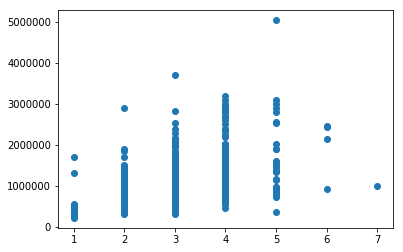

In [232]:
plt.scatter(housing_data_df['Rooms'], housing_data_df['Price']) # visualise relationship 

Thus, is can be observed that there's a strong linear relationship between the attribute **Rooms** and the target variable **Price**, thus, no normalisation/transformation methods will be applied on the **Rooms** attribute. Normalisation is not considered because for a linear model the linear regression coefficients will be identical if you do, or don't, scale your data, because it's looking at proportional relationships between them. Thus, it's not necessary to perform normalisation, as it's utilisied to normalize residuals by transforming non-linear data to reach linearity. However, from the scatter plot there's already a strong relationship between the dependent and independent variables which in this instance is **Rooms** and **Price**. Therefore, it was deemed not appropriate to perform any normalizations on **Rooms** attribute. Additionally, transformations is utilised either:
* `to achieve linearity` 
* `to achieve homogeneity of variance, which is constant variance for the regession equation`
* `to achieve normality (symmetry) for the regression equation` 

However, as aformentioned as there's already strong linearity, hence, transformation is not required for **Rooms** attirbute. 

### 15.2 crime_C_average attribute data reshaping normalization/transformation method(s) recommendation 
<a id="abcdefghijklm"></a>

Next a scatter plot will be created to visualise the relationship between the target variable **Price** and the predictor attribute **crime_C_average**. 

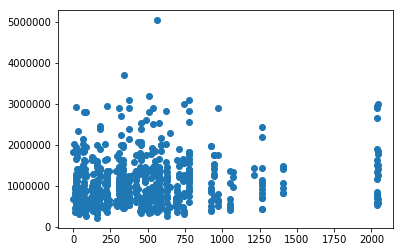

In [957]:
plt.scatter(housing_data_df['crime_C_average'], housing_data_df['Price']) # visualise relationship 

From the scatter plot it can be observed that data is clustered to the left, thus, the aim was to utilise square root transformation on the attribute **crime_C_average** to spread out the data, thus, creating a strong linear relationship. 

In [1090]:
import math
housing_data_df_copied['crime_C_lmr'] = None
i = 0
for row in housing_data_df_copied.iterrows():
    housing_data_df_copied['crime_C_lmr'].at[i] = math.sqrt(housing_data_df_copied["crime_C_average"][i])
    i += 1

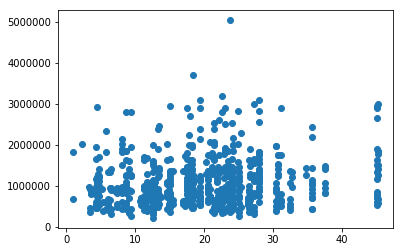

In [1091]:
plt.scatter(housing_data_df_copied['crime_C_lmr'], housing_data_df_copied.Price) # and after

From the scatterplot it can seen that the relationship between **crime_C_average** and **Price** is now less clustered after the square root transformation have been performed on the attribute **crime_C_average**. Thus, the transformation was successful in achieving a stronger linearity between the predictor **crime_C_average** and the target variable **Price**. 

### 15.3 travel_min_to_CBD attribute data reshaping normalization/transformation method(s) recommendation
<a id="abcdefghijklmn"></a>

Next a scatter plot will be created to visualise the relationship between the target variable **Price** and the predictor attribute **travel_min_to_CBD**. 

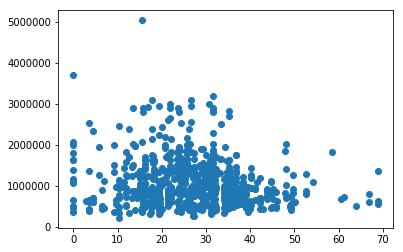

In [960]:
plt.scatter(housing_data_df['travel_min_to_CBD'], housing_data_df['Price']) # visualise relationship

From the scatter plot it can be observed that there's a very weak linear relationship between the predictor **travel_min_to_CBD** and the target variable **Price**. Thus, the decision was to user power transformations to adjust the values for **travel_min_to_CBD** to match the scale with the target variable **Price**, thus, creating a moderate linear relationship. 

In [1079]:
import math
housing_data_df_copied['travel_min_lmr'] = None
i = 0
for row in housing_data_df_copied.iterrows():
    housing_data_df_copied['travel_min_lmr'].at[i] = math.pow(housing_data_df_copied["travel_min_to_CBD"][i],3.7)
    i += 1

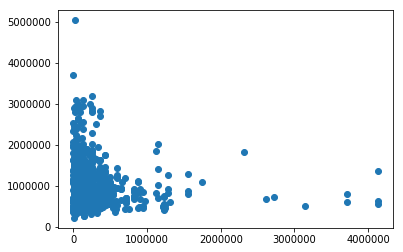

In [1078]:
plt.scatter(housing_data_df_copied['travel_min_lmr'], housing_data_df_copied.Price) # and after

From the output it can be observed that after the power transformation on the attribute **travel_min_to_CBD** a moderate relationship between the attribute and the target variable **Price** has been achieved. 

### 15.4 Age attribute data reshaping normalization/transformation method(s) recommendation 
<a id="abcdefghijklmno"></a>

Next a scatter plot will be created to visualise the relationship between the target variable **Price** and the predictor attribute **Age**. 

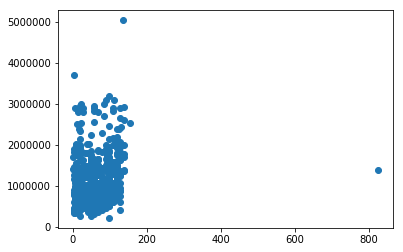

In [963]:
plt.scatter(housing_data_df['Age'], housing_data_df['Price']) # visualise relationship 

From the scatter plot it can be observed that there's a very moderate linear relationship between the predictor **Age** and the target variable price **Price**. Thus, the decision was mae to user power transformations to adjust the values for **Age** to match the scale with the target variable price **Price**, the, aim was to achieve a strong linear relationship with the x-axis scale adjusted to a range between 0 - 5000000+ to achieve a strong linear relationship. 

In [1029]:
import math
housing_data_df_copied['age_lmr'] = None
i = 0
for row in housing_data_df_copied.iterrows():
    housing_data_df_copied['age_lmr'].at[i] = math.pow(housing_data_df_copied["Age"][i],2)
    i += 1

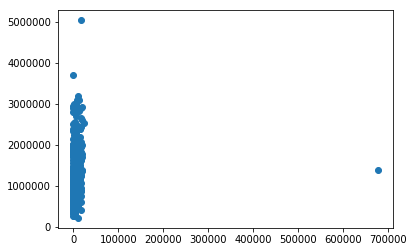

In [1030]:
plt.scatter(housing_data_df_copied['age_lmr'], housing_data_df_copied.Price) # and after

From the output it can be observed that after the power transformation on the attribute **Age** a strong relationship between the attribute and the target **Price** has been achieved. Therefore the power transformation with adjusting the values for **Age** to match the scale for the target variable price **Price**, was succesful in achieving a strong linear relationship against the target variable **Price** with the x-axis scale adjusted to a range between 0 - 5000000+ to achieve a strong linear relationship. 

## 16. Conclusive Data Reshaping recommendations/suggestions for building linear model 
<a id="abcdefghijklmnop"></a>

Firstly, for the **Rooms** attribute it was conclude that no normalisation/transformation is neccessary when building the linear model for Price as it can be observed from scatter plot relationship between **Rooms** and **Price** there's a strong linear relationship between the attribute **Rooms** and the target variable **Price**, thus, no normalisation/transformation methods will be applied on the **Rooms** attribute. Normalisation is not considered because for a linear model the linear regression coefficients will be identical if you do, or don't, scale your data, because it's looking at proportional relationships between them. Thus, it's not necessary to perform normalisation, as it's utilisied to normalize residuals by transforming non-linear data to reach linearity. However, from the scatter plot there's already a strong relationship between the dependent and independent variables which in this instance is **Rooms** and **Price**. Therefore, it was deemed not appropriate to perform any normalizations on **Rooms** attribute. Additionally, transformations is utilised either:
* to achieve linearity 
* to achieve homogeneity of variance, which is constant variance for the regession equation
* to achieve normality (symmetry) for the regression equation 
However, as aformentioned as there's already strong linearity, hence, transformation is not required for **Rooms** attirbute.

Secondly, for the attribute **crime_C_average** as the data was clustered to the left, the aim was to utilise square root transformation on the attribute **crime_C_average** to spread out the data, thus, creating a stronger linear relationship. Thus, the proposed transformation was successful in achieving a stronger linearity between the predictor **crime_C_average** and the target variable **Price**.  

Thirdly, for the attribute **travel_min_to_CBD** there was a very weak relationship with the target variable **Price**. Thus, the decision was to user power transformations to adjust the values for **travel_min_to_CBD** to match the scale with the target variable **Price**, thus, creating a moderate linear relationship. From the scatterplot visualistion it can be observed that after the power transformation on the attribute **travel_min_to_CBD** a moderate relationship between the attribute and the target **Price** was been achieved. 

Lastly, for the attribute **Age** and the target variable price **Price** there was a moderate linear relationship. Thus, the decision was made to user power transformations to adjust the values for **Age** which'll match the scale with the target variable **Price**, the, aim was to achieve a stronger linear relationship with the x-axis scale adjusted to a range between 0 - 5000000+.  From the output it can be observed that after the power transformation on the attribute **Age** a strong relationship between the attribute and the target **Price** was achieved. Therefore the power transformation by adjusting the values for **Age** to match the scale for the target variable price **Price**, was succesful in achieving a strong linear relationship against the target variable **Price** with the x-axis scale adjusted to a range between 0 - 5000000+.

Thus, the recommendation/proposal for building a linear model on **Price** with the four attributes **Rooms**, **Age**, **travel_min_to_CBD** and **crime_C_average** is no normalisation/tansformation is necessary for **Room** attribute, **square root transformation** for **crime_C_average** attribute, **power transformation** for **travel_min_to_CBD** attribute and **power transformation** for **Age** attribute. As these transformations have been tested and shown to have strong improvements in linearity, therefore, they're the proposed suggestion/recommendation for the appropriate data reshaping procedure when building the linear model for **Price**. 

## 17. Summary
<a id="summary"></a>

This Jupyter Notebook file `victoria_suburb_data_integration_reshaping.ipynb` consists of two tasks **Task 1: Data Integration** and **Task 2: data reshaping**. Firstly, this Jupyter Notebook file `victoria_suburb_data_integration_reshaping.ipynb` **Task 1: Data Integration** demonstrates and explains comprehensively how multiple datasets in various fromats were integrated and enriched to the dataset `victoria_suburb_data_integration_reshaping.csv` with the columns **Suburb**, **train_station_id**, **distance_to_train_stat**, **travel_min_to_CBD**, **over_priced?**, **crime_A_average**, **crime_B_average**, **crime_C_average**:


* `Suburb` - all information values populated in the column is from and stored in the list **extracted_suburbs**
* `train_station_id` - all information values populated in the column is from and stored in the list **train_station_id_list**
* `distance_to_train_stat` - all information values populated in the column is from and stored in the list **shortest_direct_distance_property_to_train_meters**
* `travel_min_to_CBD` - all information values populated in the column is from and stored in the list **average_travel_min_to_CBD**
* `over_priced?` - all information values populated in the column is from and stored in the list **over_priced_boolean**
* `crime_A_average` - all information values populated in the column is from and stored in the list **crime_A_average**
* `crime_B_average` - all information values populated in the column is from and stored in the list **crime_B_average**
* `crime_C_average` - all information values populated in the column is from and stored in the list **crime_C_average** 


Additionally, the methodology has been documented and aims to convey how all this information was intergrated and stored in the required format for the output CSV file `victoria_suburb_data_integration_reshaping_result.csv` with all **extracted and enriched column information** in the order of **ID**, **Address**, **Suburb**, **Price**, **Type**, **Date**, **Rooms**, **Bathroom**, **Car**, **LandSize**, **Age**, **Latitude**, **Longitude**, **train_station_id**, **distance_to_train_stat**, **travel_min_to_CBD**, **over_prcied?**, **crime_A_average**, **crime_B_average** and **crime_C_average**. 

Subsequently, for **Task 2: data reshaping** the Jupyter Notebook file `victoria_suburb_data_integration_reshaping.ipynb`demonstrates and explains the methodology, approach and justification for the suggesting/recommeding appropriate normalization/transformation approaches for the attributes **Rooms**, **crime_C_average**, **travel_min_to_CBD** and **property_age** when building a linear on model on **Price** using these attributes. 

## 18. References
<a id="references"></a>

- Aaron♦ (2015, May 4), "Is it possible to look at the contents of Shapefile using Python without an ArcMap license?" StackExchange Geographic Information Systems [Online] Available at: https://gis.stackexchange.com/questions/145015/is-it-possible-to-look-at-the-contents-of-shapefile-using-python-without-an-arcm (Accessed: 27/05/2019)  
- abarnert & Verdier, Olivier. (2018, June 4), "Python: finding lowest integer" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/2622994/python-finding-lowest-integer (Accessed: 1/06/2019)  
- afsd. (2017, November 30), "Dropping rows in a pandas dataframe" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/47572121/dropping-rows-in-a-pandas-dataframe (Accessed: 28/05/2019)  
- Andy♦ (2017, April 10), "Pandas - Strip white space" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/43332057/pandas-strip-white-space (Accessed: 28/05/2019) 
- Bareket, Dan. (2017, December 27), "Playing with GTFS" simplistic [Online] Available at: http://simplistic.me/playing-with-gtfs.html (Accessed: 29/05/2019)  
- Batra, Nipun. (2014, January 1), "Changing a specific column name in pandas DataFrame" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/20868394/changing-a-specific-column-name-in-pandas-dataframe (Accessed: 29/05/2019)
- bfontaine & R.Sanchez. (2018, May 16), "Inserting a Link to a Webpage in an IPython Notebook" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/25692293/inserting-a-link-to-a-webpage-in-an-ipython-notebook (Accessed: 29/05/2019) 
- Boston, Scott. (2017, August 18), "Counting unique values in a column in pandas dataframe linke in Qlik?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/45759966/counting-unique-values-in-a-column-in-pandas-dataframe-like-in-qlik (Accessed: 31/05/2019)  
- Boston, Scott. (2017, June 16), "Python Pandas Dataframe merge and pick only a few columns" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/44593284/python-pandas-dataframe-merge-and-pick-only-few-columns (Accessed: 31/05/2019) 
- BrenBarn. (2012, August 22), "Filter dataframe rows if value in column is in a set list of values [duplicate]" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/12065885/filter-dataframe-rows-if-value-in-column-is-in-a-set-list-of-values (Accessed: 31/05/2019)  
- Chaudhary, Ashwini. & karthikr. (2013, July 2), "Python Function Not Working" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/17435537/python-function-not-working (Accessed: 27/05/2019) 
- Chenlu & tpdance. (2017, February 17), "Unzip all zipped files in a folder to that same folder using Python 2.7.5" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/31346790/unzip-all-zipped-files-in-a-folder-to-that-same-folder-using-python-2-7-5 (Accessed: 28/05/2019) 
- Chrisji & pietrovismara. (2017, August 3), "Load data from txt with pandas" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/21546739/load-data-from-txt-with-pandas (Accessed: 28/05/2019)  
- Clements♦, Jon. (2013, July 24), "how to delete multiple columns in one pass [duplicate]" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/17838752/how-to-delete-multiple-columns-in-one-pass (Accessed: 29/05/2019)   
- CoffeeRain. (2012, March 14), "Python split string into multiple string [duplicate]" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/9703512/python-split-string-into-multiple-string (Accessed: 29/05/2019) 
- Community♦ & EdChum. (2017, May 23), "Rename specific column(s) in pandas" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/19758364/rename-specific-columns-in-pandas (Accessed: 27/05/2019)  
- Community♦ & Yeo. (2017, May 23), "Detect the nearest transit stop from the given location" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/9340800/detect-the-nearest-transit-stop-from-the-given-location (Accessed: 30/05/2019)
- Community♦ & gene. (2017, April 13), "Check if a point falls within a multipolygon with Python" StackExchange Geographic Information Systems [Online] Available at: https://gis.stackexchange.com/questions/208546/check-if-a-point-falls-within-a-multipolygon-with-python (Accessed: 29/05/2019)  
- Community♦ & gene. (2017, April 13), "How to read a shapefile in Python?" StackExchange Geographic Information Systems [Online] Available at: https://gis.stackexchange.com/questions/113799/how-to-read-a-shapefile-in-python (Accessed: 27/05/2019) 
- compie & NPE. (2016, August 9), "Calculating arithemtic mean (one type of average) in Python" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/7716331/calculating-arithmetic-mean-one-type-of-average-in-python (Accessed: 25/05/2019)  
- cs95 & McKinney, Wes. (2019, April 7), "Delete column from pandas DataFrame" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe (Accessed: 27/05/2019)  
- cs95. (2018, March 21), "Combine date and time; ValueError: hour must be in 0..23" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/49411908/combine-date-and-time-valueerror-hour-must-be-in-0-23 (Accessed: 1/06/2019)  
- Deduplicator & Chuck. (2014, July 31), "Calculate distance between two latitude-longitude points? (Haversine formula)" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula (Accessed: 1/06/2019)  
- derricw. (2015, April 9), "Fast Haversine Approximation (Python/Pandas)" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas?noredirect=1&lq=1 (Accessed: 1/06/2019) 
- Drise & Niklas B. (2017, December 14), "Python: Find in list" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/9542738/python-find-in-list (Accessed: 1/06/2019) 
- DSM. (2013, February 2), "How do I get a list of all the duplicate items using pandas in python?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python (Accessed: 5/06/2019) 
- Dunn, Michael. (2011, February 6), "Haversine Formula in Python (Bearing and Distance between two GPS points)" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points (Accessed: 29/05/2019)   
- EdChum. (2015, May 22), "python pandas extract year from datetime -- df['year'] = df['date'].year is not working" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/30405413/python-pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not (Accessed: 27/05/2019) 
- EdChum. (2015, April 8), "Add column to dataframe with default value" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/29517072/add-column-to-dataframe-with-default-value/29517089 (Accessed: 29/05/2019) 
- EdChum. (2015, February 16), "Deleting multiple columns based on column names in Pandas" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/28538536/deleting-multiple-columns-based-on-column-names-in-pandas (Accessed: 29/05/2019)
- eumiro. (2012, July 5), "Renaming columns in pandas" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas (Accessed: 29/05/2019)  
- FabienP. (2017, September 3), "Pandas DataFrame adding column after groupby" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/46022401/pandas-dataframe-adding-column-after-groupby (Accessed: 29/05/2019)  
- fabrizioM. (2011, March 16), "Python - Check If Word Is In A String" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/5319922/python-check-if-word-is-in-a-string (Accessed: 1/06/2019)  
- Forge. (2016, March 29), "How to extract zip file recursively in Python" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/36285502/how-to-extract-zip-file-recursively-in-python (Accessed: 29/05/2019)  
- FSimardGIS. (2018, November 19), "Finding if latitude and longitude in shapefile region" StackExchange Geographic Information Systems [Online] Available at: https://gis.stackexchange.com/questions/303135/finding-if-latitude-and-longitude-in-shapefile-region (Accessed: 28/05/2019)  
- gcamargo & waitingkuo. (2018, December 19), "How to iterate over rows in a DataFrame in Pandas?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas (Accessed: 25/05/2019)  
- GeeksforGeeks. (2019, January 14), "Add a key:value pair to dictionary in Python" Stack Overflow [Online] Available at: https://www.geeksforgeeks.org/add-a-keyvalue-pair-to-dictionary-in-python/ (Accessed: 30/05/2019) 
- Gillies, Sean. (2018, July 18), "Shapely 1.6.4.post2 pip install Shapely" © 2019 Python Software Foundation [Online] Available at: https://pypi.org/project/Shapely/#built-distributions (Accessed: 13/05/2019)    
- Gillies, Sean., Bierbaum, Aron. & Lautaportti, Kai. (2017, January 24), "Shapely" Shapely 1.6 documentation Shapely © Copyright 2011-2013, Sean Gillies, Aron Bierbaum, Kai Lautaportti and others. Created using Sphinx 1.7.0. [Online] Available at: https://shapely.readthedocs.io/en/stable/project.html#requirements (Accessed: 19/05/2019)   
- Gohlke, Christoph. (2019, June 12), "Unofficial Windows Binaries for Python Extension Packages" Laboratory for Fluorescence Dynamics, University of California, Irvine. [Online] Available at: https://www.lfd.uci.edu/~gohlke/pythonlibs/#shapely (Accessed: 15/05/2019)  
- GTFS. (2019), "GTFS Background" GTFS [Online] Available at: https://gtfs.org/gtfs-background/ (Accessed: 27/05/2019) 
- GTFS. (2019), "GTFS: Making Public Transit Data Universally Accessible" GTFS [Online] Available at: https://gtfs.org/ (Accessed: 31/05/2019)  
- GTFS. (2019, January 17), "General Transit Feed Specification Reference" GTFS [Online] Available at: https://gtfs.org/reference/static/#tripstxt (Accessed: 29/05/2019)  
- Hayden, Andy. (2013, June 4), "Writing a pandas DataFrame to CSV file" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file (Accessed: 7/06/2019)  
- Hayden, Andy. (2013, June 3), "How to read a .xlsx file using the pandas Library in iPython?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/16888888/how-to-read-a-xlsx-file-using-the-pandas-library-in-ipython (Accessed: 27/05/2019)  
- Hayden, Andy. (2013, February 6), "How to access pandas groupby dataframe by key" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/14734533/how-to-access-pandas-groupby-dataframe-by-key (Accessed: 1/06/2019)  
- Home Assistant. (2019), "// Public Transit (GTFS)" Home Assistant [Online] Available at: https://www.home-assistant.io/components/gtfs/ (Accessed: 31/05/2019)  
- IT Ninja. (2012, October 20), "String to Dictionary Python" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/12990416/string-to-dictionary-python (Accessed: 1/06/2019)  
- Jakob. (2013, November 2), "How does one change color in markdown cells ipython/jupyter notebook?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/19746350/how-does-one-change-color-in-markdown-cells-ipython-jupyter-notebook (Accessed: 25/05/2019)  
- jezrael. (2018, July 9), "Splitting pandas dataframe column (into two) after the first letter in the cell" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/51243702/splitting-pandas-dataframe-column-into-two-after-the-first-letter-in-the-cell (Accessed: 27/05/2019)  
- jezrael. (2018, October 12), "python pandas : compare two columns for equality and result in third dataframe" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/52777668/python-pandas-compare-two-columns-for-equality-and-result-in-third-dataframe (Accessed: 26/05/2019) 
- jezrael. (2018, April 9), "Pandas DataFrame: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/49728421/pandas-dataframe-settingwithcopywarning-a-value-is-trying-to-be-set-on-a-copy (Accessed: 30/05/2019) 
- jezraeil. (2016, November 25), "How to calculate time difference by group using pandas?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/40804265/how-to-calculate-time-difference-by-group-using-pandas (Accessed: 28/05/2019)  
- jezrael. (2016, January 25), "How to remove nan value while combining two columns in Panda Data frame?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/34989341/how-to-remove-nan-value-while-combining-two-column-in-panda-data-frame (Accessed: 27/05/2019) 
- JimT & gene. (2017, May 25), "Extract a record by name in pyshp?" StackExchange Geographic Information Systems [Online] Available at: https://gis.stackexchange.com/questions/74808/extract-a-record-by-name-in-pyshp (Accessed: 29/05/2019)  
- Jones, Nathaniel. & georg. (2019, January 19), "How do I find the duplicates in a list and create another list with them?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/9835762/how-do-i-find-the-duplicates-in-a-list-and-create-another-list-with-them (Accessed: 29/05.2019)  
- Kettler, Rafe. (2011, September 27), "Fastest way to check if a value exist in a list" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/7571635/fastest-way-to-check-if-a-value-exist-in-a-list (Accessed: 1/06/2019) 
- kL, asapo. (2018, June 2), "Moving a dataframe column and changing column order" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/50660949/moving-a-dataframe-column-and-changing-column-order (Accessed: 25/05/2019)  
- ktzr. (2018, May 11), "how to find index of min and max value of a int array Python [duplicate]" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/50298059/how-to-find-index-of-min-and-max-value-of-a-int-array-python (Accessed: 1/06/2019)  
- López, Óscar. (2016, October 23), "ValueError: time data ' 1:00:00' does not match format '%H:%M:%S'" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/40204471/valueerror-time-data-10000-does-not-match-format-hms (Accessed: 1/06/2019)  
- LW001 & piRSquared. (2017, September 26), "Pandas populate new dataframe column based on matching columns in another dataframe" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/39816671/pandas-populate-new-dataframe-column-based-on-matching-columns-in-another-datafr (Accessed: 30/05/2019)  
- Lynn, Shane. (2017, December 13), "The Pandas DataFrame - loading, editing, and viewing data in Python" Shane Lynn Data science,Startups,Analytics, and Data visualisation. [Online] Available at: https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/ (Accessed: 25/05/2019)  
- mac. (2011, November 21), "How to check if a value exists in a dictionary (python)" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/8214932/how-to-check-if-a-value-exists-in-a-dictionary-python (Accessed: 31/05/2019) 
- Manogna. (2017, December 18), "How to convert a string to dictionary in Python?" Stack Overflow [Online] Available at: https://www.tutorialspoint.com/How-to-convert-a-string-to-dictionary-in-Python (Accessed: 29/05/2019)  
- Mauderer, Michael. (2012, November 8), "Preventing partial string match in "if" python)" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/13298338/preventing-partial-string-match-in-if-python (Accessed: 28/05/2019)  
- metakermit & Mckinney, Wes. (2014, May 14), "Pandas DataFrame Add column to index without resetting" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/11040626/pandas-dataframe-add-column-to-index-without-resetting (Accessed: 29/05/2019) 
- Mikhalkin, Grigoriy. (2018, May 9), "pandas: selecting rows in a specific time window" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/50250022/pandas-selecting-rows-in-a-specific-time-window (Accessed: 2/06/2019)  
- Moderc, Marjan. (2017, June 14), "Remove row with null value from pandas data frame" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame (Accessed: 29/05/2019) 
- Müller, Mike. (2018, February 26), "Convert One Column in Python Dataframe to List" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/48997279/convert-one-column-in-python-dataframe-to-list (Accessed: 23/05/2019)  
- N, Sundarraj. (2018, December 18), "Reset indexes of a pandas dataframe to start from zero" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/53829775/reset-indexes-of-a-pandas-dataframe-to-start-from-zero (Accessed: 27/05/2019) 
- newGIS. (2015, June 2), "Unzip zip files in folders and subfolders with python" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/28339000/unzip-zip-files-in-folders-and-subfolders-with-python (Accessed: 29/05/2019)  
- Noah. (2014, October 23), "Using Pandas to pd.read_excel() for multiple worksheets of the same workbook" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/26521266/using-pandas-to-pd-read-excel-for-multiple-worksheets-of-the-same-workbook (Accessed: 27/05/2019) 
- Overmeire, Wouter. (2012, August 30), "Python Pandas How to assign groupby operation results back to columns in parent dataframe?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/12200693/python-pandas-how-to-assign-groupby-operation-results-back-to-columns-in-parent/39029294 (Accessed: 30/05/2019)  
- Panchal, Rushy. (2013, April 14), "Python - Read all files from folder (.shp, .dbf, .mxd etc)" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/15994981/python-read-all-files-from-folder-shp-dbf-mxd-etc (Accessed: 27/05/2019)  
- Pfister, Marc. (2017, July 27), "Finding out if coordinate is within shapefile (.shp) using pyshp?" StackExchange Geographic Information Systems [Online] Available at: https://gis.stackexchange.com/questions/250172/finding-out-if-coordinate-is-within-shapefile-shp-using-pyshp (Accessed: 19/05/2019)  
- Pieters♦ Martijn. (2014, February 27), "Python - Convert a  key-value string to a dictionary" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/22074536/python-convert-a-key-value-string-to-a-dictionary (Accessed: 30/05/2019) 
- piRSquared. (2017, June 18), "Turn a string back into a datetime timedetla" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/44611642/turn-a-string-back-into-a-datetime-timedelta (Accessed: 1/06/2019)  
- piRSquared. (2017, February 12), "Pandas: parsing values in structured non tabular text" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/42184014/pandas-parsing-values-in-structured-non-tabular-text (Accessed: 31/05/2019) 
- Quickbeam2k1. (2018, July 6), "Convert list to column in Python Dataframe" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/51209933/convert-list-to-column-in-python-dataframe (Accessed: 27/05/2019)  
- Rakesh. (2018, April 27), "Find difference between two time strings in Python" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/50059867/find-difference-between-two-time-strings-in-python (Accessed: 30/05/2019)  
- Ray, Silas. (2012, December 6), "How to get the first word in the string" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/13750265/how-to-get-the-first-word-in-the-string (Accessed: 30/05/2019) 
- rkersh. (2016, May 26), "How to remove original file after unzipping it in python" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/37451031/how-to-remove-original-file-after-unzipping-it-in-python/37451093 (Accessed: 29/05/2019)  
- RoyaumeIX & D, Aaron. (2017, October 18), "How can I quickly estimate the distance between two (latitude, longitude) points?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/15736995/how-can-i-quickly-estimate-the-distance-between-two-latitude-longitude-points (Accessed: 30/05/2019)  
- Rushakoff. (2010, June 30), "Replace the single quote (') character from a string" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/3151146/replace-the-single-quote-character-from-a-string (Accessed: 27/05/2019)  
- Russell. (2017, August 2), "How duplicated items can be deleted from dataframe in pandas" StackExchange Data Science [Online] Available at: https://datascience.stackexchange.com/questions/21902/how-duplicated-items-can-be-deleted-from-dataframe-in-pandas?rq=1 (Accessed: 7/06/2019) 
- Savard, Vincent. (2010, November 13), "String exact match" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/4173787/string-exact-match (Accessed: 30/05/2019) 
- Scalera, Vito Domenico. (2017, November 29), "How to read a txt file into pandas dataframe with proper header and location? [closed]" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/47548924/how-to-read-a-txt-file-into-pandas-dataframe-with-proper-header-and-location (Accessed: 29/05/2019) 
- Seanny123 & Surya. (2018, August 24), "How to print a groupby object" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/22691010/how-to-print-a-groupby-object (Accessed: 28/05/2019)  
- Signell, Rich. (2013, June 19), "How do I check the difference, in seconds, between two dates?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/4362491/how-do-i-check-the-difference-in-seconds-between-two-dates (Accessed: 1/06/2019)  
- SlxS. (2013, April 3), "How can you print a key given a value in a dictionary for Python?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/15784590/how-can-you-print-a-key-given-a-value-in-a-dictionary-for-python (Accessed: 30/05/2019) 
- smci & Solomon, Brad. (2019, March 10), "'DataFrame' object has no attribute 'sort'" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/44123874/dataframe-object-has-no-attribute-sort (Accessed: 1/06/2019)  
- Solomon, Brad. & behzad.nouri. (2018, March 23), "How to convert index of a pandas dataframe into a column?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column (Accessed: 29/05/2019)  
- State Government of Victoria. (2019, April 27), "PTV Timetable and Geographic Information - GTFS" VIC.GOV.AU | DATA VIC PTV Timetable and Geographic Information - GTFS © Copyright State Government of Victoria VICTORIA [Online] Available at: https://discover.data.vic.gov.au/dataset/ptv-timetable-and-geographic-information-2015-gtfs (Accesed: 31/05/2019) 
- Tarek. (2018, June 13), "How do I compare columns in different data frames?" StackExchange [Online] Available at: https://datascience.stackexchange.com/questions/33053/how-do-i-compare-columns-in-different-data-frames (Accessed: 28/05/2019)
- Tavory, Ami. (2016, October 2), "Pandas: append dataframe to another df" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/39815646/pandas-append-dataframe-to-another-df (Accessed: 29/05/2019)  
- ThomasG77. (2013, June 6), "Why is Shapely not installing correctly?" StackExchange Geographic Information Systems [Online] Available at: https://gis.stackexchange.com/questions/62925/why-is-shapely-not-installing-correctly (Accessed: 19/05/2019) 
- tshauck. (2013, August 11), "Deleting DataFrame row in Pandas based on column value" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value (Accessed: 27/05/2019)  
- Turtalicious. (2018, November 13), "Getting the Average Value for each Group of a pandas Dataframe" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/53287976/getting-the-average-value-for-each-group-of-a-pandas-dataframe (Accessed: 30/05/2019)  
- U2EF1. (2013, December 16), "Append column to pandas dataframe" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/20602947/append-column-to-pandas-dataframe (Accessed: 1/06/2019) 
- unutbu. (2015, March 31), "Select DataFrame rows between two dates" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates (Accessed: 1/06/2019)  
- unutbu. (2014, October 1), "Convert row to column header for Pandas DataFrame" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/26147180/convert-row-to-column-header-for-pandas-dataframe (Accessed: 28/05/2019)  
- unutbu. (2013, December 16), "How to find the installed pandas version" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/20612645/how-to-find-the-installed-pandas-version (Accessed: 28/05/2019)  
- unutbu. (2010, April 12), "How to extract elements from a list using indices in Python?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/2621674/how-to-extract-elements-from-a-list-using-indices-in-python (Accessed: 1/06/2019)  
- User. (2011, September 22), "How can I turn a string into a list in Python? [duplicate]" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/7522533/how-can-i-turn-a-string-into-a-list-in-python (Accessed: 29/05/2019) 
- user2965004. (2014, October 15), "The result by haversine formua is meter o kmeter?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/25711895/the-result-by-haversine-formula-is-meter-o-kmeter/26393502 (Accessed: 29/05/2019)  
- user681. (2015, January 26), "Plot shapefile with matplotlib" StackExchange Geographic Information Systems [Online] Available at: https://gis.stackexchange.com/questions/131716/plot-shapefile-with-matplotlib/309780#309780 (Accessed: 27/05/2019) 
- waitingkuo. (2013, July 16), "Pandas DataFrame Groupby two columns and get counts" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts (Accessed: 30/05/2019)  
- Wani, J Nehal. (2016, August 15), "pd.Timedelta conversion on a dataframe column" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/38960514/pd-timedelta-conversion-on-a-dataframe-column (Accessed: 1/06/2019)  
- WeNYoBen. (2018, January 9), ""No numeric types to aggregate" after groupby and mean" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/48171492/no-numeric-types-to-aggregate-after-groupby-and-mean (Accessed: 27/05/2019) 
- Zeiseweis, Jan. (2017, Spetember 19), "Add list of list to a Pandas dataframe" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/46302881/add-list-of-list-to-a-pandas-dataframe (Accesse: 29/05/2019)   
- Zero. (2016, December 16), "merging 2 dataframes vertically [duplicate] Stack Overflow [Online] Available at: https://stackoverflow.com/questions/41181779/merging-2-dataframes-vertically (Accessed: 28/05/2019)  
- Zero. (2015, May 27), "How to calculate mean values grouped on another column in Pandas" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas (Accessed: 27/05/2019)

In [46]:
df = pd.read_csv("./29976464_ass3/29976464_solution.csv")

In [54]:
df['train_station_id'] = df['train_station_id'].astype(str)

In [82]:
merged_df = pd.merge(df, combined_google1_google2_stops[['stop_id','stop_name']], how='left', left_on=['train_station_id'],right_on=['stop_id'], sort=False)

In [87]:
del merged_df['stop_id']

In [63]:
merged_df.columns

Index(['ID', 'Address', 'Suburb', 'Price', 'Type', 'Date', 'Rooms', 'Bathroom',
       'Car', 'Landsize', 'Age', 'Lattitude', 'Longtitude', 'train_station_id',
       'distance_to_train_stat', 'travel_min_to_CBD', 'over_priced?',
       'crime_A_average', 'crime_B_average', 'crime_C_average', 'stop_name'],
      dtype='object')

In [65]:
merged_df.shape

(683, 21)

In [84]:
merged_df.to_csv("29976464_solution_with_stop_names.csv")

In [88]:
merged_df.to_csv('29976464_solution_with_stop_names.csv', index=False, header=['ID', 'Address', 'Suburb', 'Price', 'Type', 'Date', 
                                                                     'Rooms', 'Bathroom', 'Car', 'Landsize', 'Age', 'Lattitude',
                                                                     'Longtitude', 'train_station_id', 'distance_to_train_stat',
                                                                     'travel_min_to_CBD', 'over_priced?', 'crime_A_average', 
                                                                     'crime_B_average', 'crime_C_average', 'stop_name'])